In [11]:
import sys
import datetime as dt
from python_utils_file.Class_LM10XSummaries import cl_LM10XSummaries as smry_utils
import os
import pickle
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
summary_file = '/data/workspace_files/Loughran-McDonald_10X_Summaries_1993-2021.csv'

In [13]:
# f_in = open(summary_file)
# header = f_in.readline()
# rows = []
# for line in tqdm(f_in):
#     lm_sm = smry_utils(line, missing_values="")
#     rows.append(lm_sm.__dict__)
data = pd.read_csv(summary_file)
data.columns = [col.lower() for col in data.columns]
data = data[data['form_type'].isin(['10-Q', '10-K'])]
data['filing_date'] = pd.to_datetime(data['filing_date'].astype(str))

In [14]:
data.tail(5)

cik 
 filing_date 
 acc_num 
 cpr 
 form_type 
 coname 
 sic 
 ffind 
 n_words 
 n_unique_words 
 ... 
 n_weakmodal 
 n_constraining 
 n_negation 
 grossfilesize 
 netfilesize 
 nontextdoctypechars 
 htmlchars 
 xbrlchars 
 xmlchars 
 n_exhibits 
 
 
 
 
 1140481 
 1317839 
 2021-12-30 
 0001477932-21-009563 
 20210930 
 10-Q 
 Umatrin Holding Ltd 
 7389 
 34 
 4795 
 898 
 ... 
 11 
 19 
 7 
 4180291 
 38642 
 641880 
 1084579 
 936212 
 1361281 
 7 
 
 
 1140482 
 1796160 
 2021-12-30 
 0001096906-21-003094 
 20210930 
 10-Q 
 QMIS TBS Capital Group Corp. 
 6211 
 47 
 8028 
 1083 
 ... 
 24 
 36 
 6 
 3537544 
 62494 
 516984 
 1121439 
 797163 
 949861 
 9 
 
 
 1140483 
 1867956 
 2021-12-30 
 0001683168-21-006658 
 20211130 
 10-Q 
 Linktory Inc. 
 7370 
 34 
 3673 
 706 
 ... 
 9 
 28 
 4 
 1320557 
 28483 
 319756 
 226958 
 315552 
 406289 
 8 
 
 
 1140484 
 1879373 
 2021-12-30 
 0001493152-21-032779 
 20210930 
 10-Q 
 Energem Corp 
 6770 
 47 
 8586 
 1037 
 ... 
 47 
 49 
 5 
 2260634 
 61730 
 447872 
 478735 
 609559 
 626915 
 9 
 
 
 1140485 
 711377 
 2021-12-30 
 0001193125-21-370461 
 20211130 
 10-Q 
 NEOGEN CORP 
 2835 
 13 
 9060 
 1310 
 ... 
 13 
 32 
 5 
 5341731 
 69643 
 777296 
 1893797 
 1234263 
 1179257 
 8 
 
 
 
 5 rows × 25 columns

0100-0999	Agriculture, Forestry and Fishing
1000-1499	Mining
1500-1799	Construction
1800-1999	not used
2000-3999	Manufacturing
4000-4999	
5000-5199	
5200-5999	Retail Trade
6000-6799	
7000-8999	Services
9100-9729	Public Administration
9900-9999	Nonclassifiable

In [15]:
data.head(5)

cik 
 filing_date 
 acc_num 
 cpr 
 form_type 
 coname 
 sic 
 ffind 
 n_words 
 n_unique_words 
 ... 
 n_weakmodal 
 n_constraining 
 n_negation 
 grossfilesize 
 netfilesize 
 nontextdoctypechars 
 htmlchars 
 xbrlchars 
 xmlchars 
 n_exhibits 
 
 
 
 
 0 
 60512 
 1993-08-13 
 0000060512-94-000005 
 19930630 
 10-Q 
 LOUISIANA LAND & EXPLORATION CO 
 1311 
 30 
 4068 
 770 
 ... 
 6 
 8 
 1 
 63255 
 43072 
 0 
 464 
 0 
 0 
 0 
 
 
 1 
 66740 
 1993-08-13 
 0000066740-94-000015 
 19930630 
 10-Q 
 MINNESOTA MINING & MANUFACTURING CO 
 2670 
 38 
 4389 
 844 
 ... 
 7 
 8 
 3 
 57283 
 37946 
 0 
 392 
 0 
 0 
 3 
 
 
 3 
 60512 
 1993-11-10 
 0000060512-94-000007 
 19930930 
 10-Q 
 LOUISIANA LAND & EXPLORATION CO 
 1311 
 30 
 4938 
 812 
 ... 
 4 
 5 
 1 
 72062 
 50742 
 0 
 505 
 0 
 0 
 0 
 
 
 4 
 11860 
 1993-11-12 
 0000011860-94-000005 
 19930930 
 10-Q 
 BETHLEHEM STEEL CORP /DE/ 
 3312 
 19 
 3823 
 898 
 ... 
 5 
 32 
 2 
 40392 
 32088 
 0 
 201 
 0 
 0 
 0 
 
 
 5 
 20762 
 1993-11-12 
 0000950131-94-000025 
 19930930 
 10-Q 
 CLARK REFINING & MARKETING INC 
 2911 
 30 
 4136 
 885 
 ... 
 9 
 25 
 3 
 51625 
 37594 
 0 
 500 
 0 
 0 
 0 
 
 
 
 5 rows × 25 columns

In [16]:
def get_sic_to_industry_mapping(row):
    if row['sic']<= 999:
        return 'Agriculture, Forestry and Fishing'
    elif row['sic'] < 1500:
        return 'Mining'
    elif row['sic'] < 1800:
        return 'Construction'
    elif row['sic'] < 2000:
        return
    elif row['sic'] < 4000:
        return 'Manufacturing'
    elif row['sic'] < 5000:
        return 'Transportation, Communications, Electric, Gas and Sanitary service'
    elif row['sic'] < 5200:
        return 'Wholesale Trade'
    elif row['sic'] < 6000:
        return 'Retail Trade'
    elif row['sic'] < 6800:
        return 'Finance, Insurance and Real Estate'
    elif row['sic'] < 9000:
        return 'Services'
    elif row['sic'] < 9730:
        return 'Public Administration'
    else:
        return 'Nonclassificable'

In [17]:
data.columns

Index(['cik', 'filing_date', 'acc_num', 'cpr', 'form_type', 'coname', 'sic',
       'ffind', 'n_words', 'n_unique_words', 'n_negative', 'n_positive',
       'n_uncertainty', 'n_litigious', 'n_strongmodal', 'n_weakmodal',
       'n_constraining', 'n_negation', 'grossfilesize', 'netfilesize',
       'nontextdoctypechars', 'htmlchars', 'xbrlchars', 'xmlchars',
       'n_exhibits'],
      dtype='object')

In [18]:
data['industry'] = data.apply(get_sic_to_industry_mapping, axis=1)

In [19]:
data.describe()

cik 
 cpr 
 sic 
 ffind 
 n_words 
 n_unique_words 
 n_negative 
 n_positive 
 n_uncertainty 
 n_litigious 
 ... 
 n_weakmodal 
 n_constraining 
 n_negation 
 grossfilesize 
 netfilesize 
 nontextdoctypechars 
 htmlchars 
 xbrlchars 
 xmlchars 
 n_exhibits 
 
 
 
 
 count 
 8.352690e+05 
 8.352690e+05 
 835269.000000 
 835269.000000 
 8.352690e+05 
 835269.000000 
 835269.000000 
 835269.000000 
 835269.000000 
 835269.000000 
 ... 
 835269.000000 
 835269.000000 
 835269.000000 
 8.352690e+05 
 8.352690e+05 
 8.352690e+05 
 8.352690e+05 
 8.352690e+05 
 8.352690e+05 
 835269.000000 
 
 
 mean 
 9.174014e+05 
 2.005290e+07 
 4935.865543 
 25.977397 
 2.281830e+04 
 1724.026061 
 379.342785 
 101.814453 
 254.776567 
 397.195712 
 ... 
 107.047937 
 179.425304 
 17.725043 
 3.813499e+06 
 1.798703e+05 
 5.980012e+05 
 1.629966e+06 
 6.886153e+05 
 5.456009e+05 
 6.258213 
 
 
 std 
 4.527069e+05 
 6.596585e+05 
 2045.049082 
 29.451833 
 2.964759e+04 
 928.556079 
 538.121320 
 137.872069 
 312.105584 
 923.743380 
 ... 
 169.486242 
 308.334645 
 34.551382 
 8.568036e+06 
 2.243194e+05 
 2.733557e+06 
 4.092909e+06 
 1.466601e+06 
 1.348249e+06 
 5.330880 
 
 
 min 
 2.000000e+01 
 -9.900000e+01 
 -99.000000 
 -99.000000 
 0.000000e+00 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 7.880000e+02 
 3.800000e+01 
 0.000000e+00 
 4.400000e+01 
 0.000000e+00 
 0.000000e+00 
 0.000000 
 
 
 25% 
 7.712100e+05 
 2.001033e+07 
 3533.000000 
 18.000000 
 6.639000e+03 
 1023.000000 
 83.000000 
 22.000000 
 63.000000 
 44.000000 
 ... 
 15.000000 
 35.000000 
 4.000000 
 1.258630e+05 
 5.567800e+04 
 0.000000e+00 
 1.262000e+03 
 0.000000e+00 
 0.000000e+00 
 2.000000 
 
 
 50% 
 9.401700e+05 
 2.008033e+07 
 5070.000000 
 34.000000 
 1.371700e+04 
 1536.000000 
 191.000000 
 53.000000 
 147.000000 
 118.000000 
 ... 
 40.000000 
 85.000000 
 8.000000 
 6.901590e+05 
 1.105580e+05 
 0.000000e+00 
 3.344470e+05 
 0.000000e+00 
 0.000000e+00 
 5.000000 
 
 
 75% 
 1.227500e+06 
 2.014033e+07 
 6500.000000 
 43.000000 
 2.765000e+04 
 2250.000000 
 466.000000 
 126.000000 
 318.000000 
 367.000000 
 ... 
 123.000000 
 201.000000 
 18.000000 
 3.878393e+06 
 2.191950e+05 
 3.410580e+05 
 1.492987e+06 
 8.272910e+05 
 6.437690e+05 
 10.000000 
 
 
 max 
 1.885461e+06 
 2.021113e+07 
 9995.000000 
 48.000000 
 1.693637e+06 
 8518.000000 
 27927.000000 
 8727.000000 
 9680.000000 
 76289.000000 
 ... 
 6439.000000 
 26683.000000 
 2928.000000 
 4.346576e+08 
 1.167260e+07 
 2.638727e+08 
 2.092878e+08 
 5.080235e+07 
 6.734864e+07 
 133.000000 
 
 
 
 8 rows × 21 columns

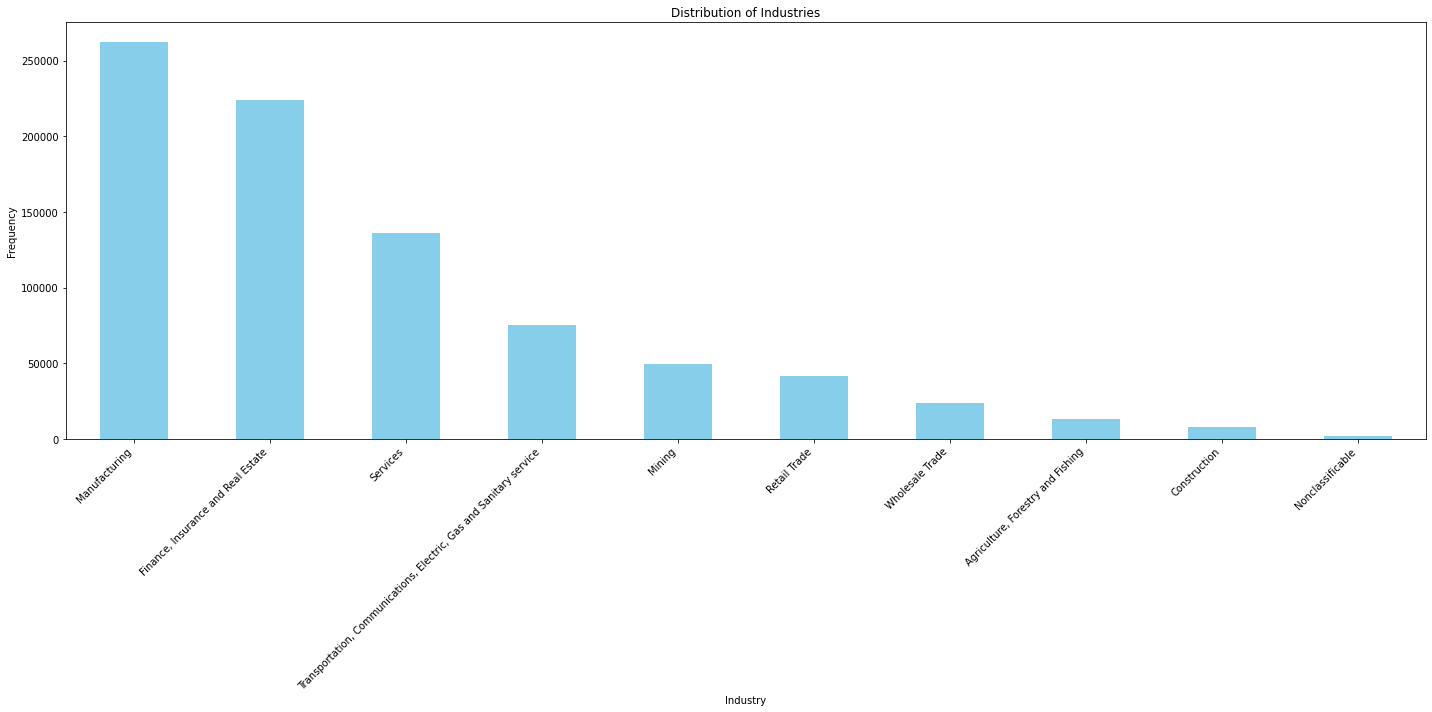

In [20]:
industry_counts = data['industry'].value_counts()

# Create a bar plot
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
industry_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Distribution of Industries')
plt.xlabel('Industry')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

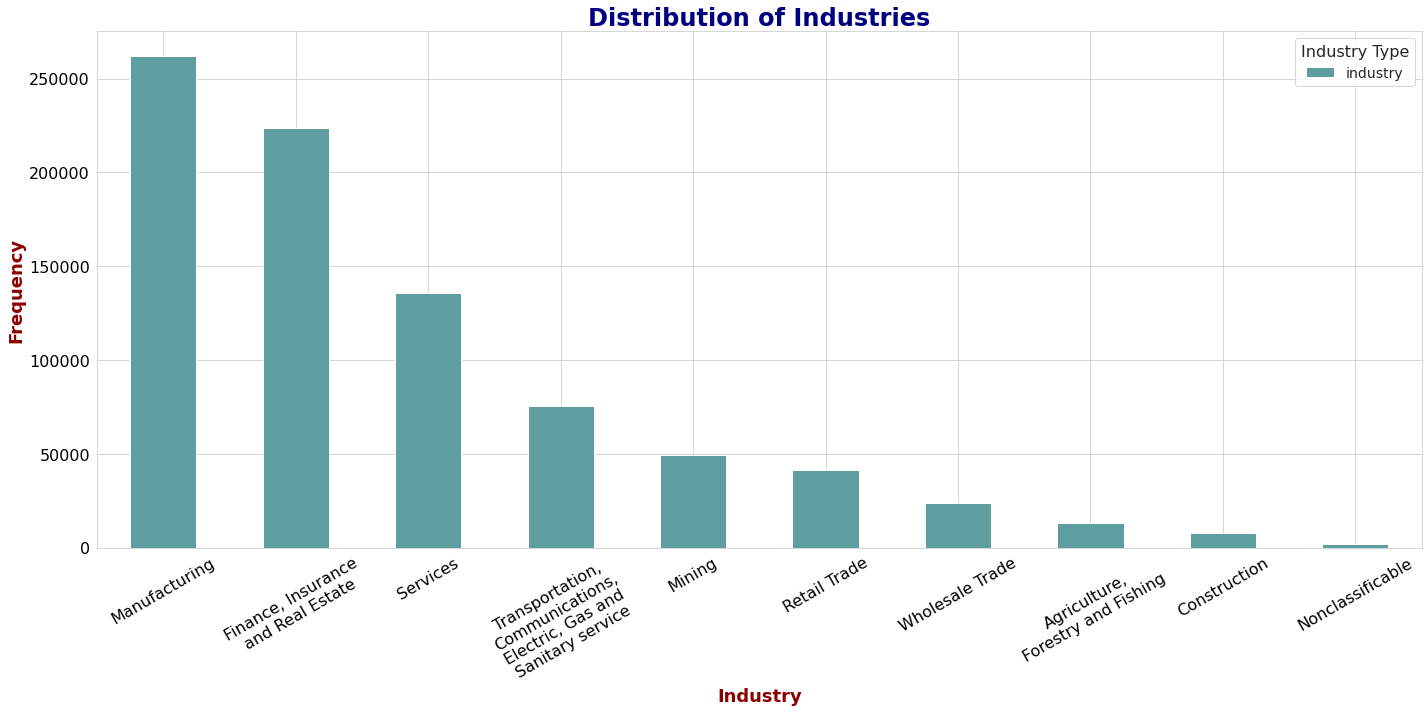

In [21]:
# Reorg
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

sns.set_style("whitegrid")

industry_counts = data['industry'].value_counts()

plt.figure(figsize=(20, 10))
industry_counts.plot(kind='bar', color='cadetblue')  # use a different color pattern

# Increase the font size
plt.title('Distribution of Industries', fontsize=24, fontweight='bold', color='navy')
plt.xlabel('Industry', fontsize=18, fontweight='bold', color='darkred')
plt.ylabel('Frequency', fontsize=18, fontweight='bold', color='darkred')

# Try with multiplel lines - maybe will help with the style ?
xticklabels = [label.get_text() for label in plt.gca().get_xticklabels()]
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=20)) for label in xticklabels]

plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=30, ha='center', fontsize=16, fontweight='regular', color='black')
plt.yticks(fontsize=16, fontweight='regular', color='black')
plt.legend(title='Industry Type', fontsize=14, title_fontsize='16')
plt.tight_layout()
plt.grid(True)
plt.show()

In [22]:
data.dtypes

cik int64
filing_date datetime64[ns]
acc_num object
cpr int64
form_type object
coname object
sic int64
ffind int64
n_words int64
n_unique_words int64
n_negative int64
n_positive int64
n_uncertainty int64
n_litigious int64
n_strongmodal int64
n_weakmodal int64
n_constraining int64
n_negation int64
grossfilesize int64
netfilesize int64
nontextdoctypechars int64
htmlchars int64
xbrlchars int64
xmlchars int64
n_exhibits int64
industry object
dtype: object

In [23]:
data['form_type'].unique()

array(['10-Q', '10-K'], dtype=object)

In [24]:
data.columns

Index(['cik', 'filing_date', 'acc_num', 'cpr', 'form_type', 'coname', 'sic',
       'ffind', 'n_words', 'n_unique_words', 'n_negative', 'n_positive',
       'n_uncertainty', 'n_litigious', 'n_strongmodal', 'n_weakmodal',
       'n_constraining', 'n_negation', 'grossfilesize', 'netfilesize',
       'nontextdoctypechars', 'htmlchars', 'xbrlchars', 'xmlchars',
       'n_exhibits', 'industry'],
      dtype='object')

In [25]:
### How is the 10-K filings changing over time
data['year'] = data['filing_date'].dt.year
k_data = data[data['form_type'].isin(['10-K'])]
q_data = data[data['form_type'].isin(['10-Q'])]

In [26]:
k_data

cik 
 filing_date 
 acc_num 
 cpr 
 form_type 
 coname 
 sic 
 ffind 
 n_words 
 n_unique_words 
 ... 
 n_negation 
 grossfilesize 
 netfilesize 
 nontextdoctypechars 
 htmlchars 
 xbrlchars 
 xmlchars 
 n_exhibits 
 industry 
 year 
 
 
 
 
 7 
 861439 
 1993-11-29 
 0000912057-94-000263 
 19930831 
 10-K 
 AMERICAN MEDICAL HOLDINGS INC 
 8060 
 11 
 21434 
 2047 
 ... 
 14 
 278174 
 211739 
 0 
 1866 
 0 
 0 
 2 
 Services 
 1993 
 
 
 8 
 32377 
 1993-12-13 
 0000032377-94-000001 
 19930930 
 10-K 
 ELIZABETHTOWN GAS CO 
 4922 
 31 
 14137 
 1519 
 ... 
 2 
 166496 
 120114 
 0 
 821 
 0 
 0 
 1 
 Transportation, Communications, Electric, Gas ... 
 1993 
 
 
 11 
 29082 
 1993-12-22 
 0000950131-94-000021 
 19930930 
 10-K 
 DISNEY WALT CO 
 7990 
 7 
 19771 
 1996 
 ... 
 7 
 249191 
 190567 
 0 
 2438 
 0 
 0 
 1 
 Services 
 1993 
 
 
 12 
 353944 
 1993-12-23 
 0000353944-94-000005 
 19930930 
 10-K 
 INTERNATIONAL GAME TECHNOLOGY 
 3990 
 -99 
 29475 
 2563 
 ... 
 22 
 272459 
 241858 
 0 
 482 
 0 
 0 
 8 
 Manufacturing 
 1993 
 
 
 20 
 38777 
 1994-01-06 
 0000038777-94-000002 
 19930930 
 10-K 
 FRANKLIN RESOURCES INC 
 6282 
 47 
 30098 
 2504 
 ... 
 10 
 307627 
 237484 
 0 
 1408 
 0 
 0 
 0 
 Finance, Insurance and Real Estate 
 1994 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1140456 
 886128 
 2021-12-29 
 0001558370-21-017054 
 20211031 
 10-K 
 FUELCELL ENERGY INC 
 3620 
 22 
 81758 
 3967 
 ... 
 42 
 16862315 
 602156 
 2810903 
 5343676 
 3246965 
 4515453 
 12 
 Manufacturing 
 2021 
 
 
 1140469 
 1206942 
 2021-12-30 
 0001206942-21-000049 
 20211031 
 10-K 
 GOLDEN GRAIN ENERGY 
 2860 
 14 
 25696 
 2359 
 ... 
 9 
 7042325 
 185440 
 1425598 
 2270380 
 1636489 
 1408854 
 10 
 Manufacturing 
 2021 
 
 
 1140470 
 1377167 
 2021-12-30 
 0001683168-21-006644 
 20210930 
 10-K 
 Financial Gravity Companies Inc. 
 6199 
 44 
 16437 
 1989 
 ... 
 12 
 5697811 
 126960 
 918590 
 1708953 
 1267812 
 1512925 
 9 
 Finance, Insurance and Real Estate 
 2021 
 
 
 1140471 
 1725516 
 2021-12-30 
 0001493152-21-032816 
 20211130 
 10-K 
 Nestbuilder.com Corp. 
 7310 
 34 
 24281 
 2502 
 ... 
 16 
 3873445 
 174843 
 692349 
 1137603 
 817066 
 963660 
 9 
 Services 
 2021 
 
 
 1140472 
 72633 
 2021-12-30 
 0000072633-21-000024 
 20211031 
 10-K 
 NORTH EUROPEAN OIL ROYALTY TRUST 
 6792 
 47 
 14975 
 1725 
 ... 
 9 
 173474 
 114190 
 0 
 46877 
 0 
 0 
 4 
 Finance, Insurance and Real Estate 
 2021 
 
 
 
 203934 rows × 27 columns

In [27]:

cols = {'ffind': 'count', 
        'n_words': 'mean',
        'n_unique_words': 'mean',
        'n_negative': 'mean',
       'n_positive': 'mean',
        'n_uncertainty': 'mean',
        'n_litigious': 'mean',
        'n_strongmodal': 'mean',
       'n_weakmodal': 'mean',
        'n_constraining': 'mean',
        'n_negation': 'mean',
        'grossfilesize': 'mean',
       'netfilesize': 'mean', 
        'nontextdoctypechars': 'mean',
        'htmlchars': 'mean',
        'xbrlchars': 'mean',
       'xmlchars': 'mean',
        'n_exhibits': 'mean'}
gk = k_data.groupby(['year']).agg(cols).reset_index()
gq = q_data.groupby(['year']).agg(cols).reset_index()

In [28]:
gq

year 
 ffind 
 n_words 
 n_unique_words 
 n_negative 
 n_positive 
 n_uncertainty 
 n_litigious 
 n_strongmodal 
 n_weakmodal 
 n_constraining 
 n_negation 
 grossfilesize 
 netfilesize 
 nontextdoctypechars 
 htmlchars 
 xbrlchars 
 xmlchars 
 n_exhibits 
 
 
 
 
 0 
 1993 
 7 
 3960.428571 
 793.000000 
 73.142857 
 17.857143 
 19.285714 
 38.571429 
 9.857143 
 5.857143 
 14.142857 
 1.714286 
 5.206429e+04 
 36762.428571 
 0.000000e+00 
 4.011429e+02 
 0.000000e+00 
 0.000000e+00 
 0.857143 
 
 
 1 
 1994 
 6628 
 7787.125075 
 876.058992 
 112.741400 
 28.143784 
 51.408871 
 196.935275 
 17.506488 
 22.235818 
 56.866023 
 6.921394 
 8.433379e+04 
 63633.813820 
 0.000000e+00 
 7.151955e+02 
 0.000000e+00 
 0.000000e+00 
 1.385184 
 
 
 2 
 1995 
 14120 
 6403.759773 
 789.185269 
 91.911190 
 23.774646 
 42.579249 
 155.797875 
 14.843909 
 18.329249 
 45.813385 
 5.522380 
 7.176426e+04 
 52814.401133 
 0.000000e+00 
 1.064563e+03 
 0.000000e+00 
 0.000000e+00 
 1.829178 
 
 
 3 
 1996 
 25749 
 7194.159113 
 845.916968 
 105.249835 
 26.739369 
 50.925434 
 181.176745 
 18.313760 
 22.535982 
 53.750437 
 6.858247 
 7.847942e+04 
 58654.207503 
 0.000000e+00 
 1.082683e+03 
 0.000000e+00 
 0.000000e+00 
 1.884190 
 
 
 4 
 1997 
 28996 
 8071.499828 
 901.515692 
 117.983308 
 30.113878 
 59.801214 
 206.514209 
 21.570906 
 26.928542 
 61.969582 
 7.959374 
 8.606775e+04 
 65134.363912 
 0.000000e+00 
 1.159140e+03 
 0.000000e+00 
 0.000000e+00 
 2.076942 
 
 
 5 
 1998 
 29239 
 8941.680461 
 999.616779 
 134.259243 
 34.169636 
 73.324943 
 219.790930 
 25.834023 
 31.303054 
 66.823729 
 8.967475 
 9.512808e+04 
 72177.298540 
 0.000000e+00 
 1.283516e+03 
 0.000000e+00 
 0.000000e+00 
 2.053148 
 
 
 6 
 1999 
 28687 
 9852.161432 
 1119.318088 
 155.613170 
 39.317321 
 94.600098 
 225.553944 
 30.557186 
 38.279569 
 69.707847 
 9.794332 
 1.055809e+05 
 79637.193746 
 4.455340e+02 
 2.646794e+03 
 0.000000e+00 
 0.000000e+00 
 1.923694 
 
 
 7 
 2000 
 28282 
 9966.667598 
 1085.372923 
 159.711972 
 40.651298 
 92.599816 
 233.800933 
 28.217594 
 39.303939 
 73.097270 
 9.433138 
 1.151876e+05 
 80890.109893 
 2.299131e+03 
 7.598593e+03 
 0.000000e+00 
 0.000000e+00 
 1.878120 
 
 
 8 
 2001 
 25997 
 10758.995730 
 1138.364119 
 181.672001 
 44.599762 
 107.436320 
 245.853522 
 31.280455 
 43.854252 
 82.424318 
 9.727430 
 1.555106e+05 
 86525.816133 
 7.415909e+03 
 3.410596e+04 
 0.000000e+00 
 0.000000e+00 
 0.846675 
 
 
 9 
 2002 
 24084 
 13353.690666 
 1290.779273 
 238.075154 
 54.397608 
 140.159151 
 287.623734 
 37.448680 
 55.672563 
 107.341264 
 12.167995 
 2.663506e+05 
 106052.298621 
 1.687474e+04 
 1.009011e+05 
 0.000000e+00 
 0.000000e+00 
 1.575984 
 
 
 10 
 2003 
 21866 
 16750.050855 
 1463.330833 
 290.378533 
 63.602442 
 170.052410 
 343.775954 
 43.705662 
 68.080445 
 133.592015 
 15.344919 
 4.225039e+05 
 131209.757935 
 3.101183e+04 
 2.072748e+05 
 0.000000e+00 
 0.000000e+00 
 3.546236 
 
 
 11 
 2004 
 20872 
 18468.753689 
 1560.760636 
 314.918982 
 74.951083 
 190.139134 
 377.207215 
 48.394979 
 75.460090 
 143.780998 
 16.810512 
 5.158009e+05 
 143523.950652 
 3.236122e+04 
 2.776018e+05 
 0.000000e+00 
 0.000000e+00 
 4.589690 
 
 
 12 
 2005 
 20670 
 18123.143348 
 1590.905177 
 310.844461 
 75.184132 
 196.145622 
 321.058539 
 49.684325 
 74.284325 
 137.056942 
 15.164780 
 6.785994e+05 
 141938.581567 
 5.564182e+04 
 3.961084e+05 
 1.923474e+01 
 0.000000e+00 
 4.455926 
 
 
 13 
 2006 
 20038 
 19350.798134 
 1651.997605 
 323.366404 
 77.651113 
 213.286805 
 323.323685 
 51.457381 
 76.911568 
 142.686845 
 15.798982 
 8.095088e+05 
 151647.188542 
 6.788688e+04 
 4.866703e+05 
 2.246487e+02 
 0.000000e+00 
 4.515670 
 
 
 14 
 2007 
 20047 
 19446.162668 
 1663.799771 
 323.695116 
 78.930862 
 216.200329 
 327.564523 
 52.571158 
 80.748391 
 140.355814 
 15.503068 
 8.398732e+05 
 151781.632264 
 5.107804e+04 
 5.227497e+05 
 8.418404e+02 
 0.000000

In [29]:
# ### Plot the document size of 10-k files over time
# def plot_utils(data, x, y): 
#     data = data.copy(deep = True)
#     plt.figure(figsize=(20, 10))
#     plt.bar(data[x], data[y])
#     plt.title(y, fontsize=20, color='white')
#     plt.xticks(color='red')
#     plt.yticks(color='red')
#     plt.xlabel(x)
#     plt.ylabel(y)
#     plt.show()


def plot_utils(data, x, y, column_description={}):
    # to not do chengdi to original data
    data = data.copy(deep=True)

    sns.set_style("whitegrid")

    plt.figure(figsize=(20, 10))
    bars = plt.bar(data[x], data[y], color='cadetblue')

    # plt.title(column_description.get(y, y), fontsize=24, fontweight='bold', color='navy')
    plt.xticks(fontsize=28, fontweight='regular', color='black', rotation=45)
    plt.yticks(fontsize=28, fontweight='regular', color='black')

    # stylize xlabel and ylabel
    plt.xlabel(column_description.get(x, x), fontsize=32, fontweight='bold', color='darkred')
    plt.ylabel(column_description.get(y, y), fontsize=32, fontweight='bold', color='darkred')

    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

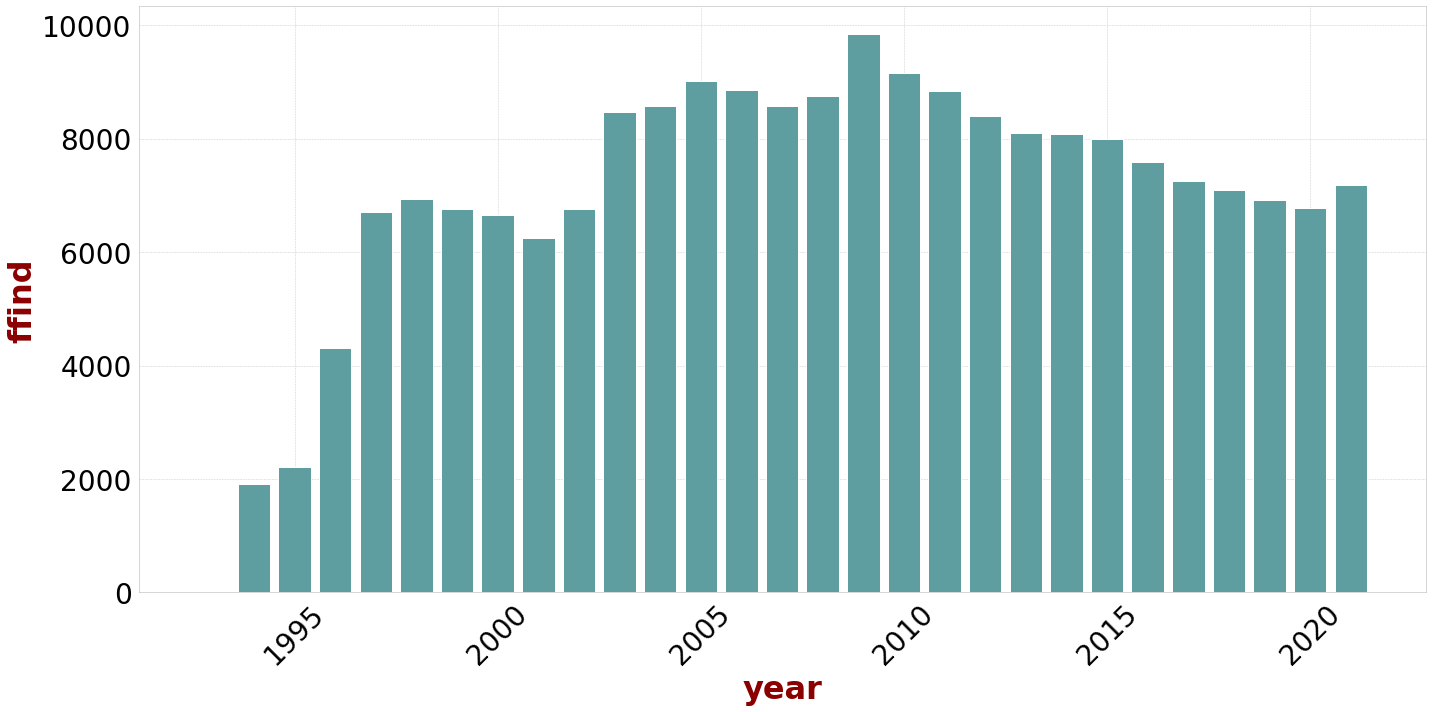

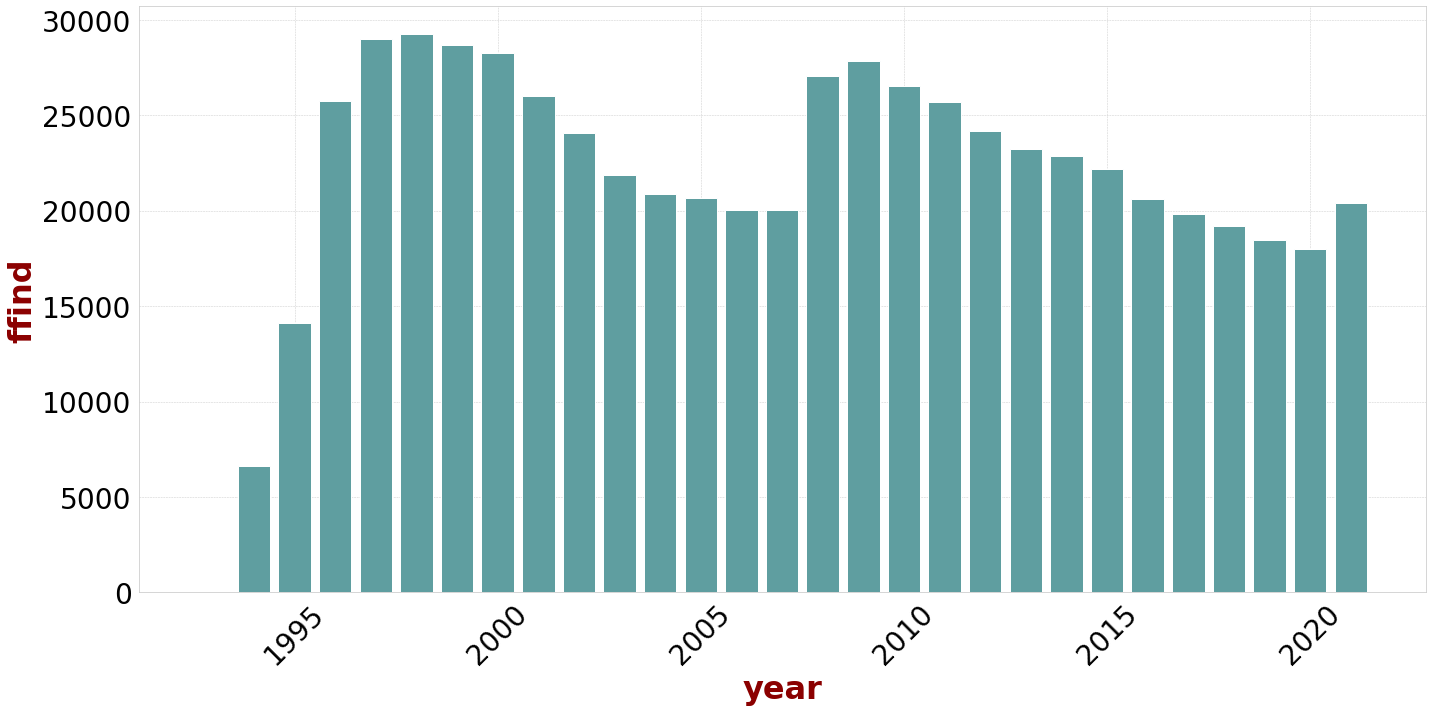

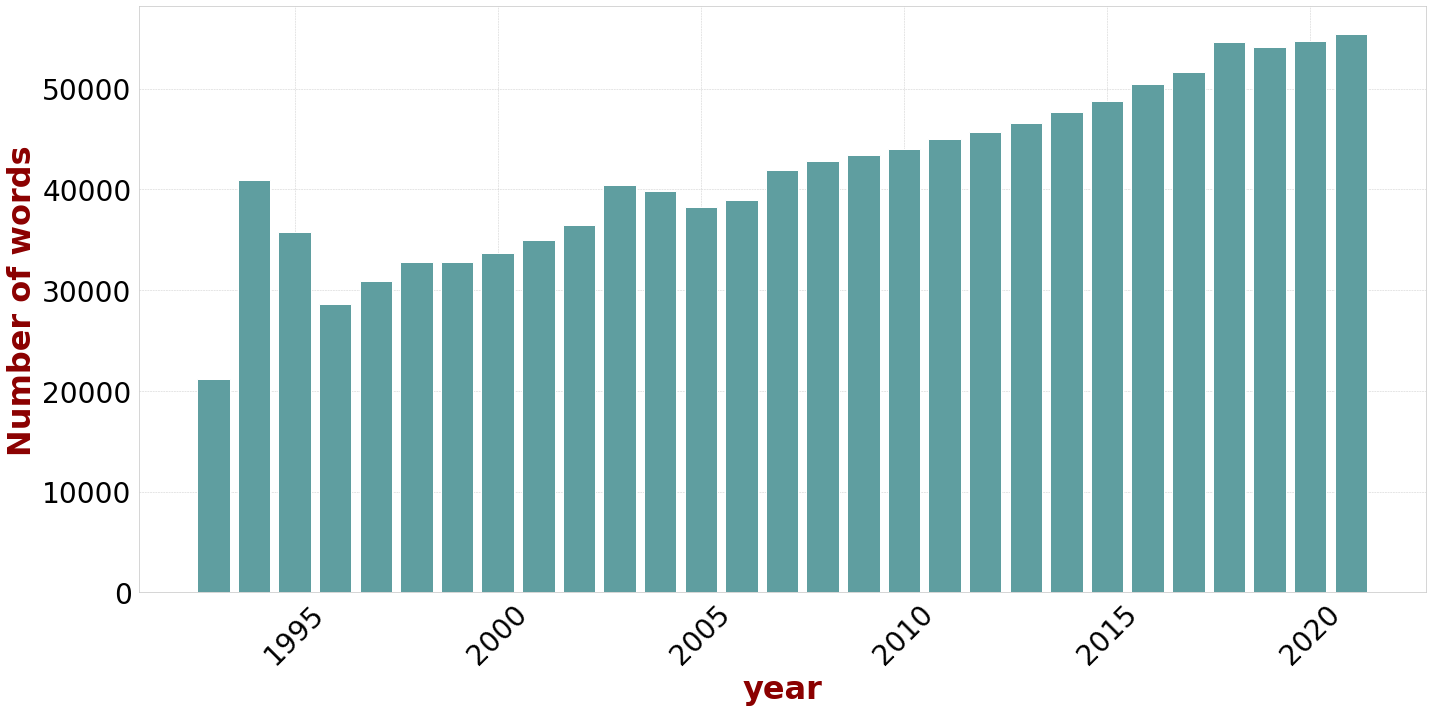

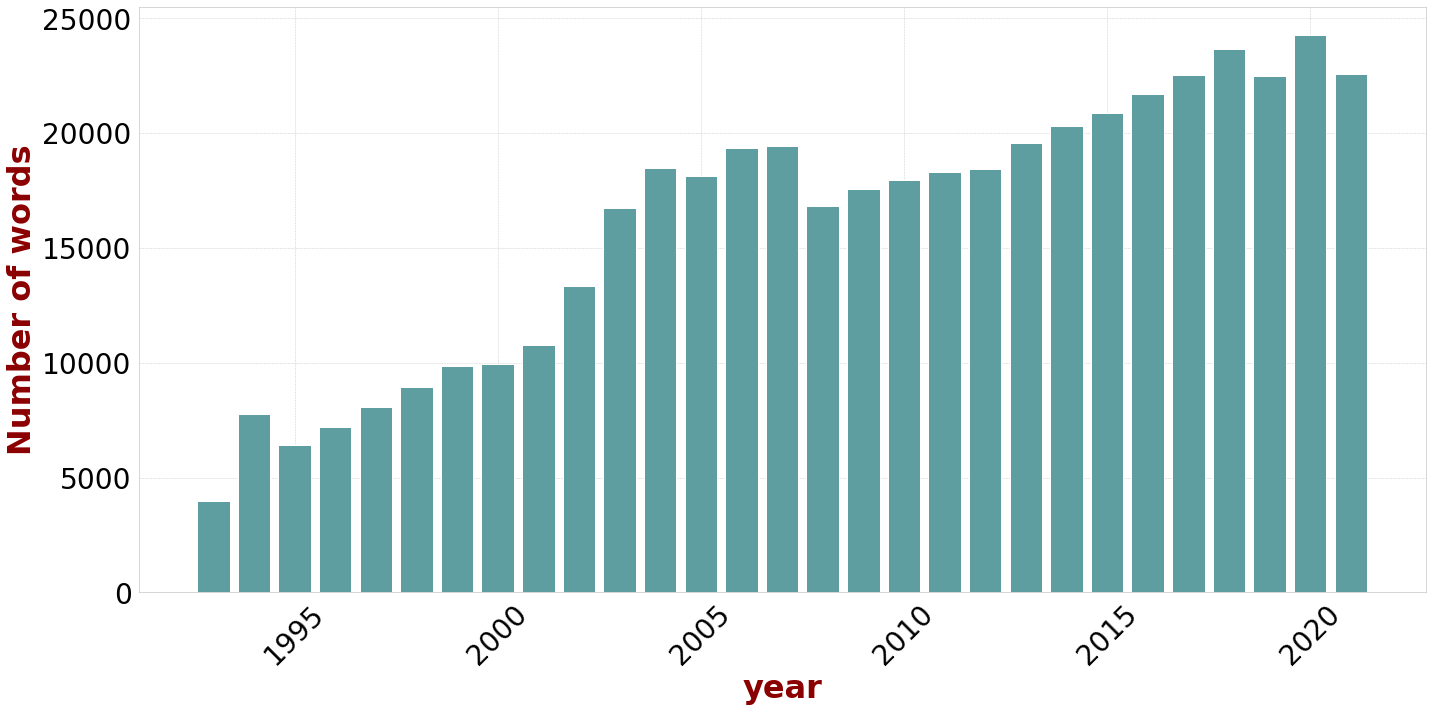

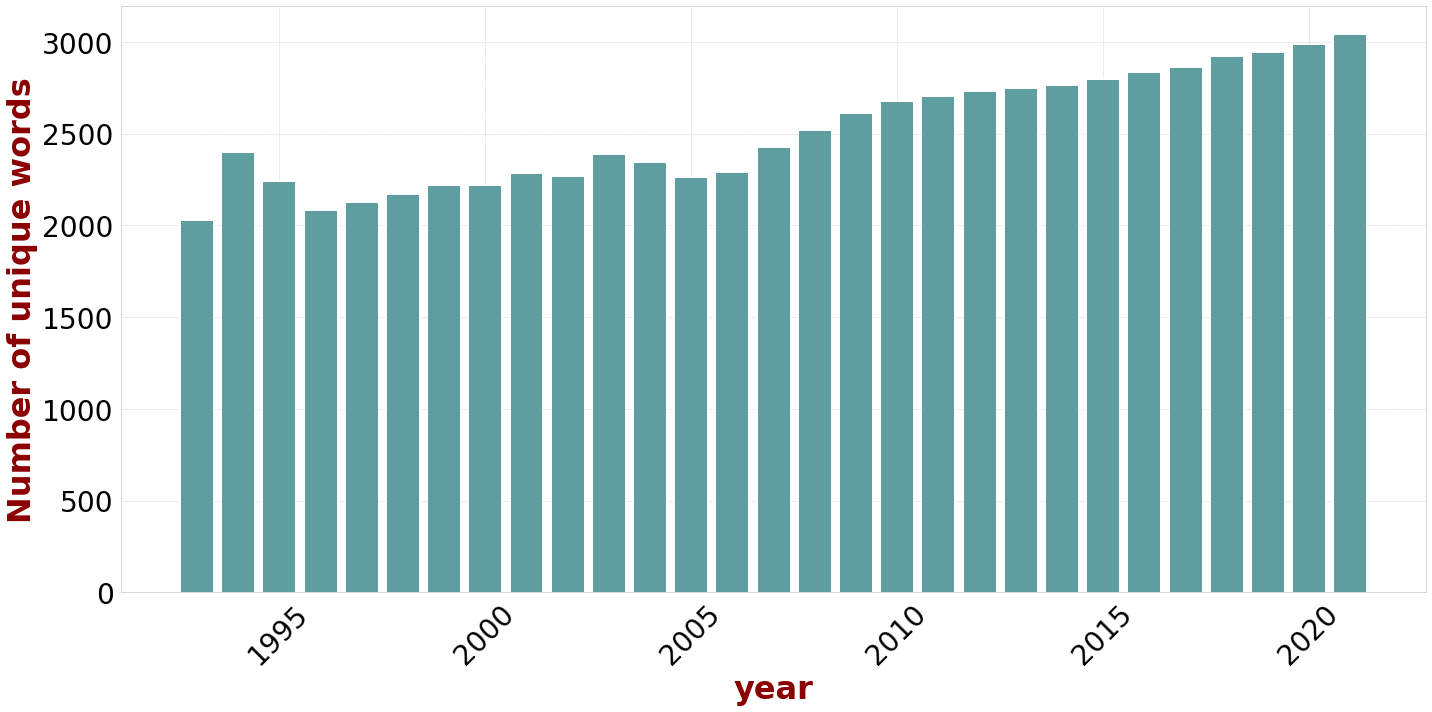

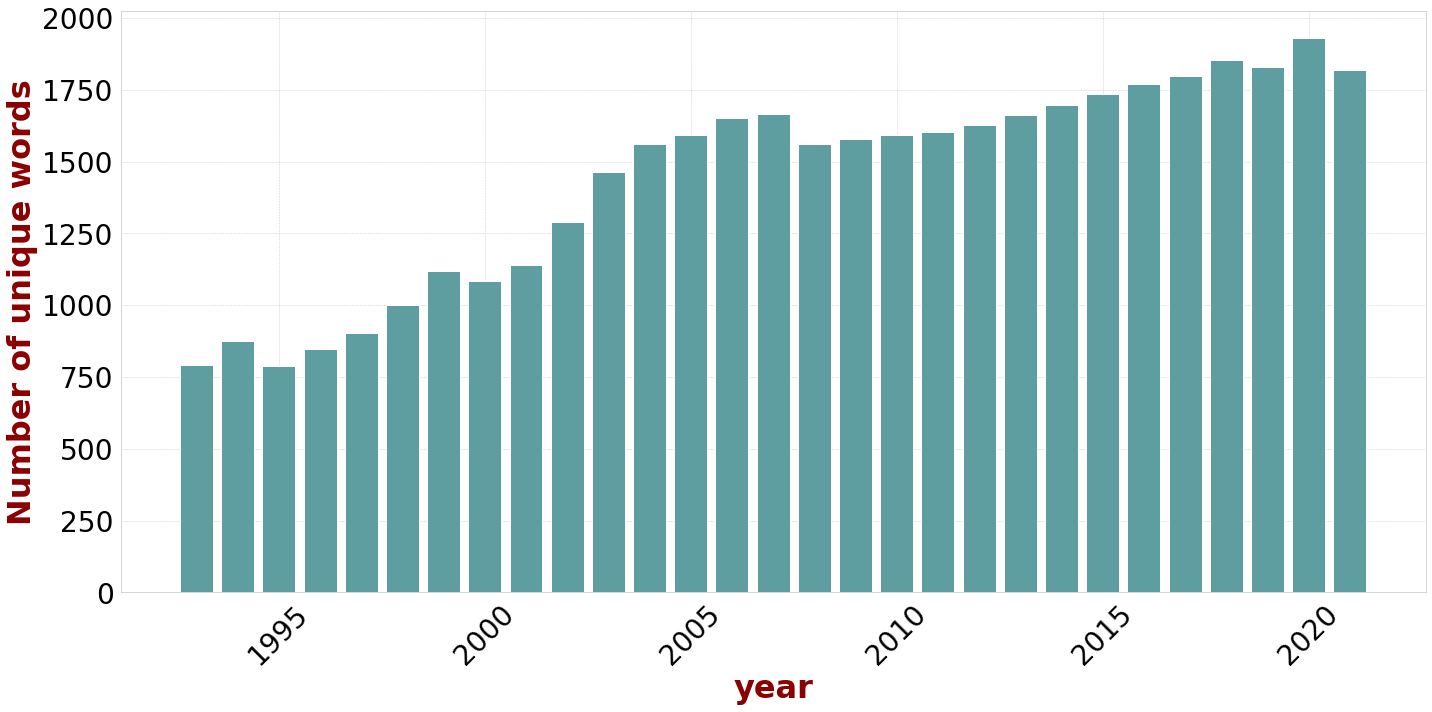

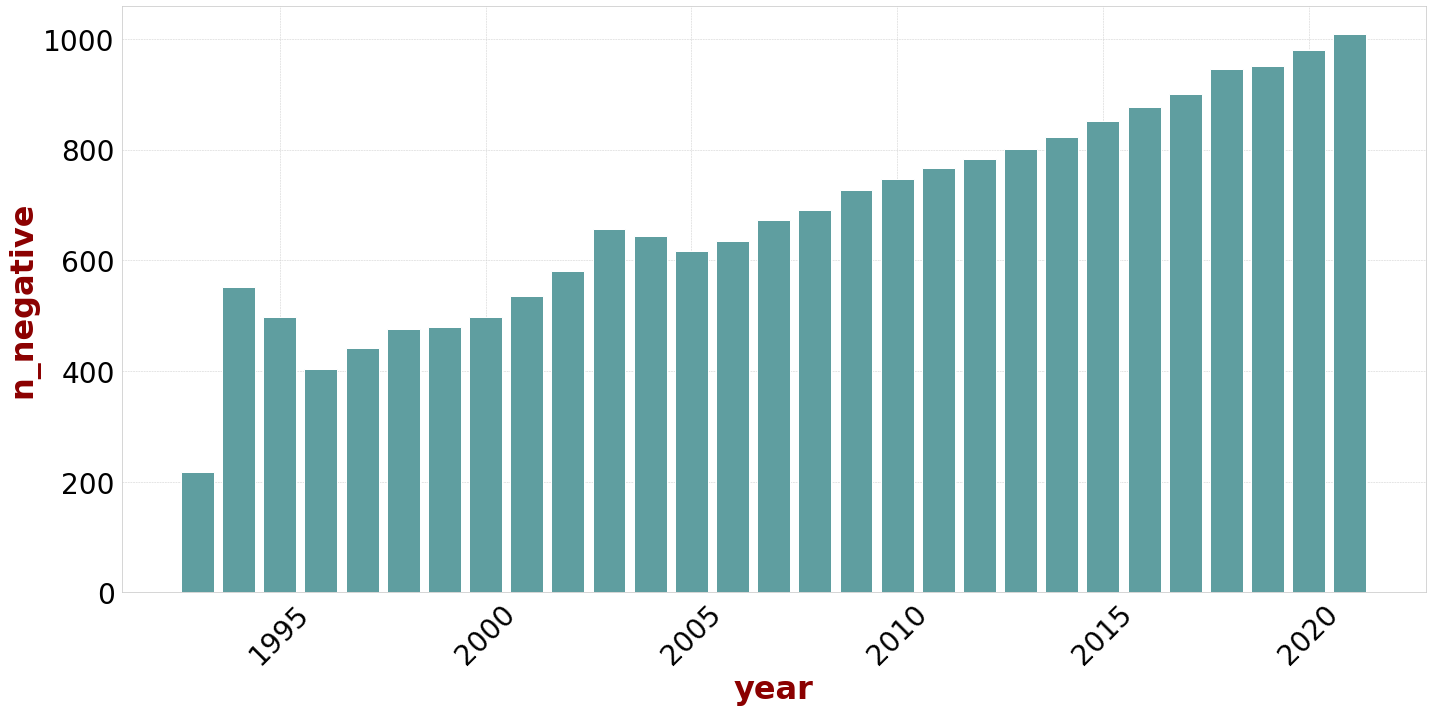

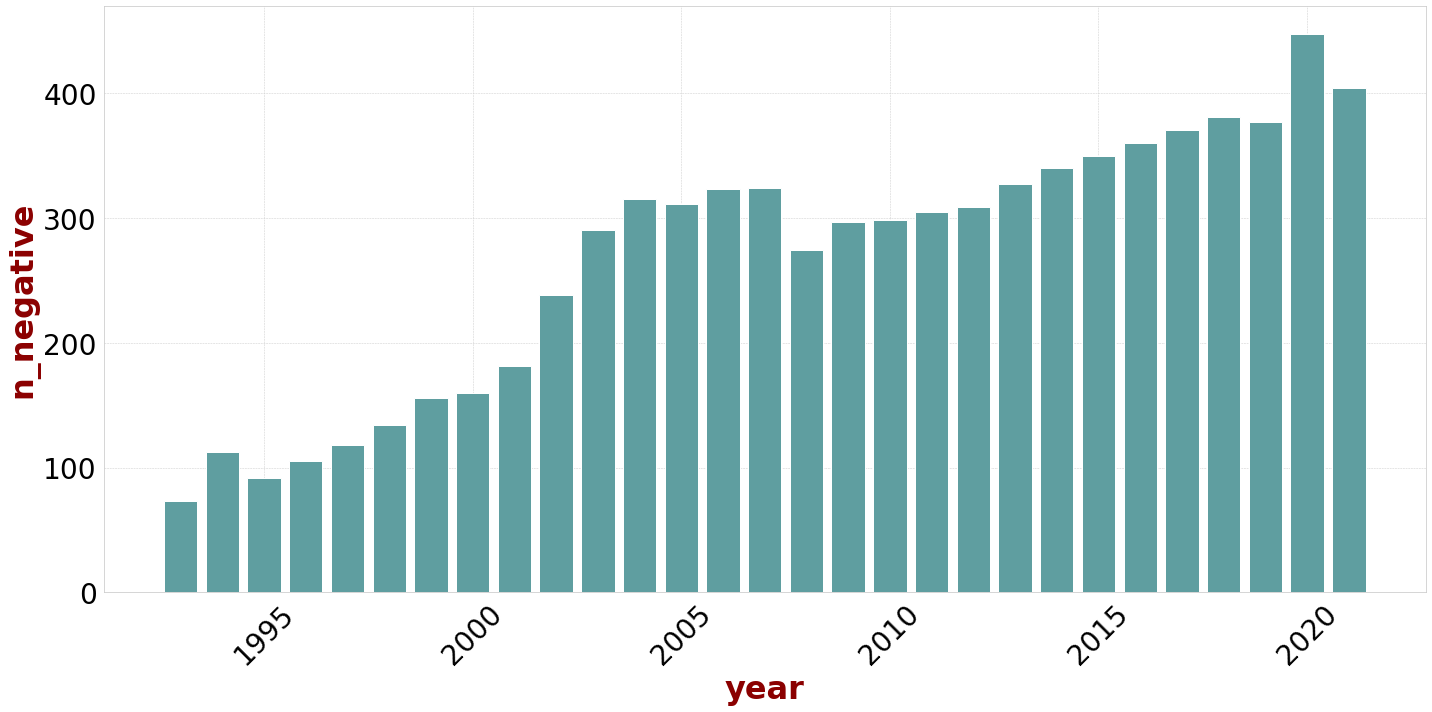

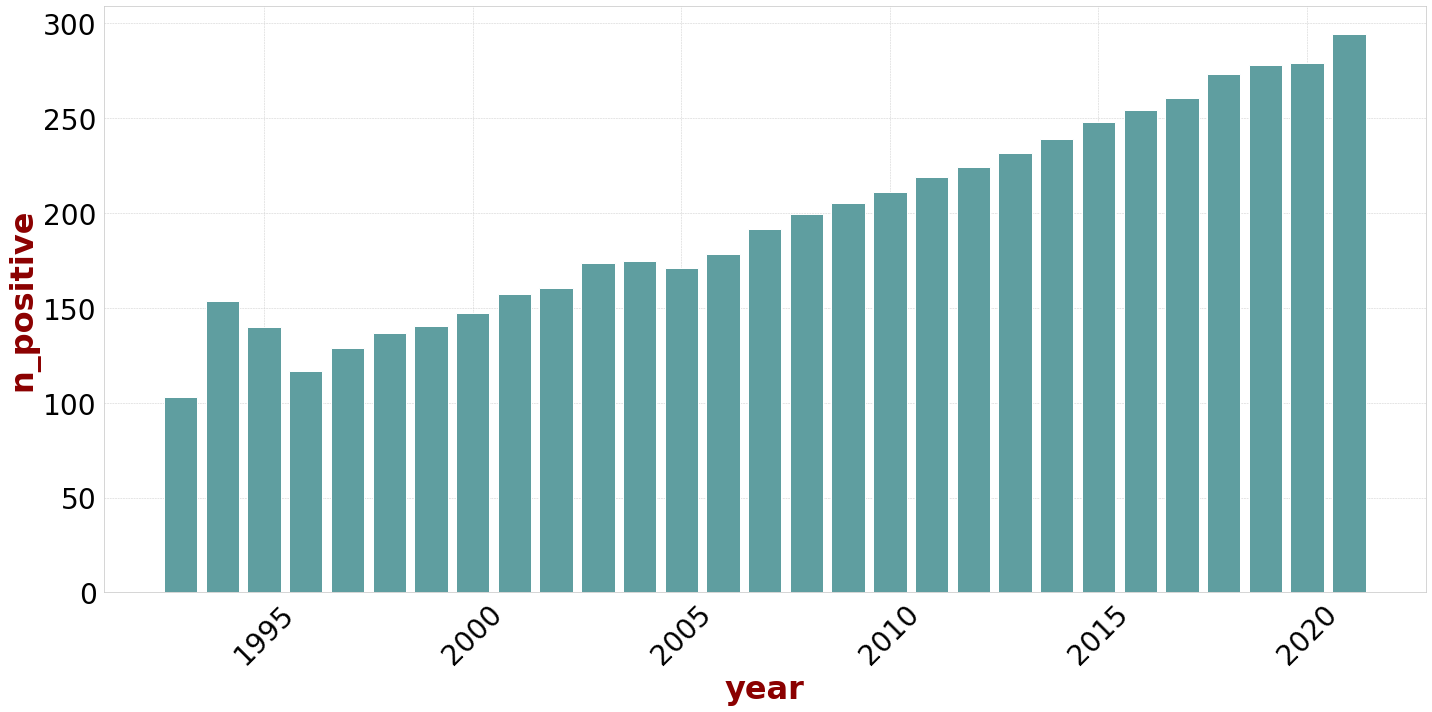

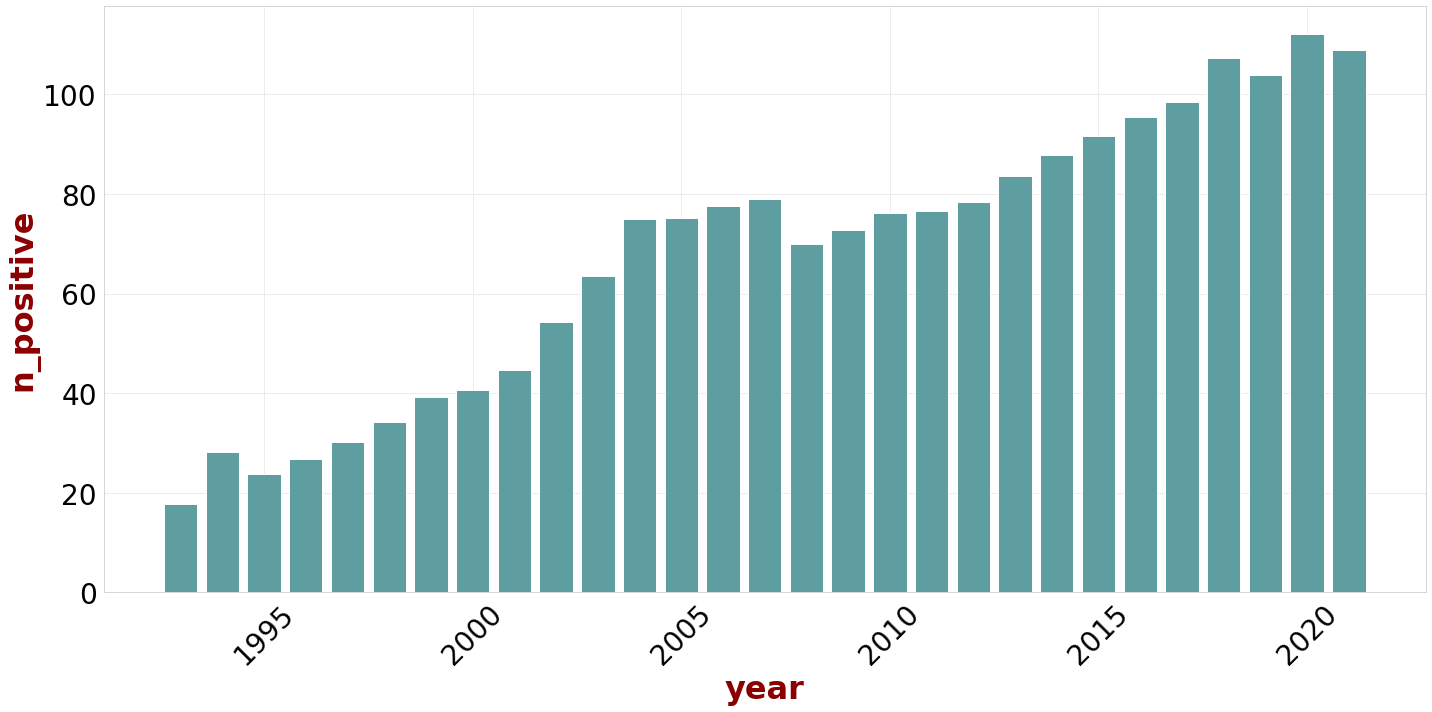

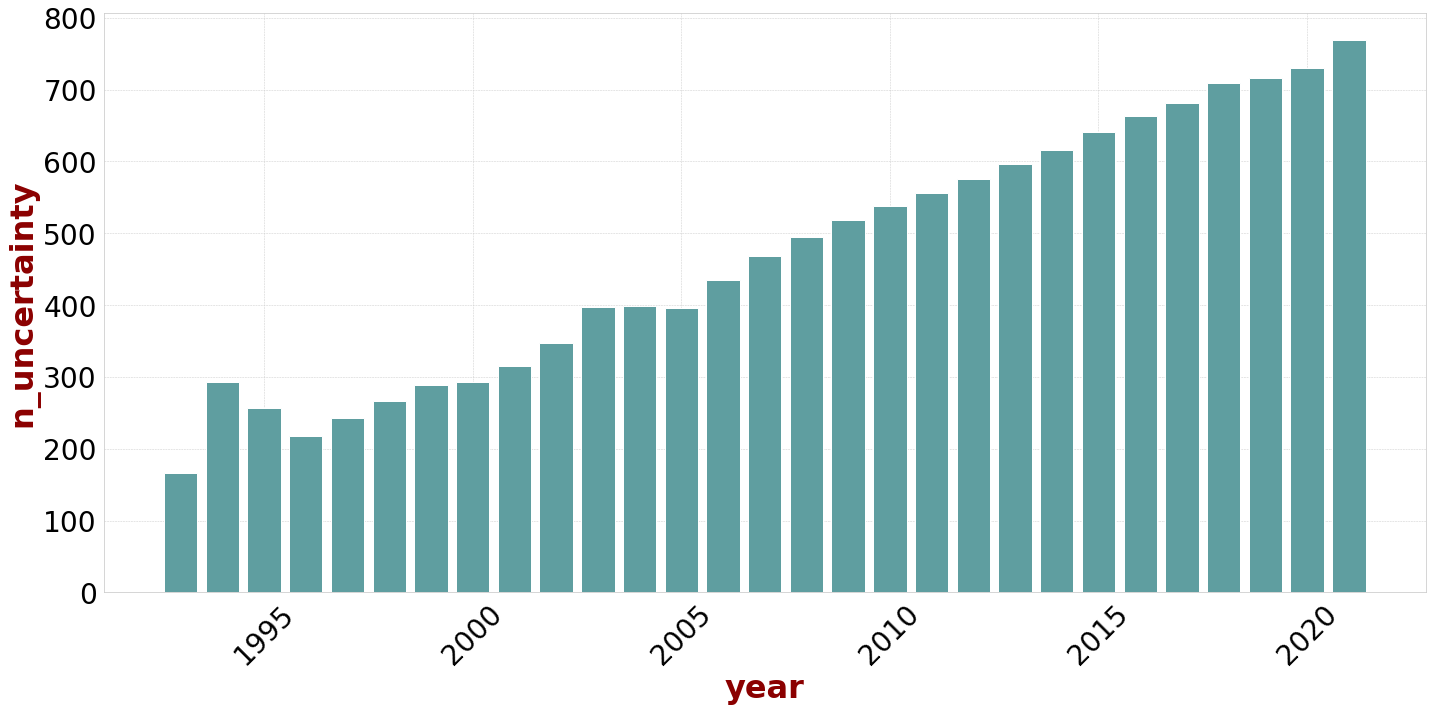

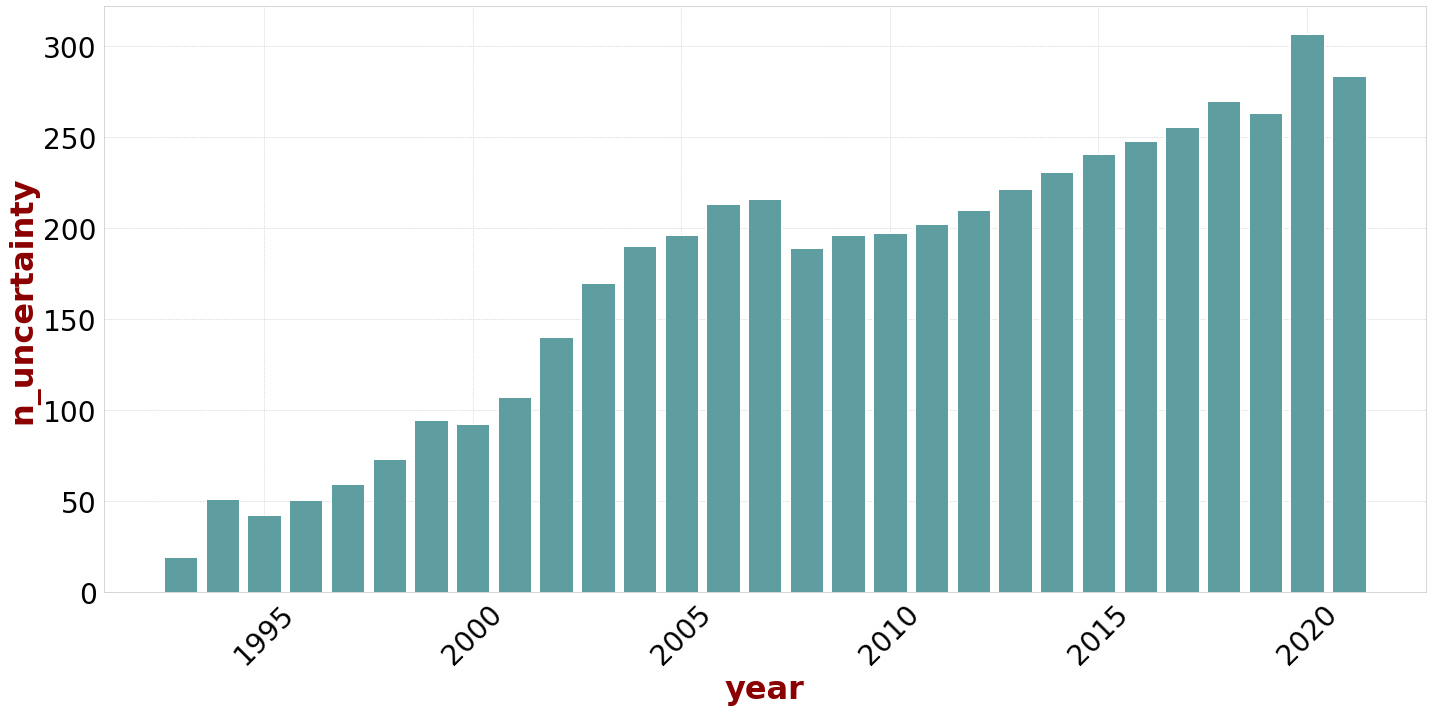

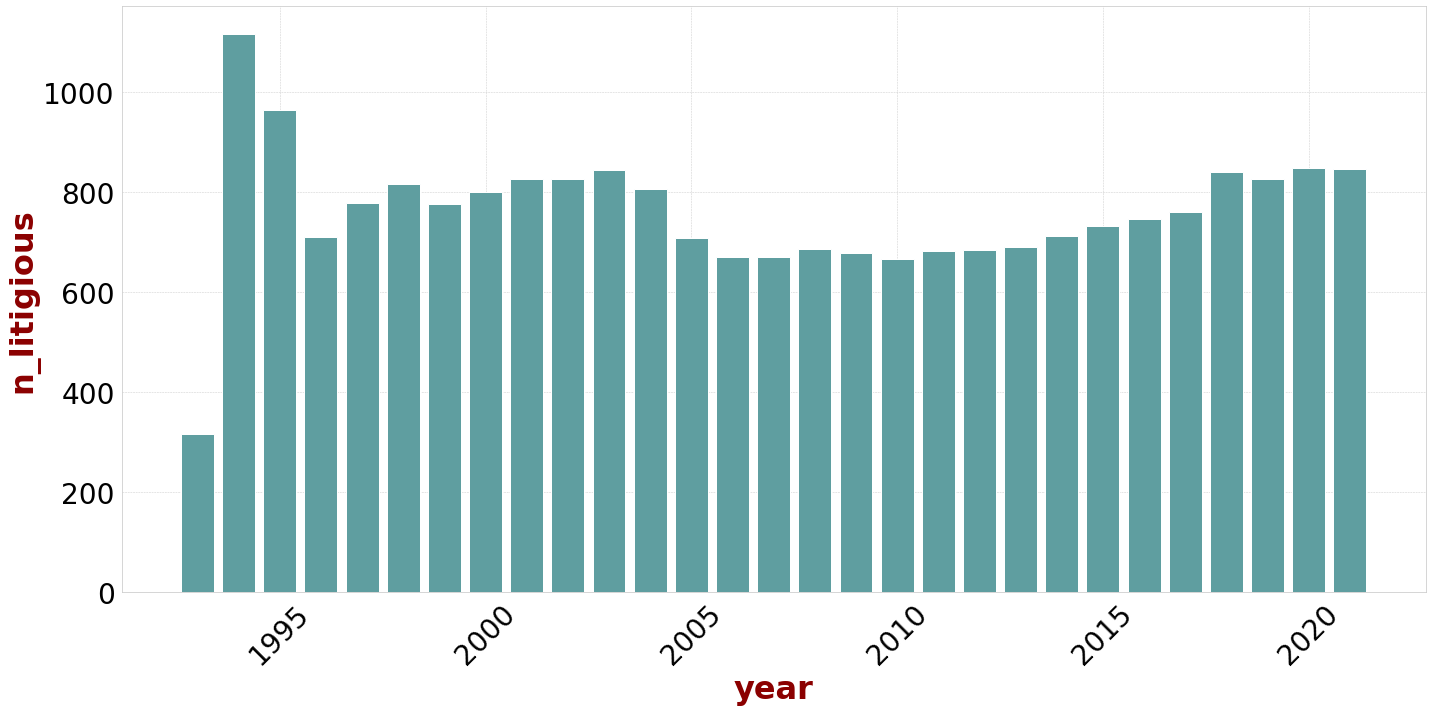

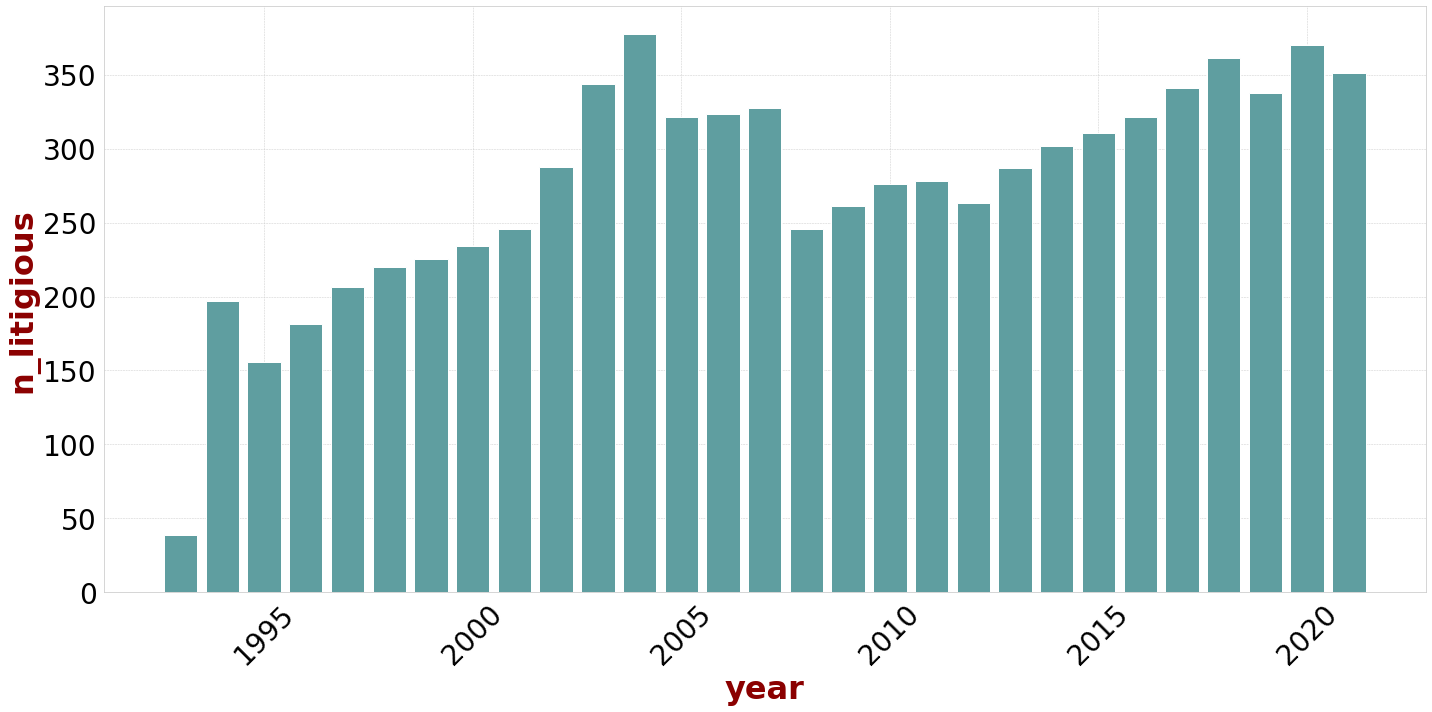

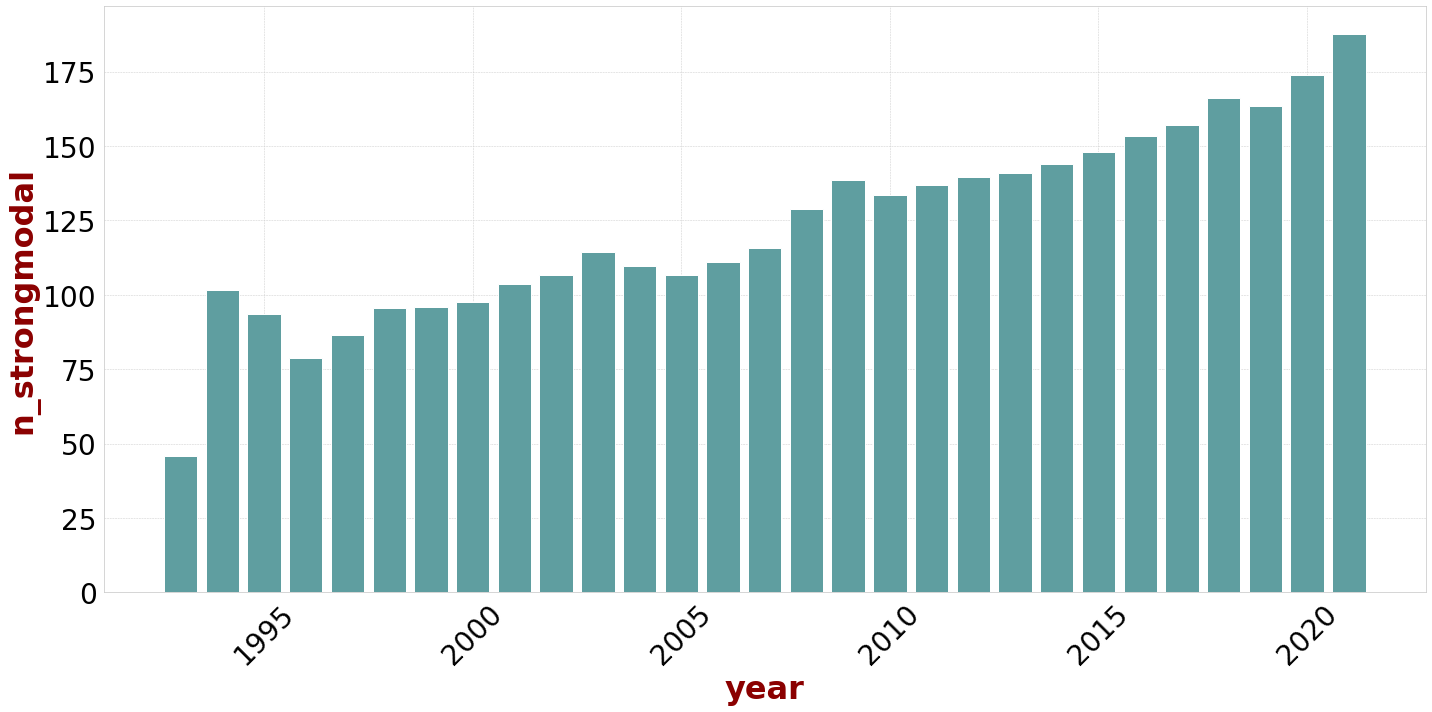

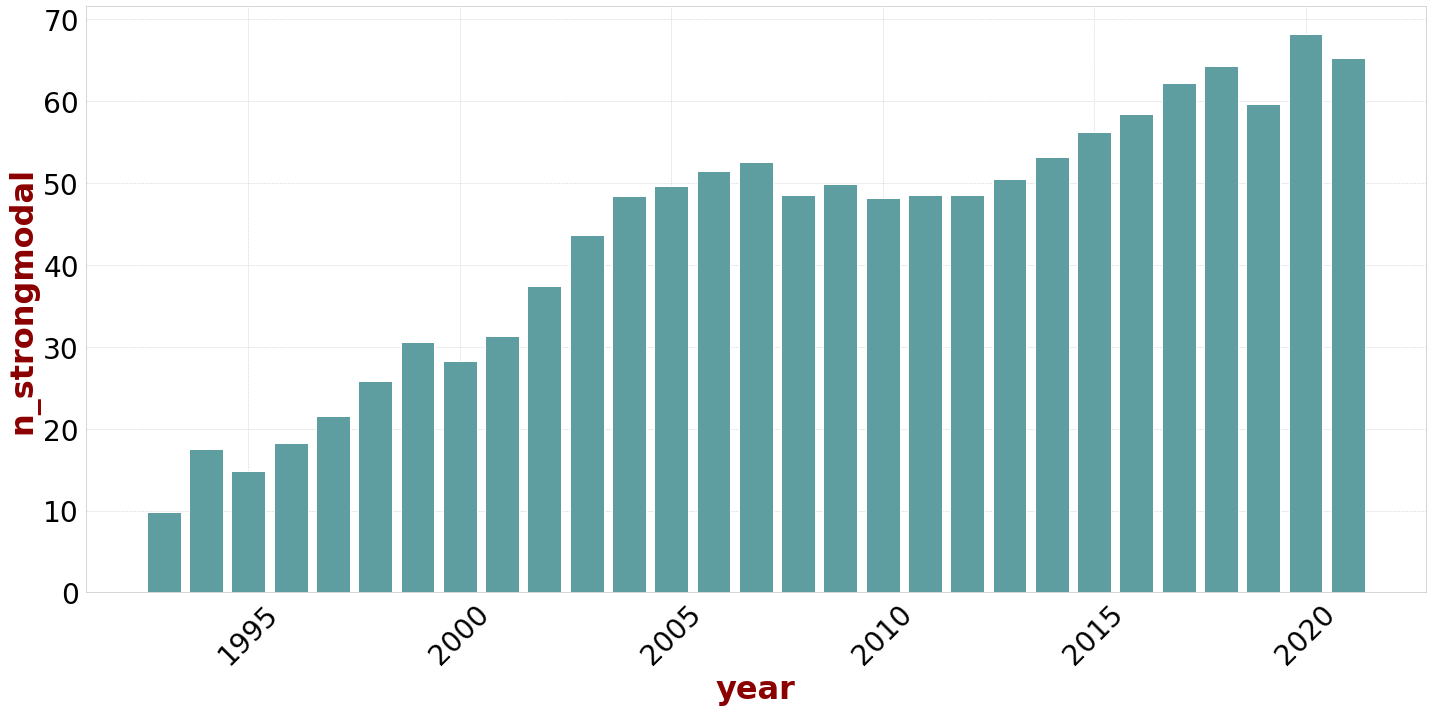

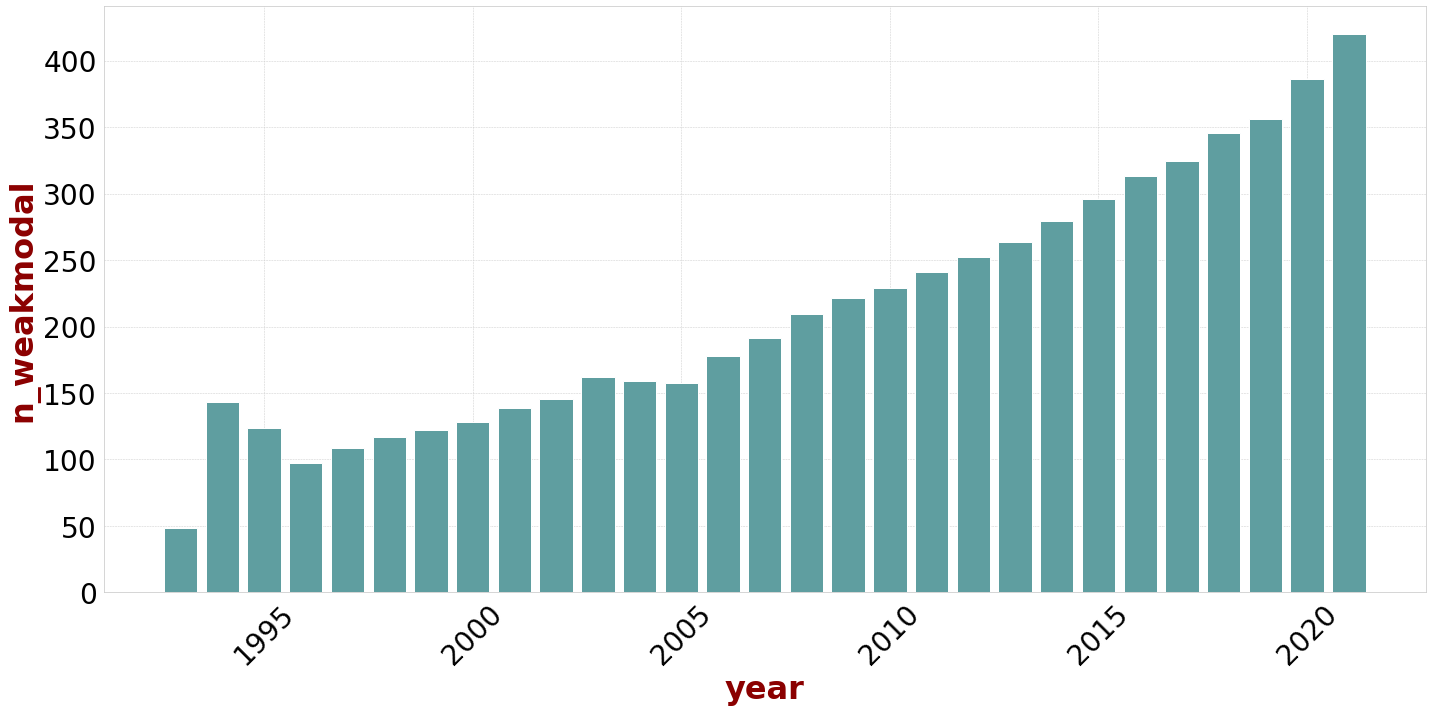

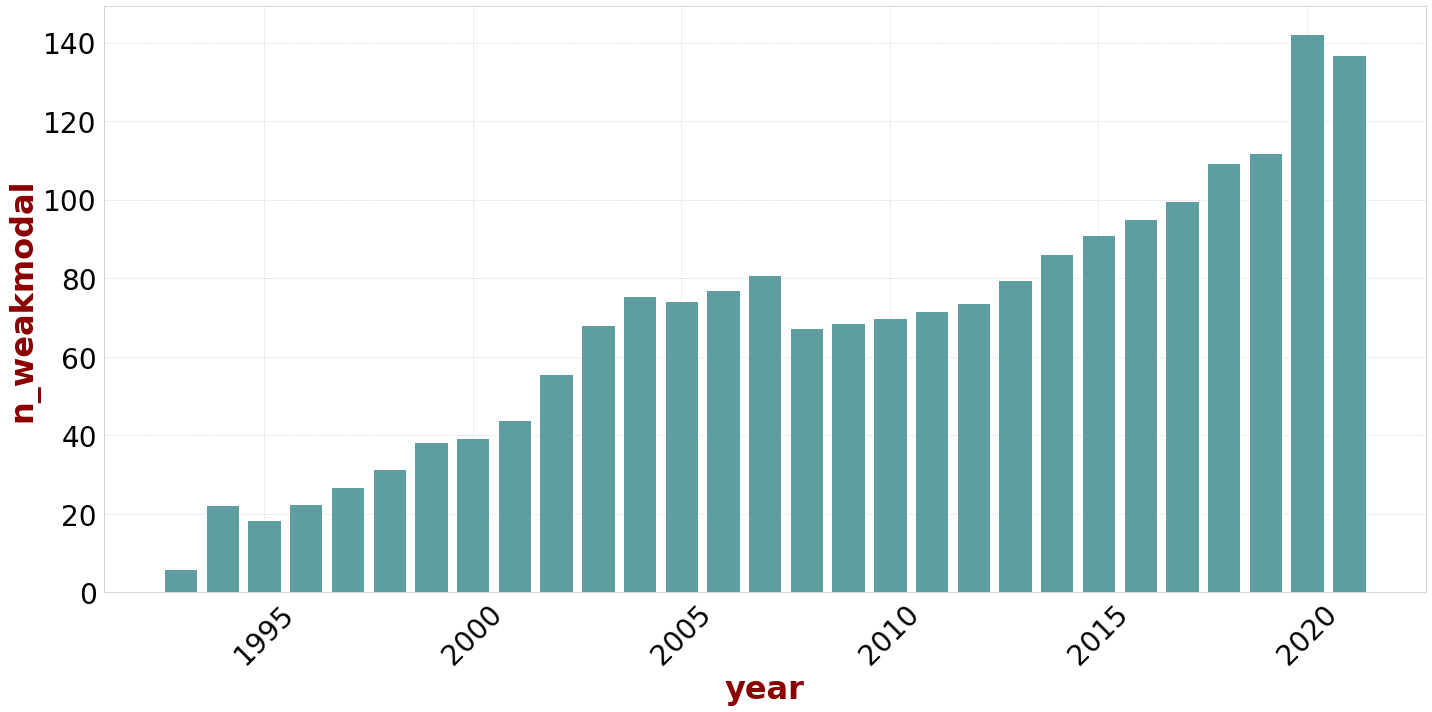

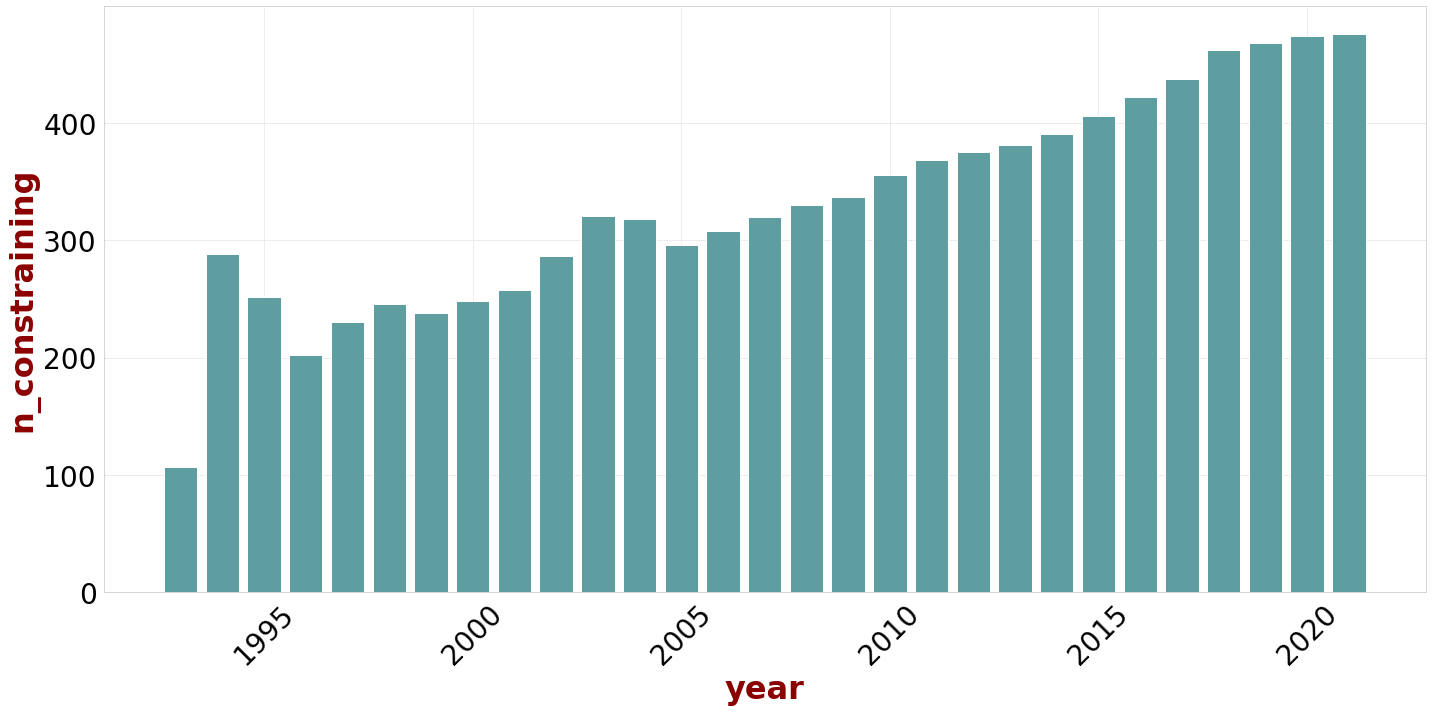

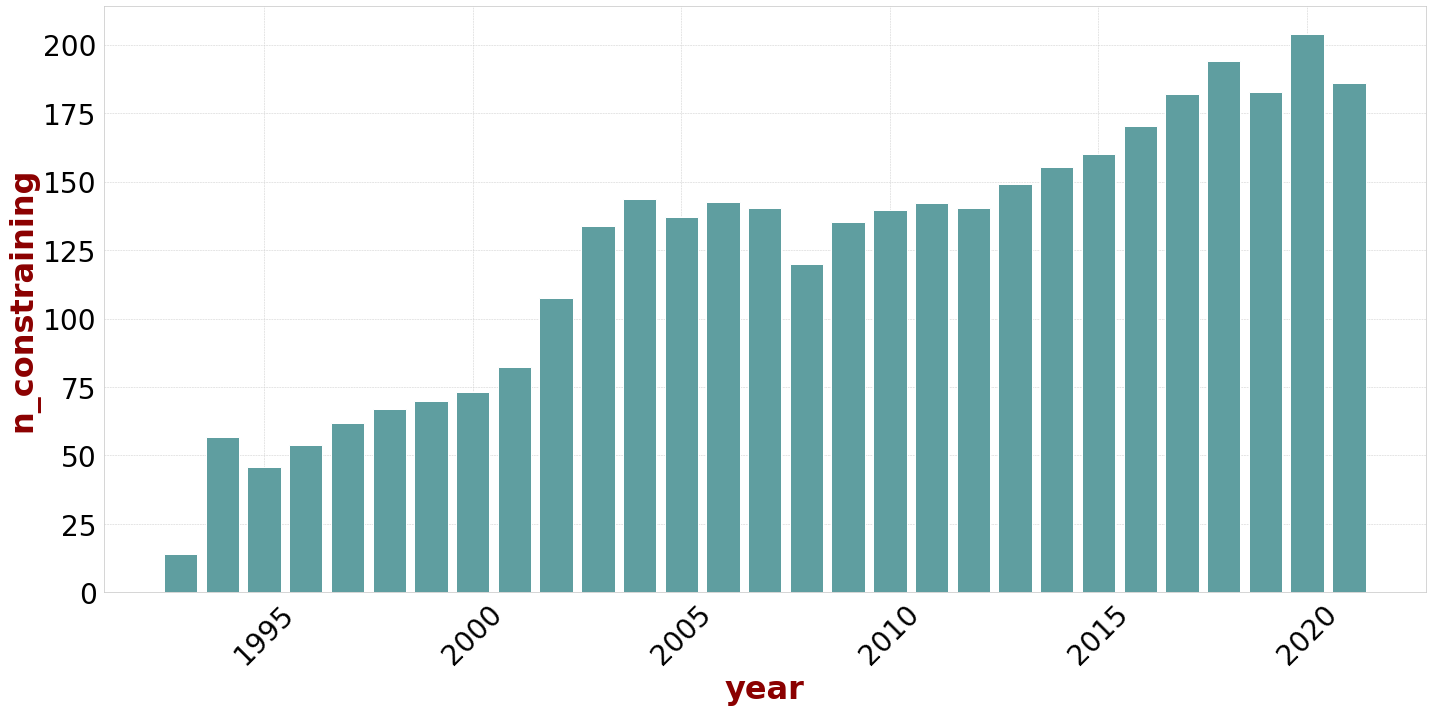

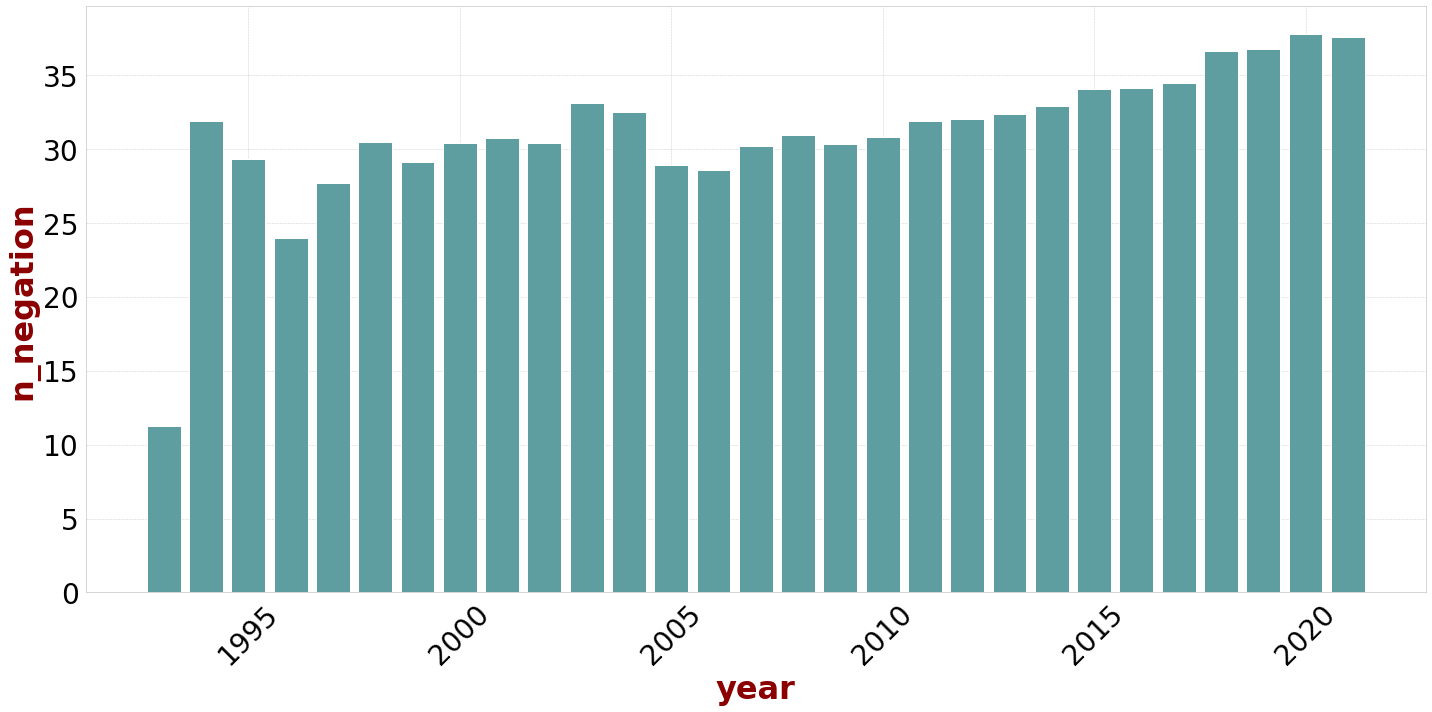

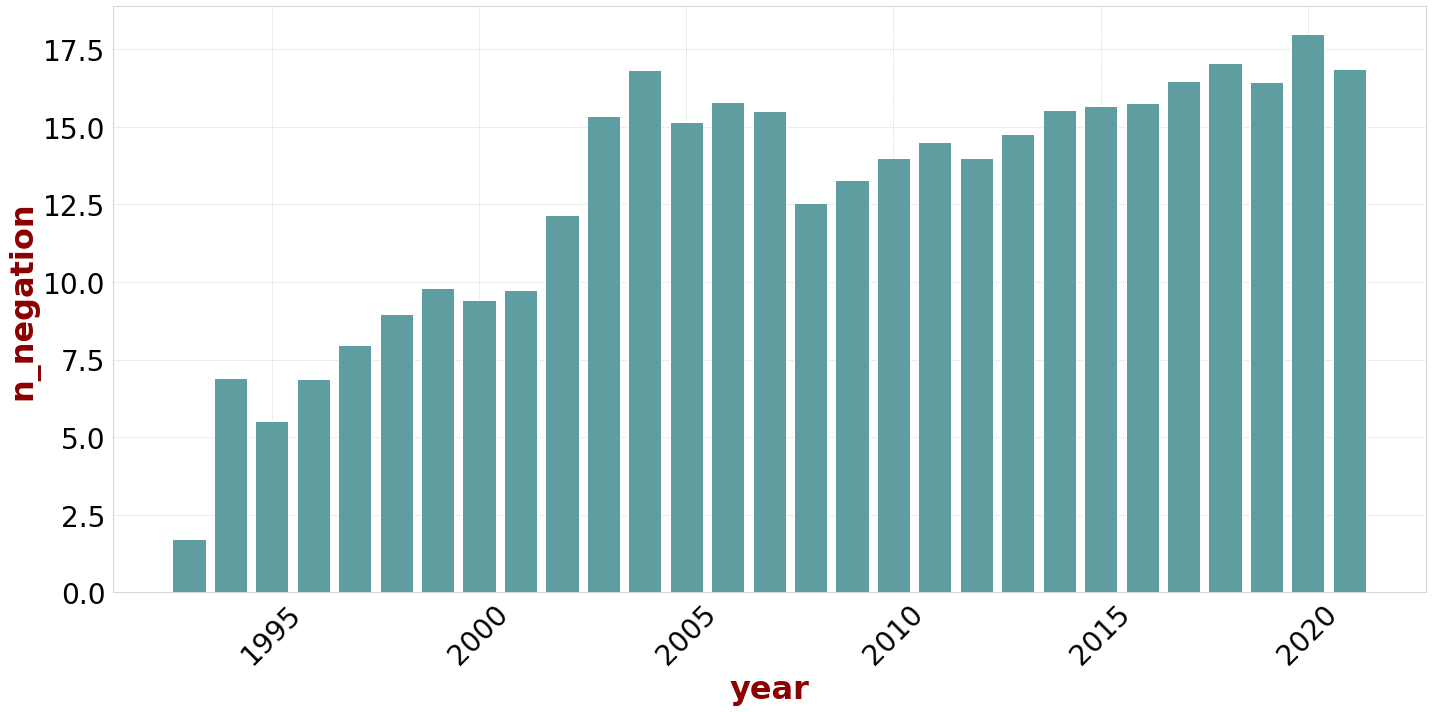

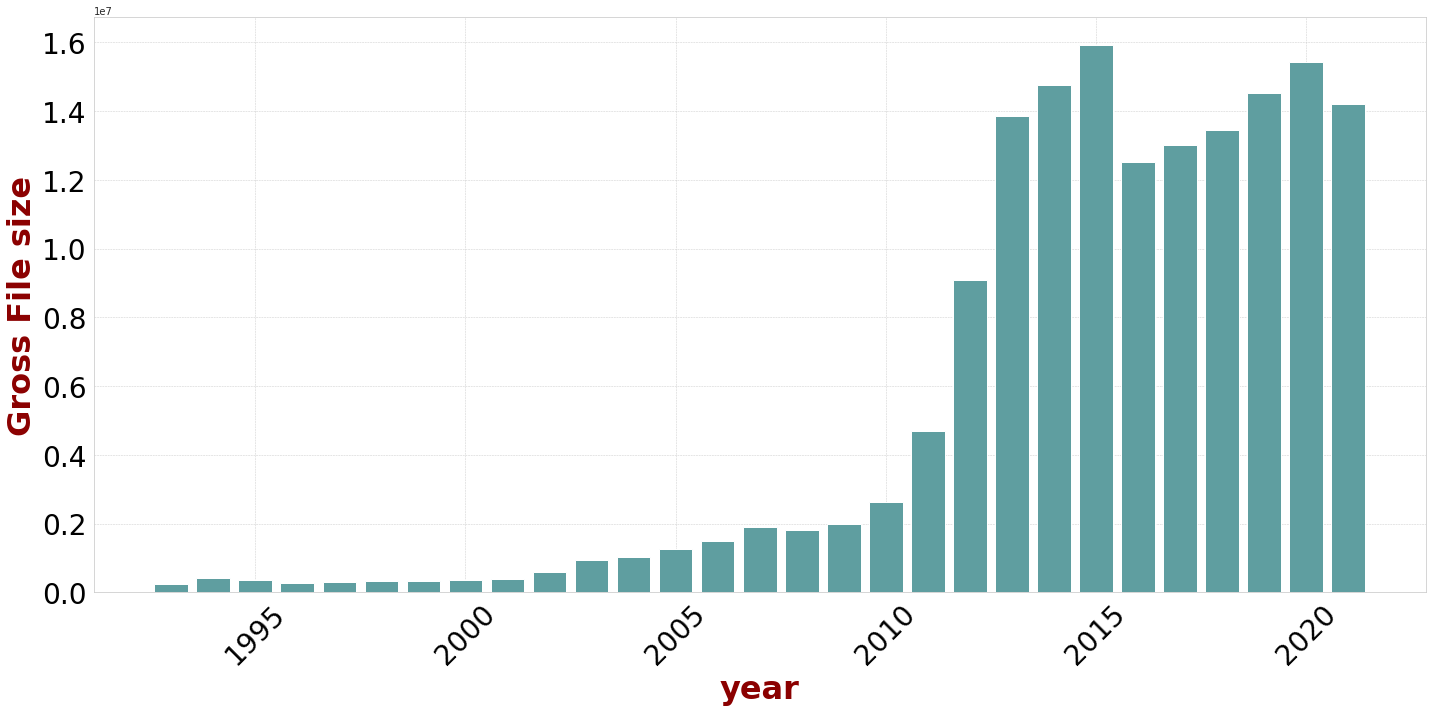

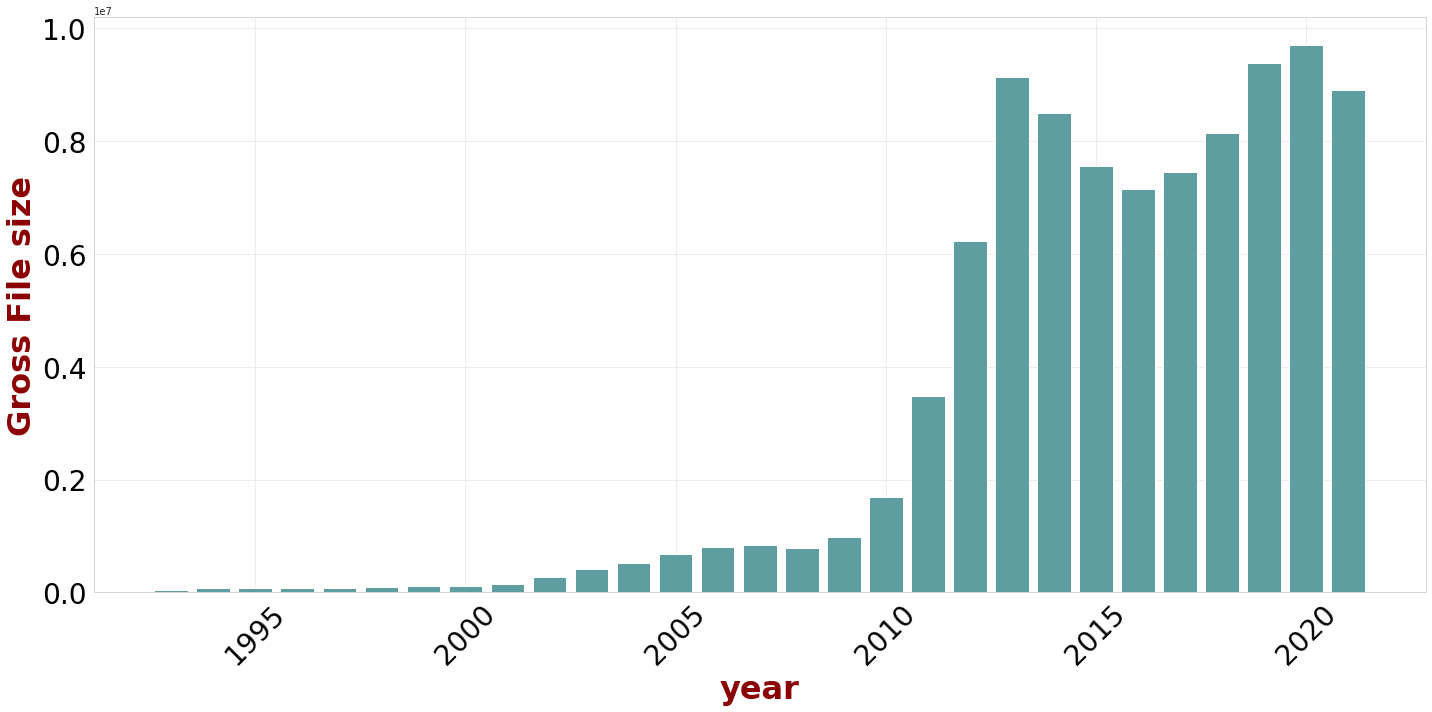

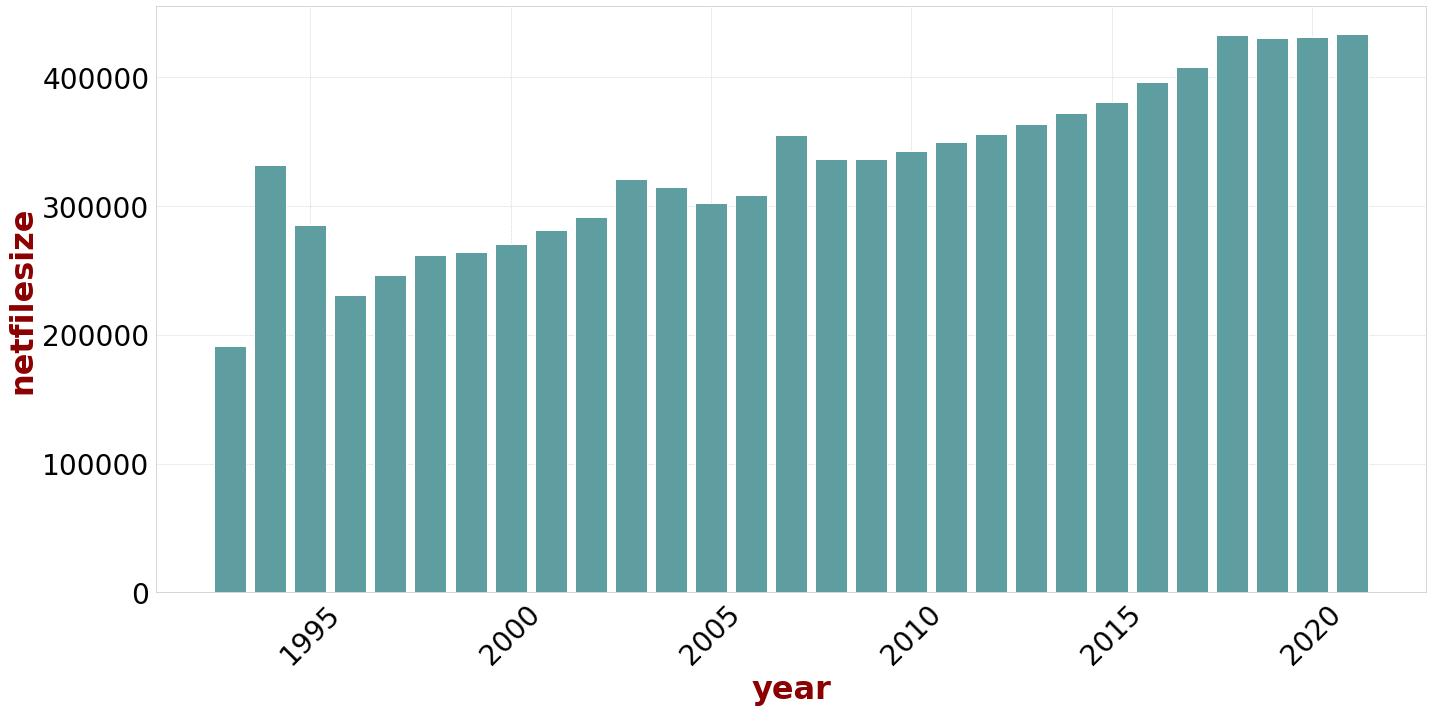

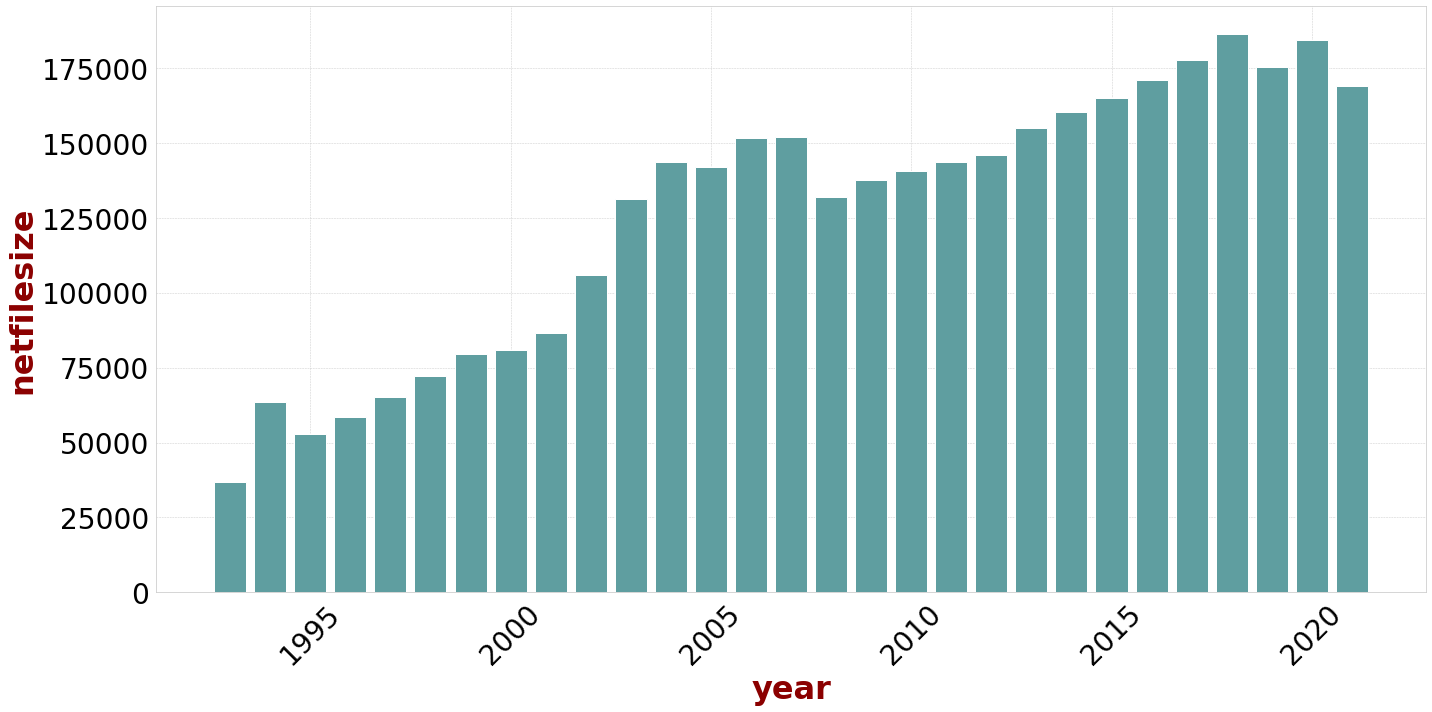

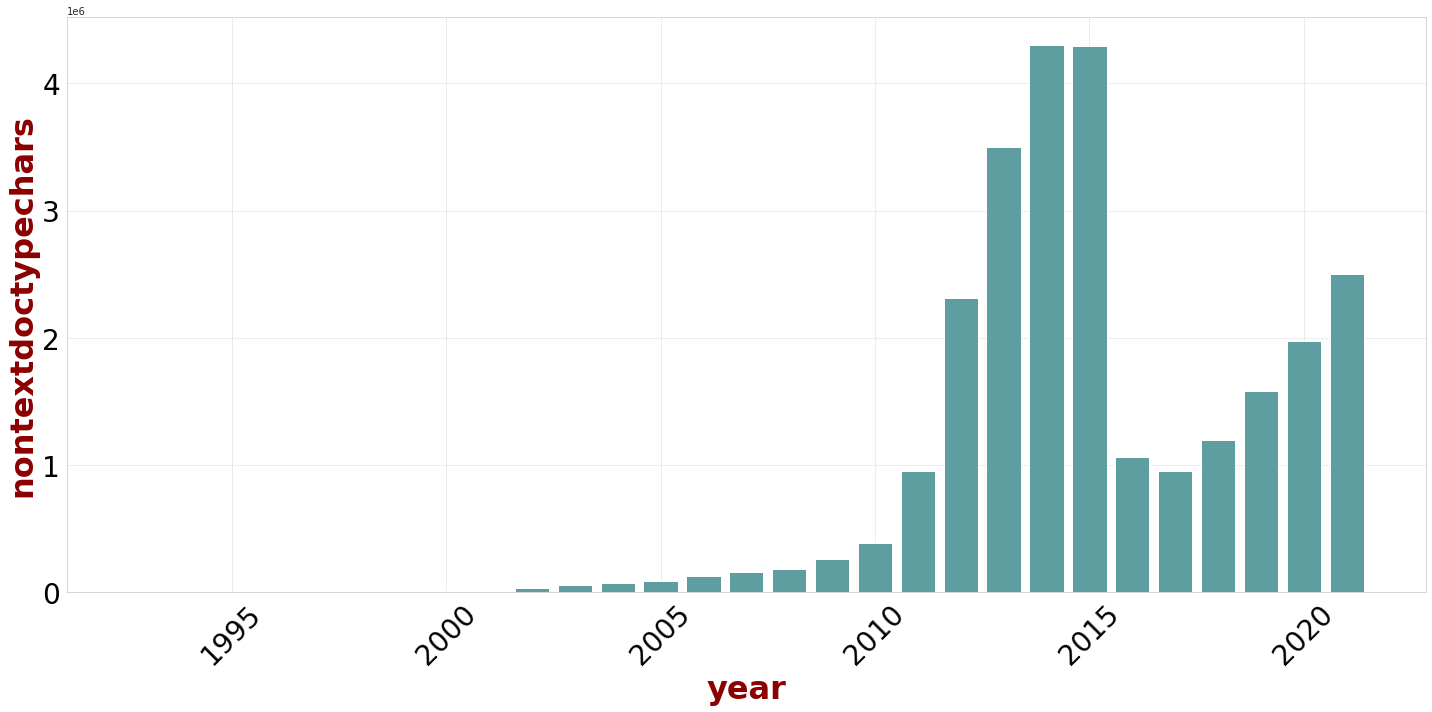

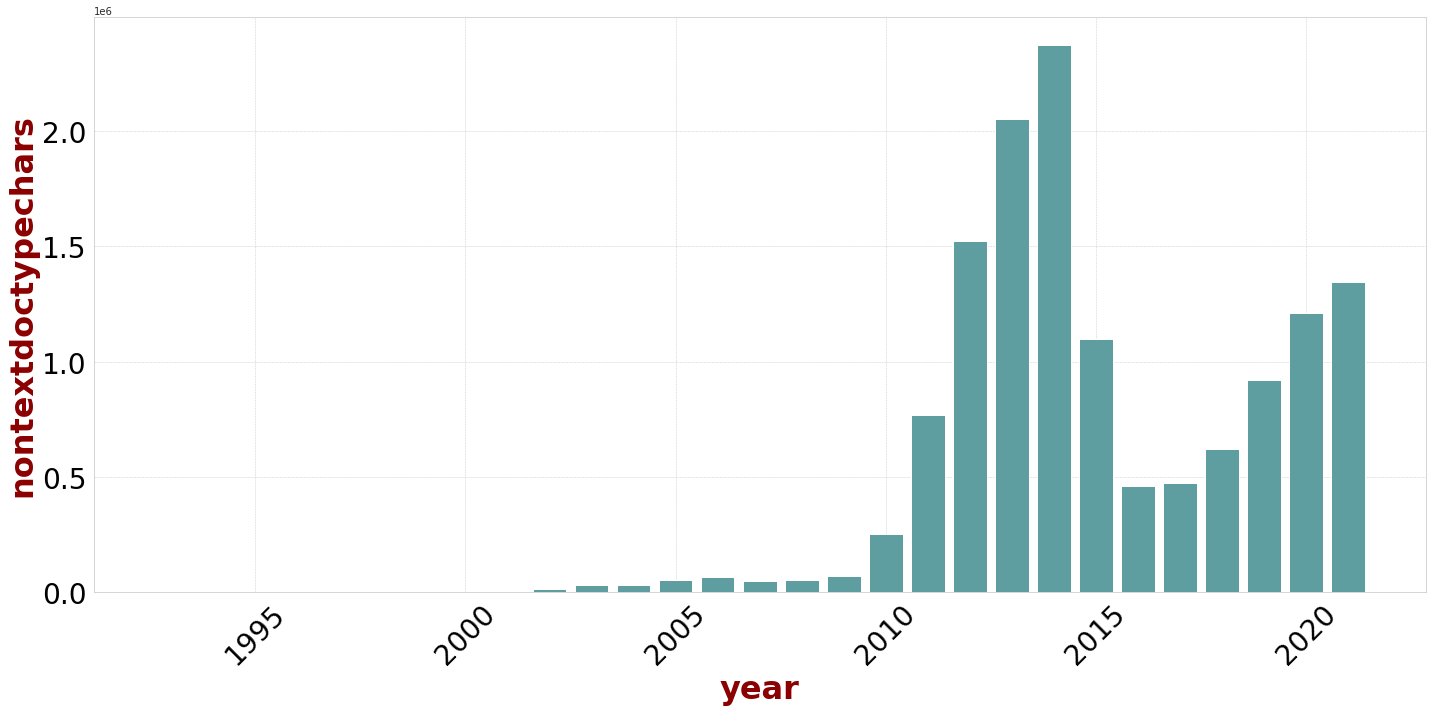

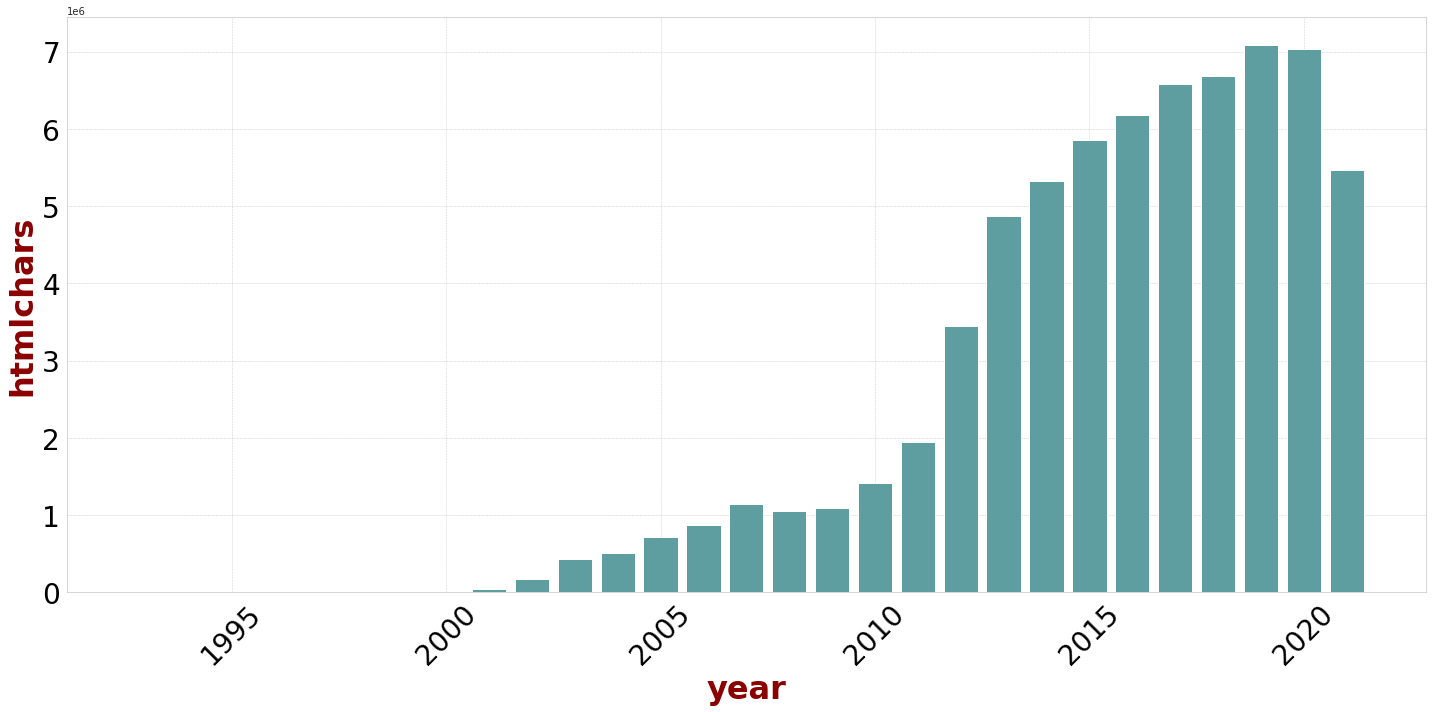

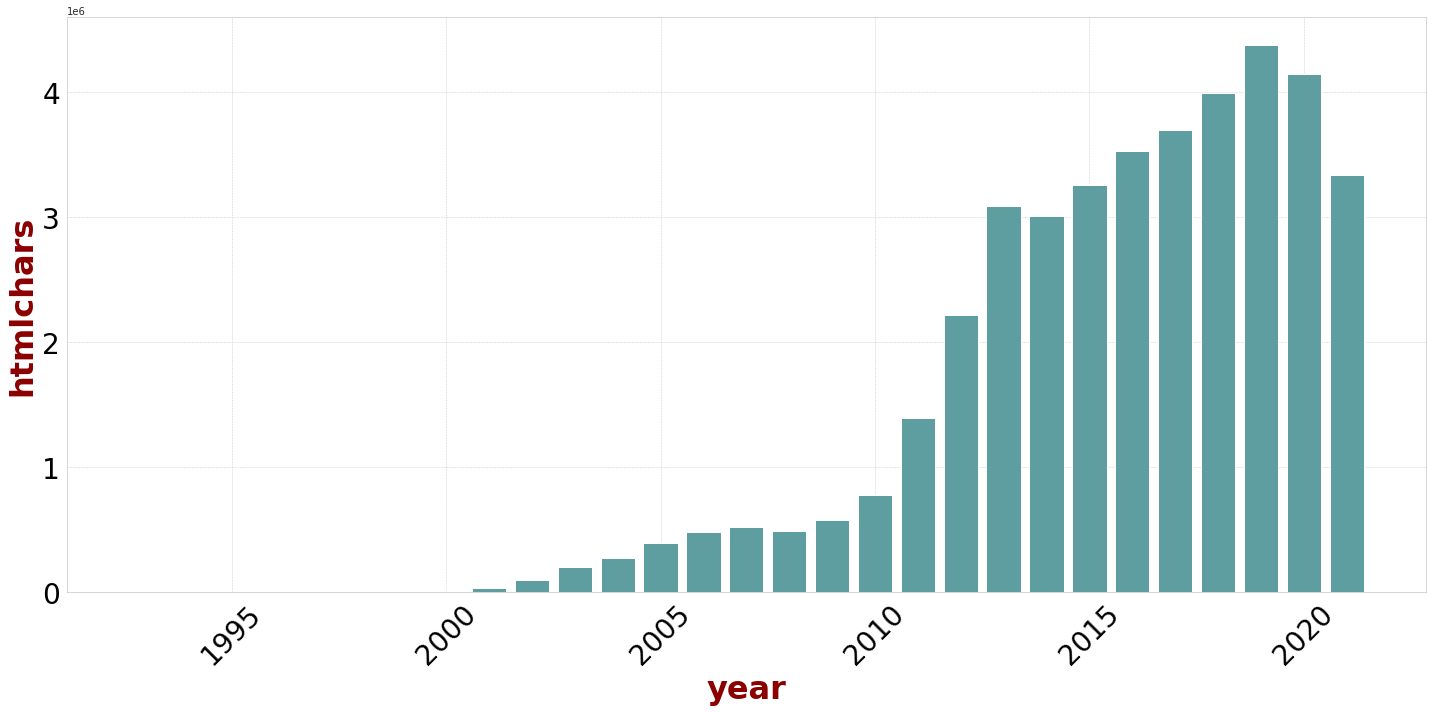

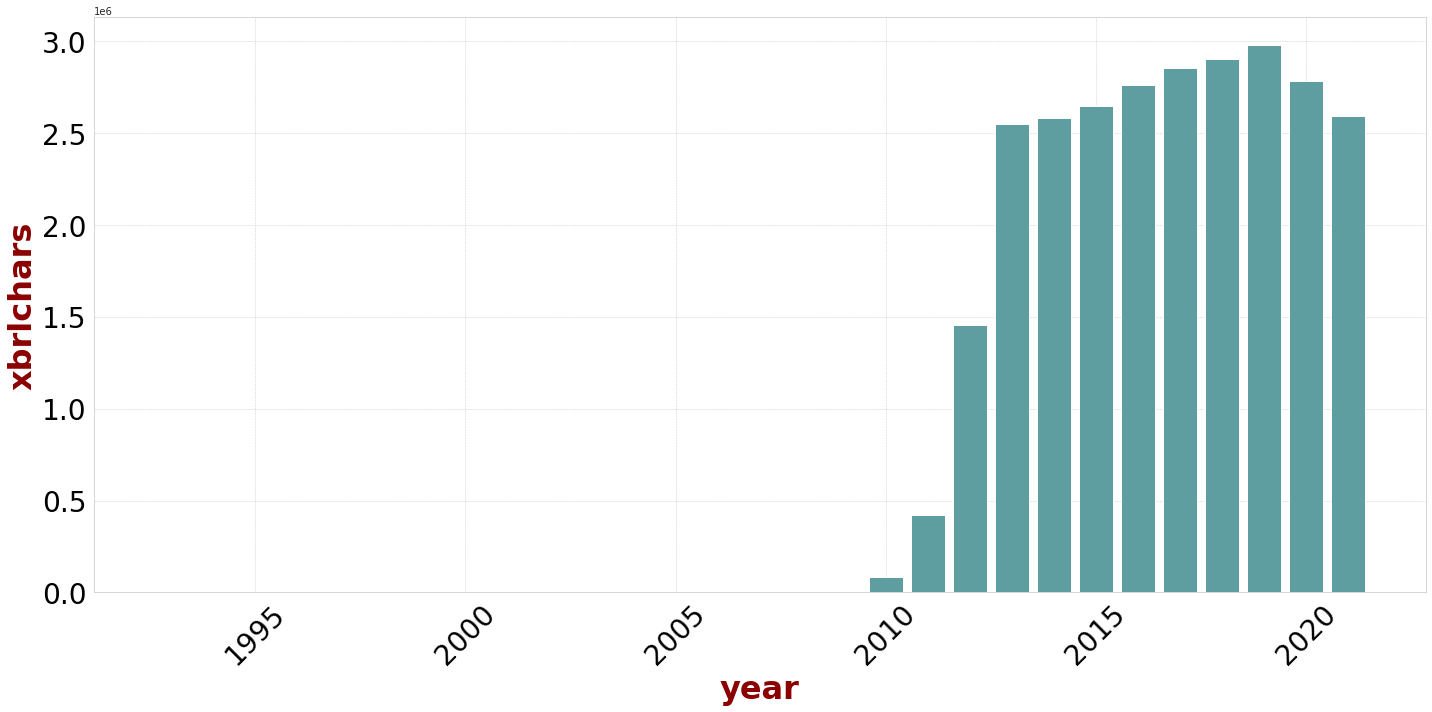

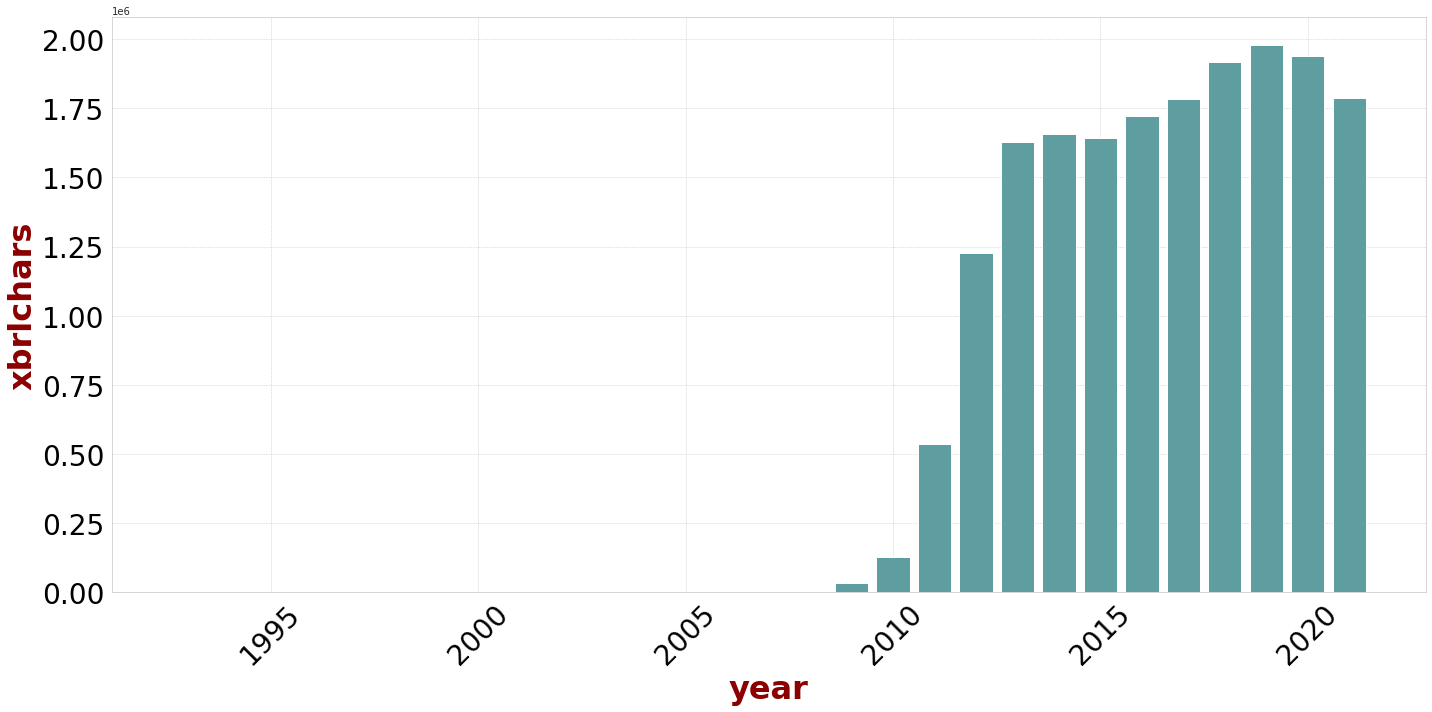

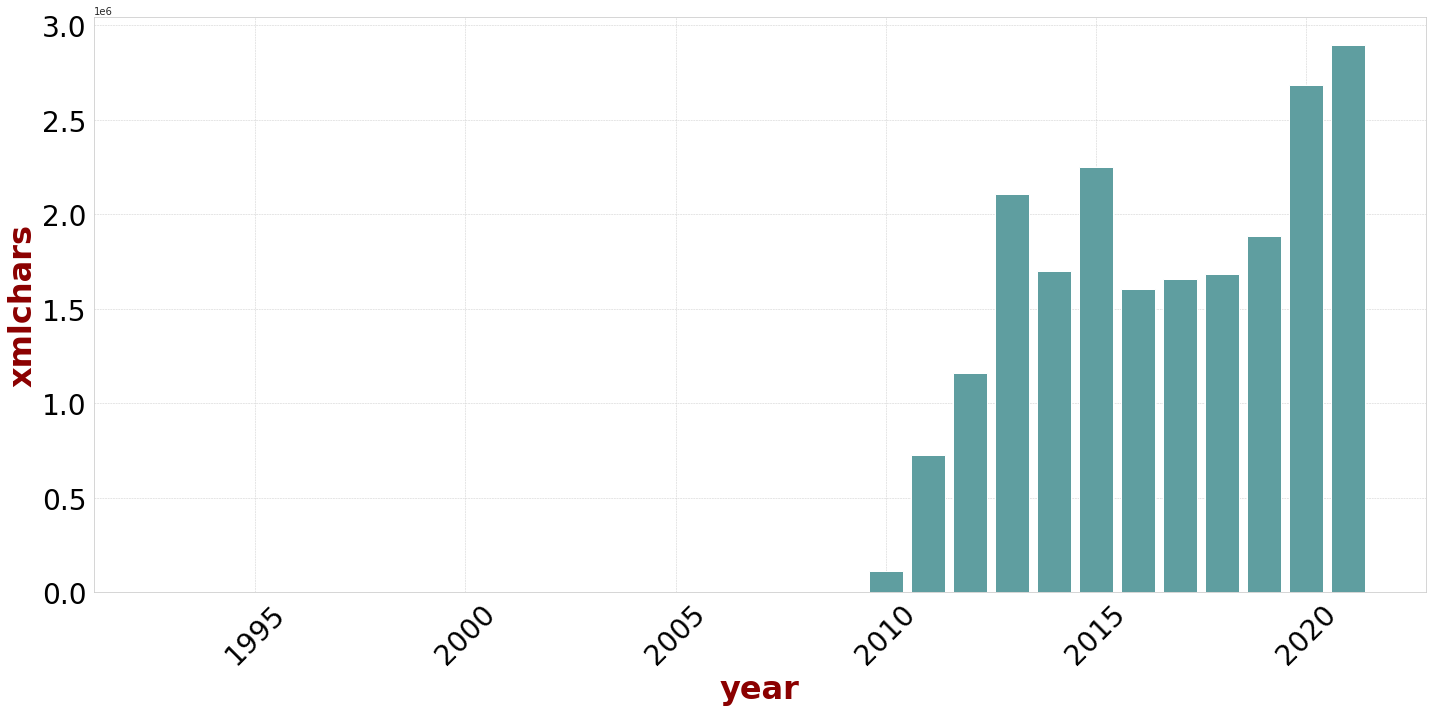

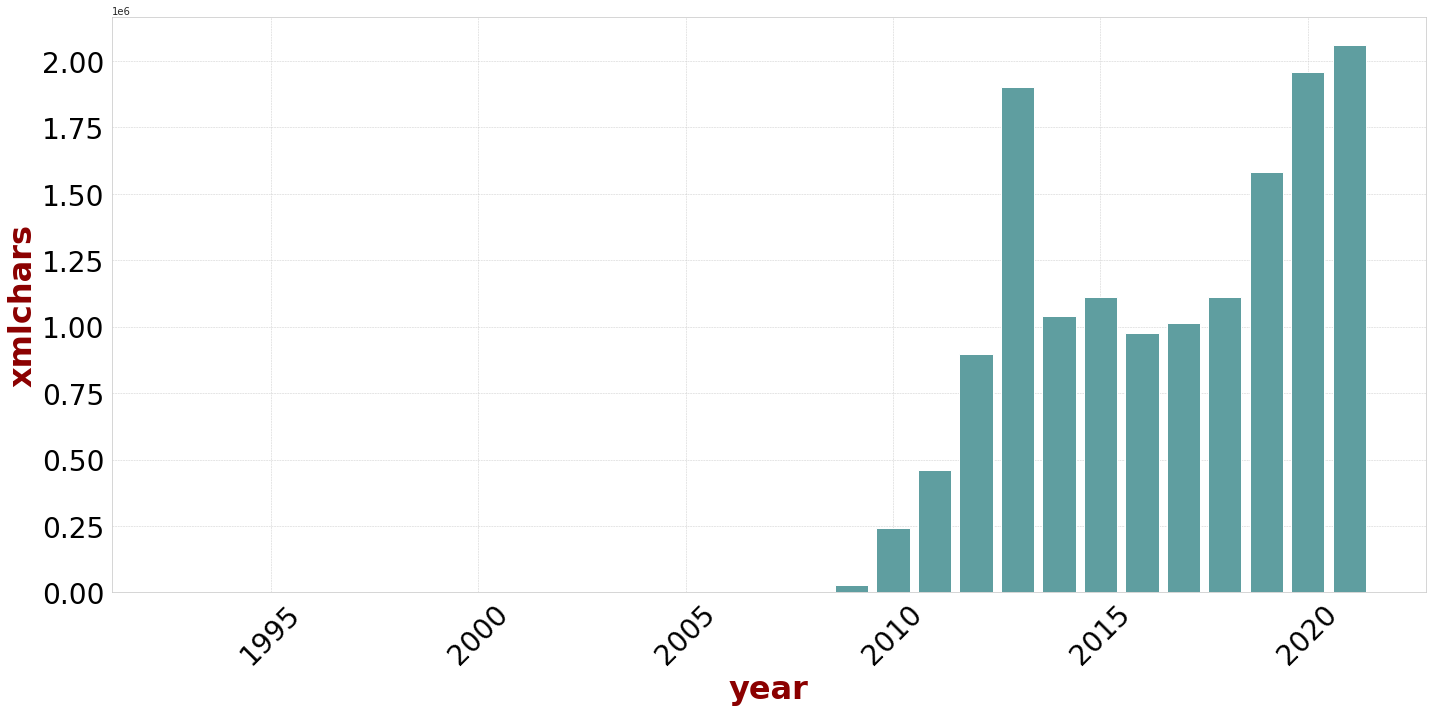

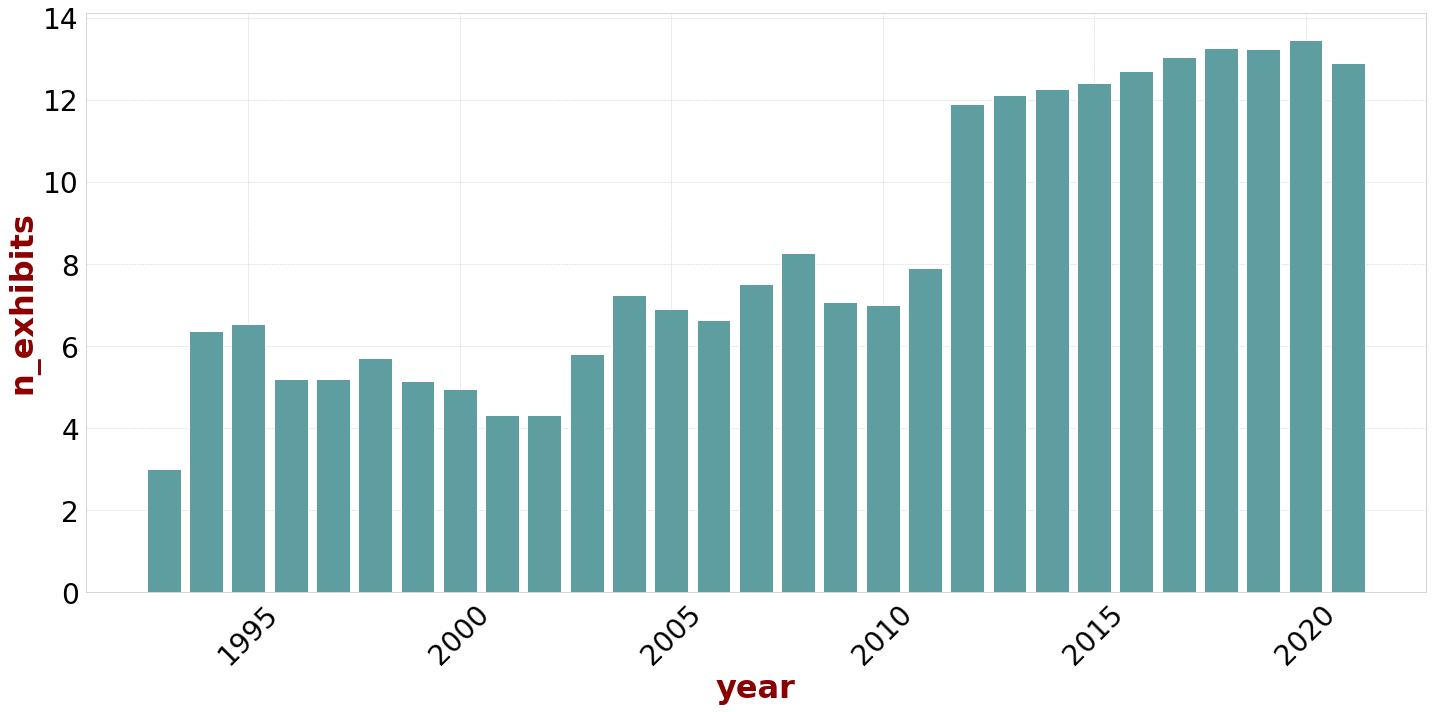

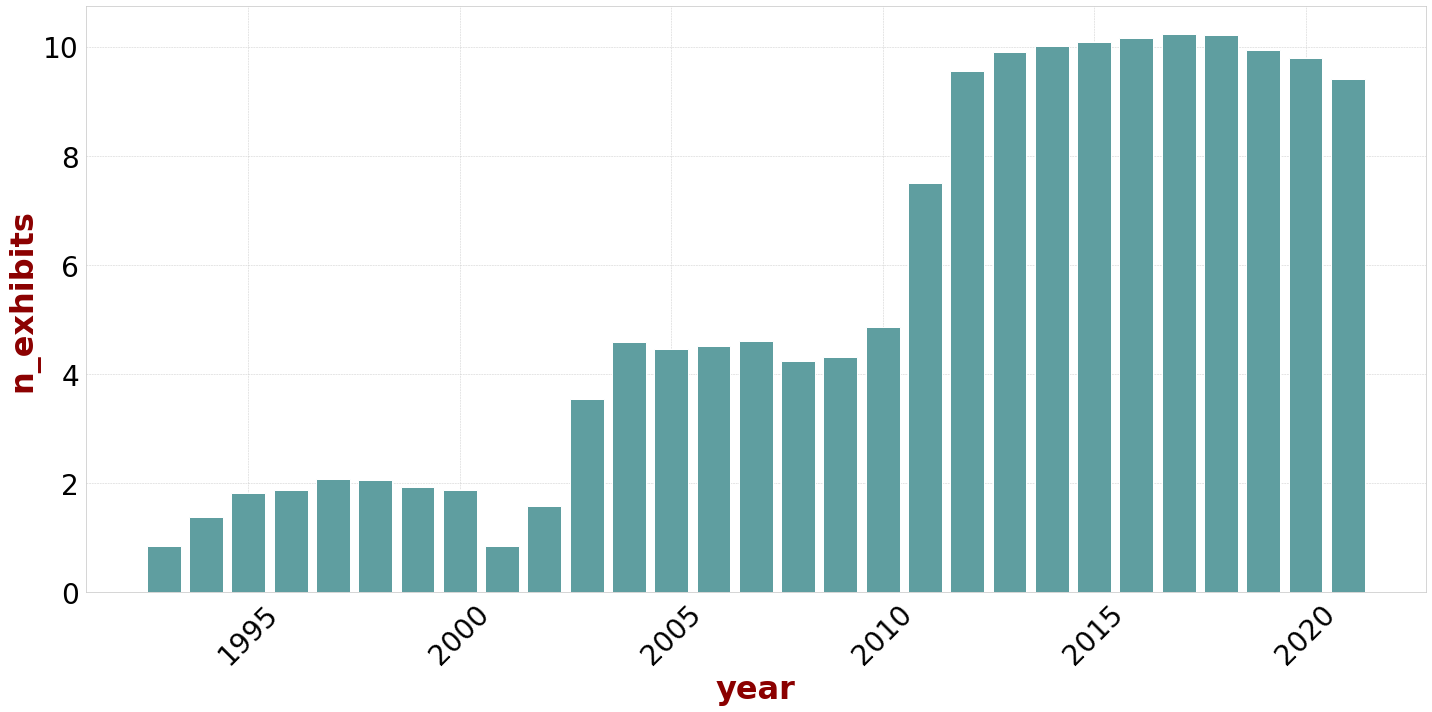

In [30]:
# cols = {'ffind': 'count', 
#         'n_words': 'mean',
#         'n_unique': 'mean',
#         'n_negative': 'mean',
#        'n_positive': 'mean',
#         'n_uncertain': 'mean',
#         'n_litigious': 'mean',
#         'n_strongmodal': 'mean',
#        'n_weakmodal': 'mean',
#         'n_constraining': 'mean',
#         'n_negation': 'mean',
#         'grossfilesize': 'mean',
#        'netfilesize': 'mean', 
#         'nontextdoctypechars': 'mean',
#         'html_chars': 'mean',
#         'xbrl_chars': 'mean',
#        'xml_chars': 'mean',
#         'n_exhibits': 'mean'}
cols = {'ffind': 'count', 
        'n_words': 'mean',
        'n_unique_words': 'mean',
        'n_negative': 'mean',
       'n_positive': 'mean',
        'n_uncertainty': 'mean',
        'n_litigious': 'mean',
        'n_strongmodal': 'mean',
       'n_weakmodal': 'mean',
        'n_constraining': 'mean',
        'n_negation': 'mean',
        'grossfilesize': 'mean',
       'netfilesize': 'mean', 
        'nontextdoctypechars': 'mean',
        'htmlchars': 'mean',
        'xbrlchars': 'mean',
       'xmlchars': 'mean',
        'n_exhibits': 'mean'}
column_description = { 'n_words': 'Number of words', 'grossfilesize':'Gross File size','n_unique_words':'Number of unique words' }
gk = k_data.groupby(['year']).agg(cols).reset_index()
gq = q_data.groupby(['year']).agg(cols).reset_index()

for col in gk.columns:
    if col == 'year':
        continue
    else:
        plot_utils(gk, 'year', col, column_description)
        plot_utils(gq, 'year', col, column_description)

In [31]:
data.columns

Index(['cik', 'filing_date', 'acc_num', 'cpr', 'form_type', 'coname', 'sic',
       'ffind', 'n_words', 'n_unique_words', 'n_negative', 'n_positive',
       'n_uncertainty', 'n_litigious', 'n_strongmodal', 'n_weakmodal',
       'n_constraining', 'n_negation', 'grossfilesize', 'netfilesize',
       'nontextdoctypechars', 'htmlchars', 'xbrlchars', 'xmlchars',
       'n_exhibits', 'industry', 'year'],
      dtype='object')

<ipython-input-37-3f27c2af0cea>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_data['ffind'] = k_data['ffind'].astype(str)
<ipython-input-37-3f27c2af0cea>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_data['ffind'] = q_data['ffind'].astype(str)


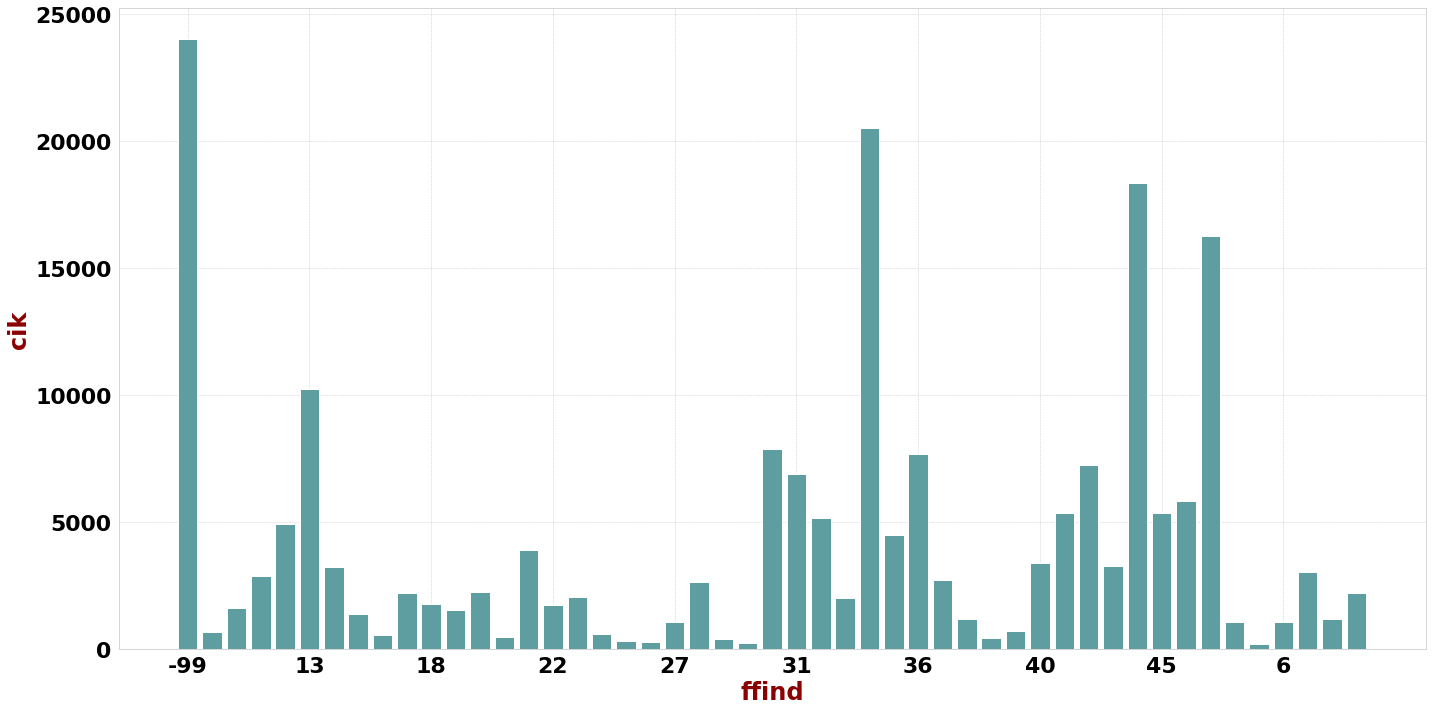

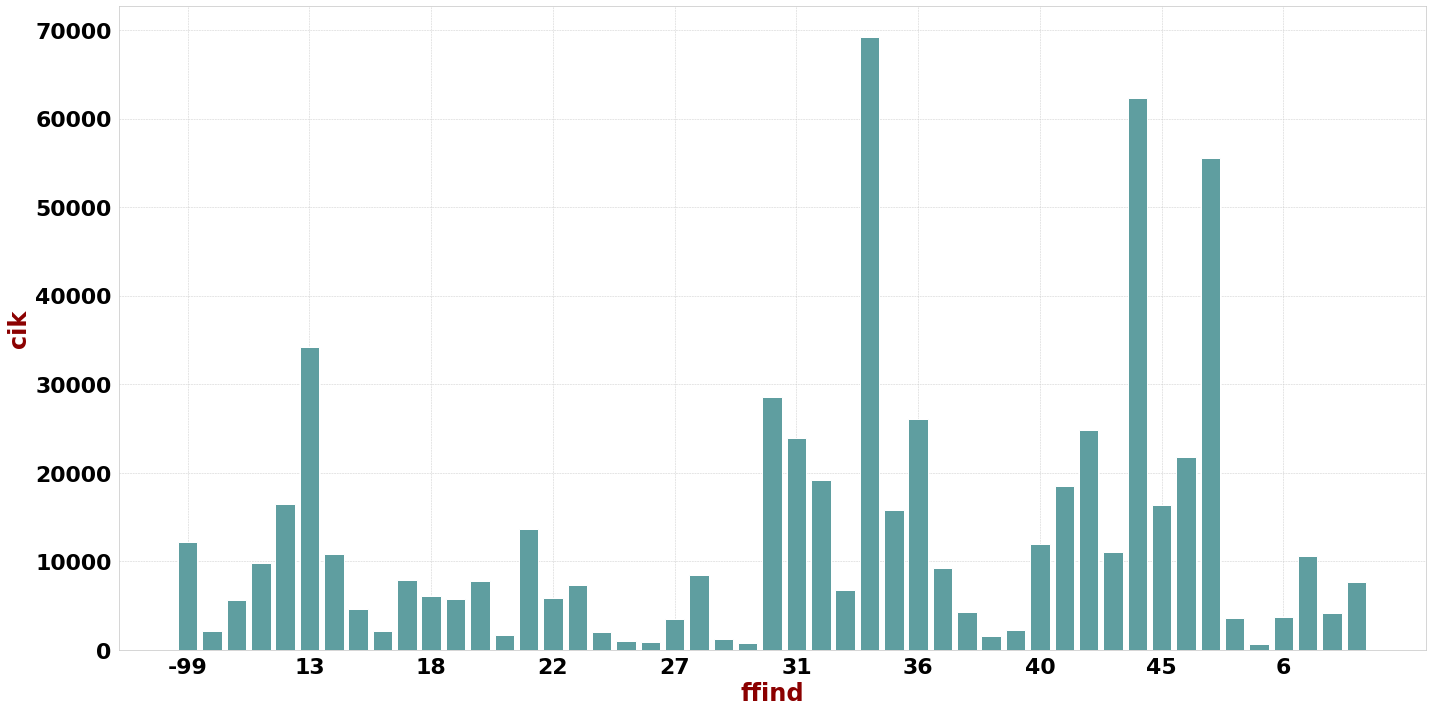

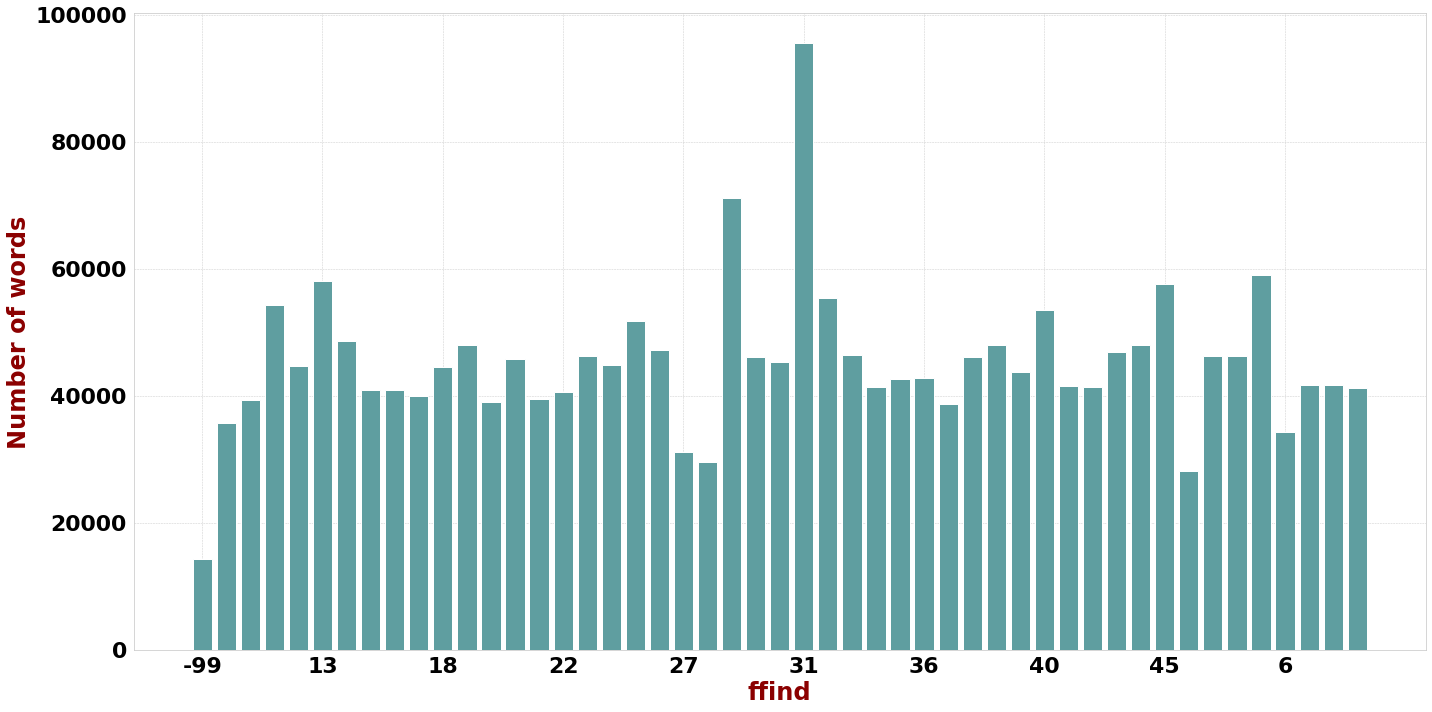

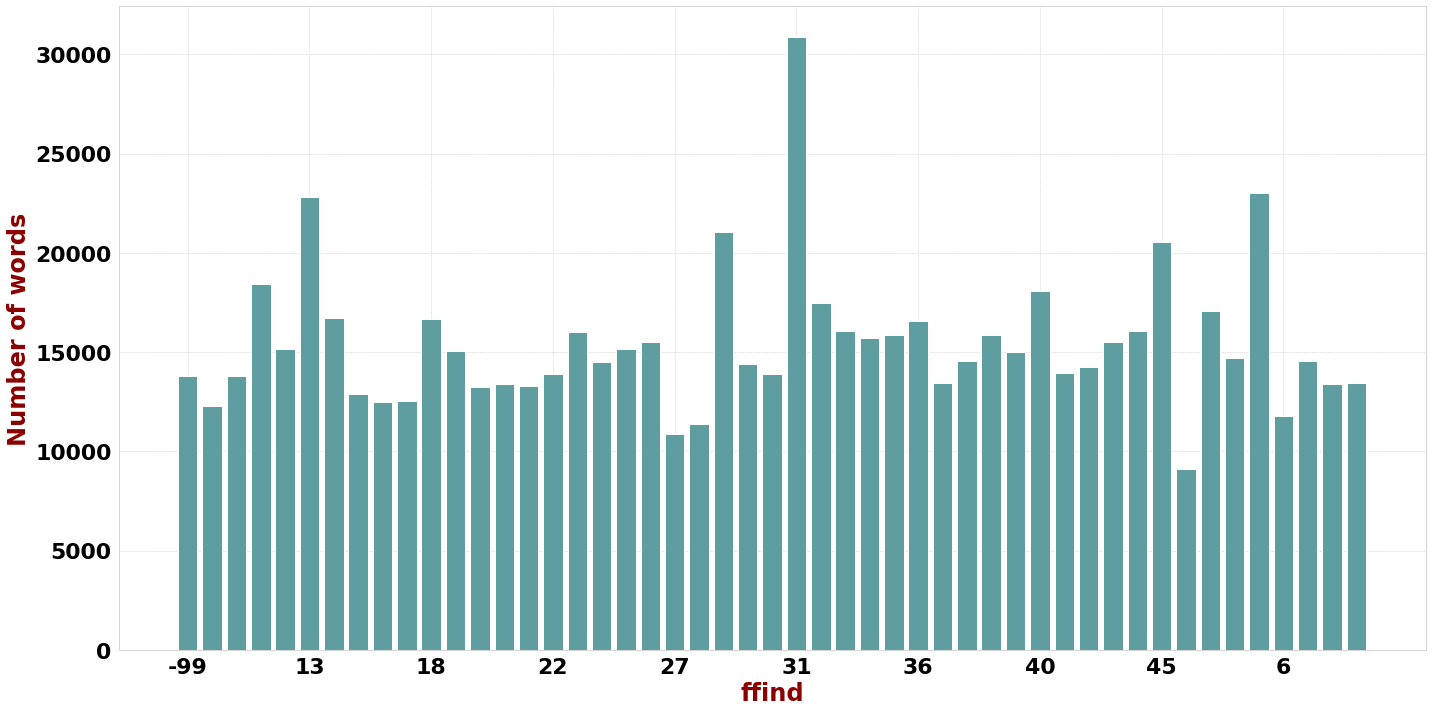

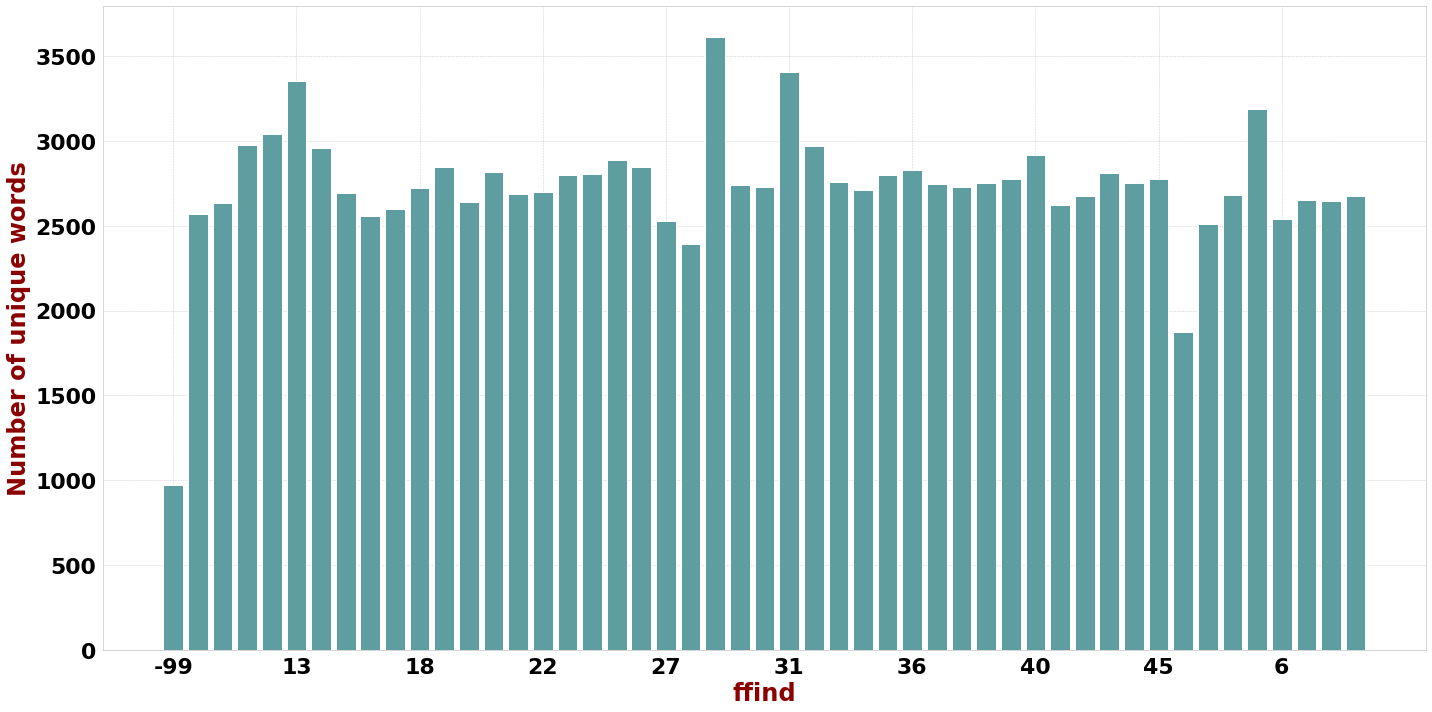

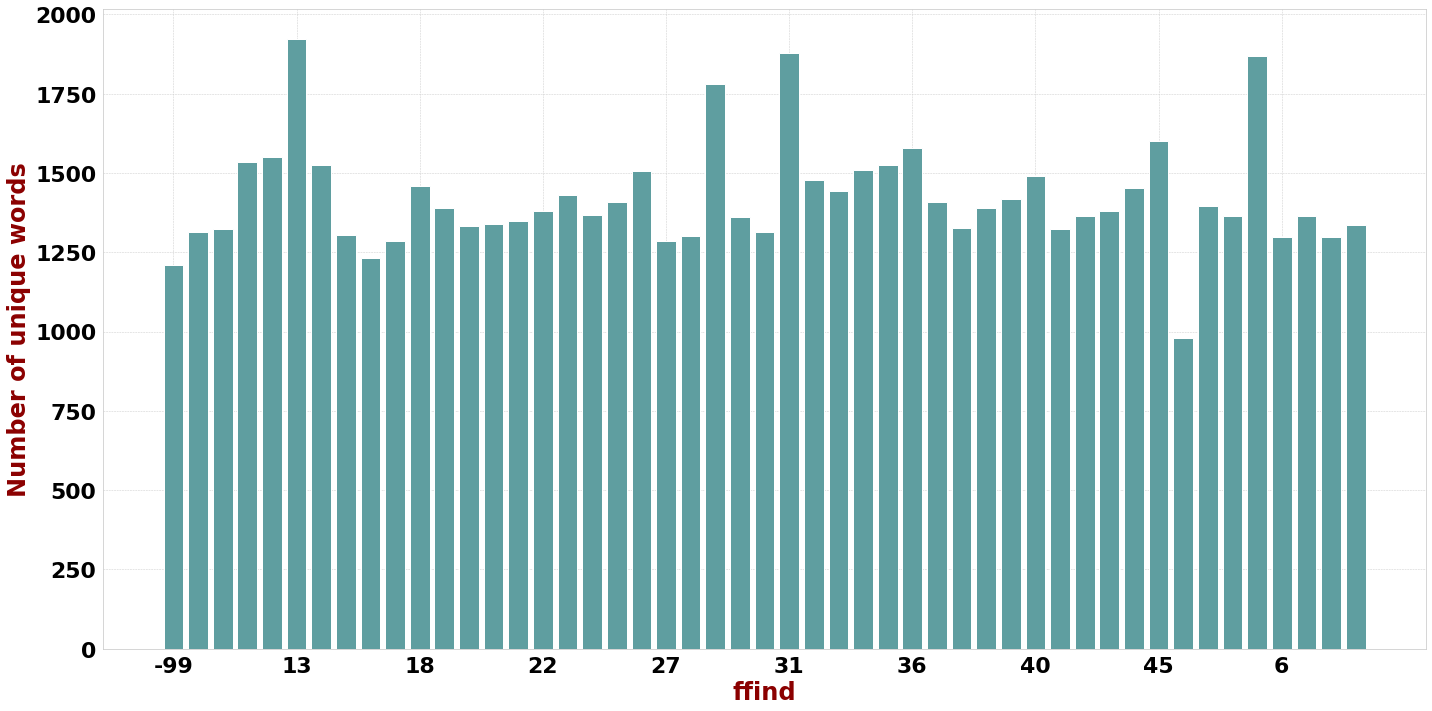

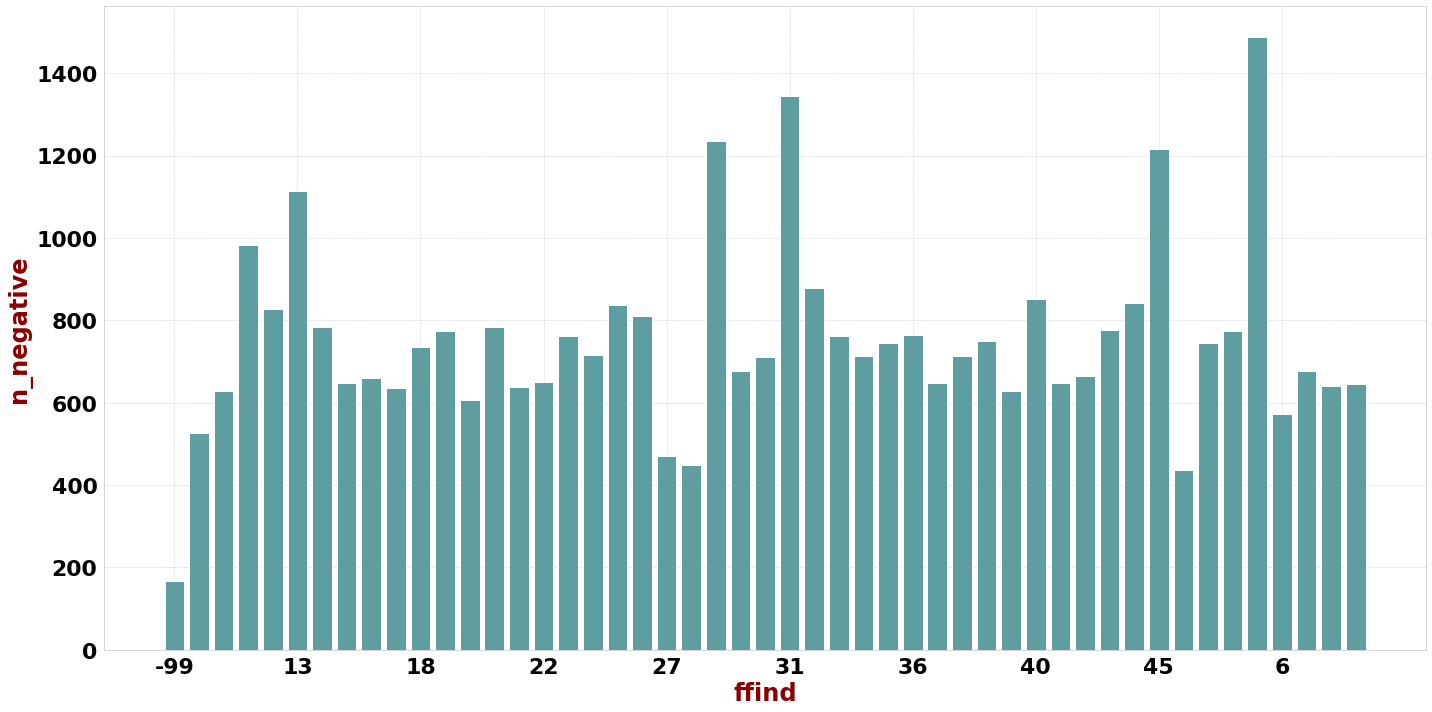

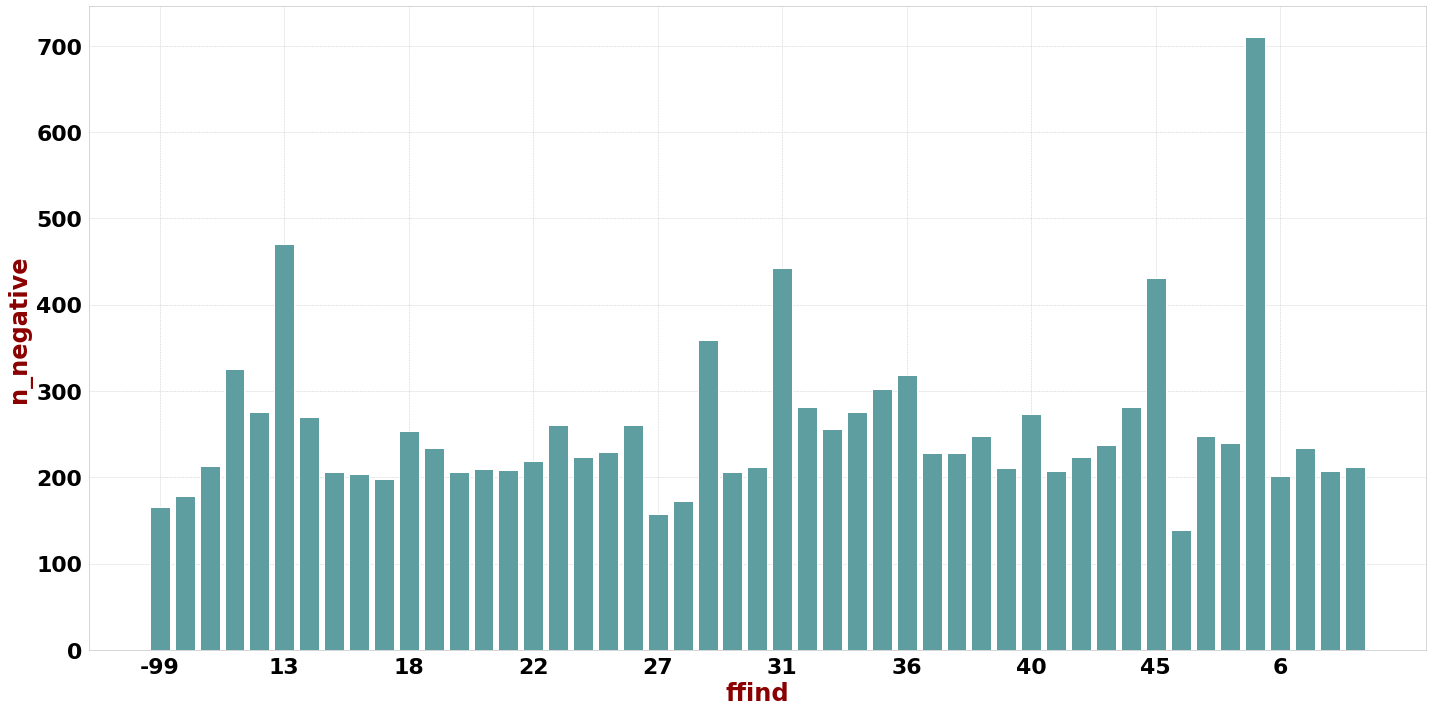

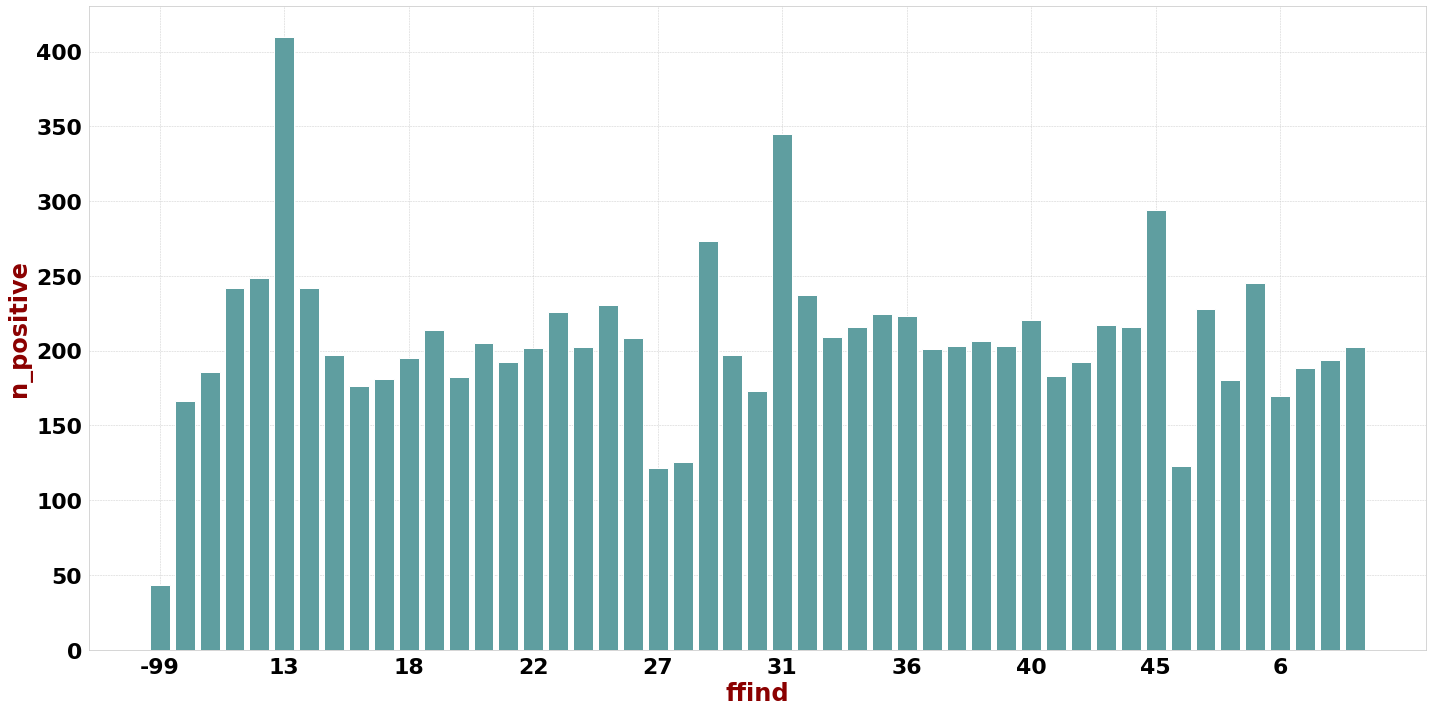

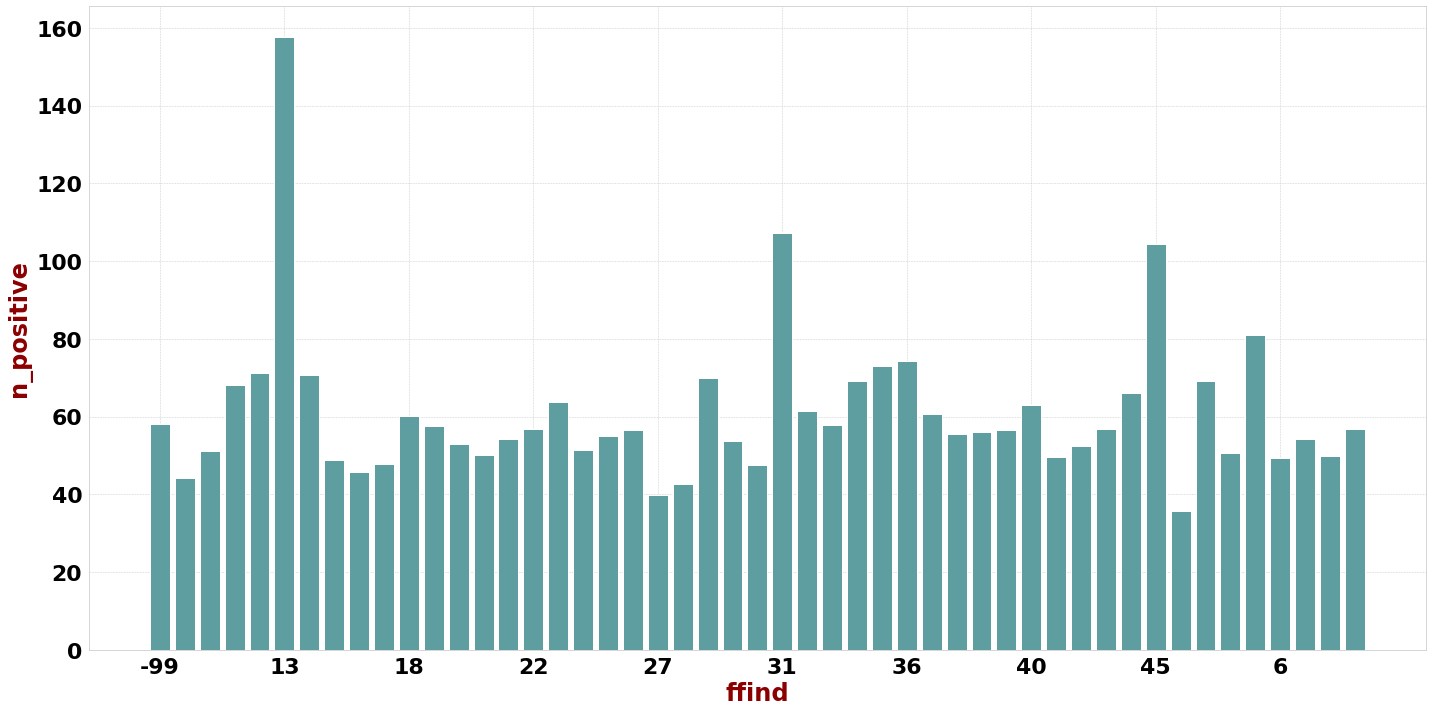

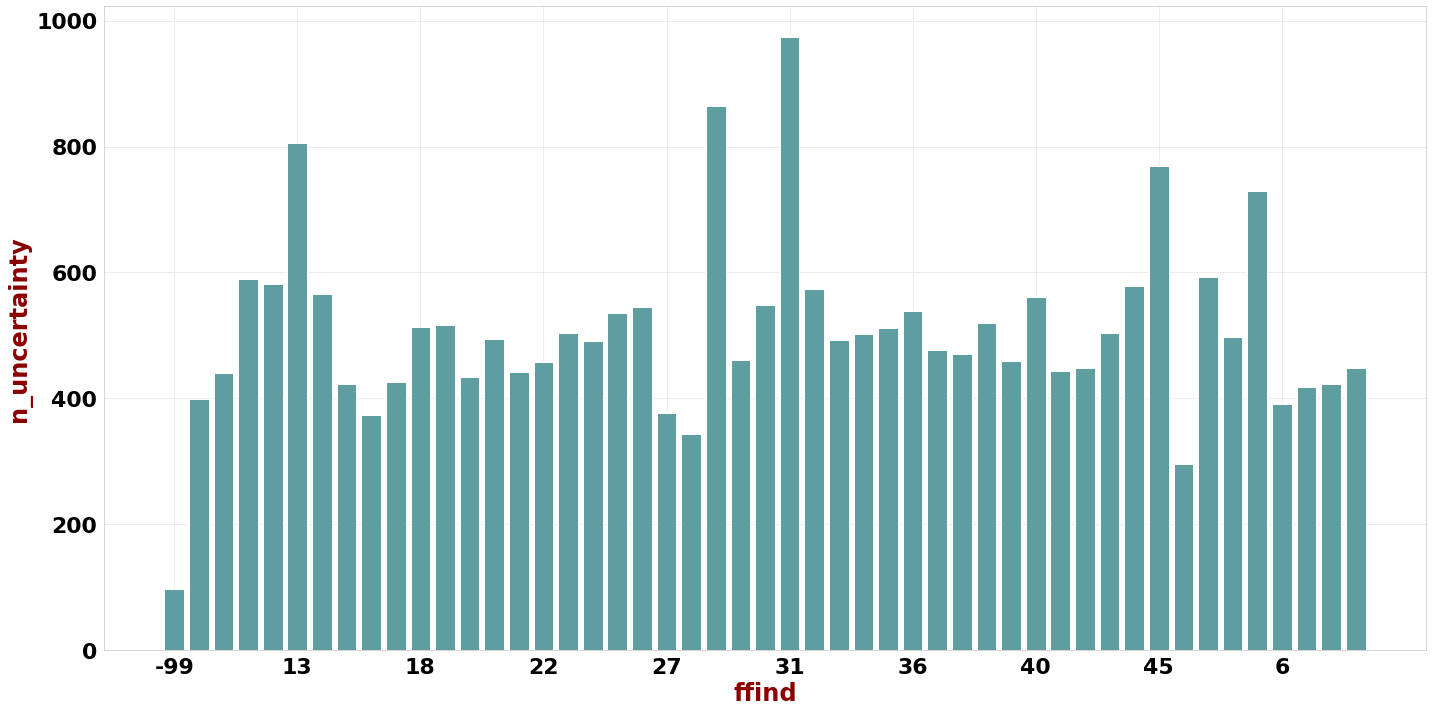

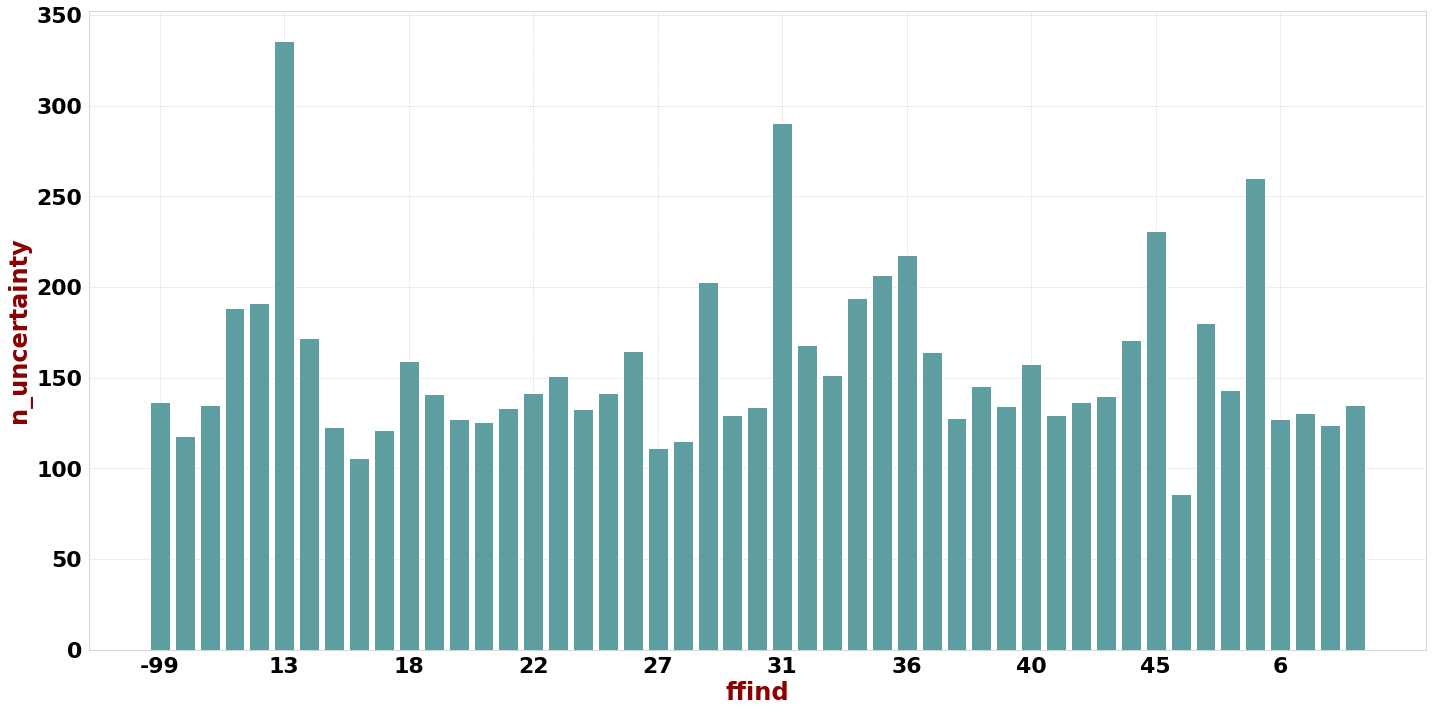

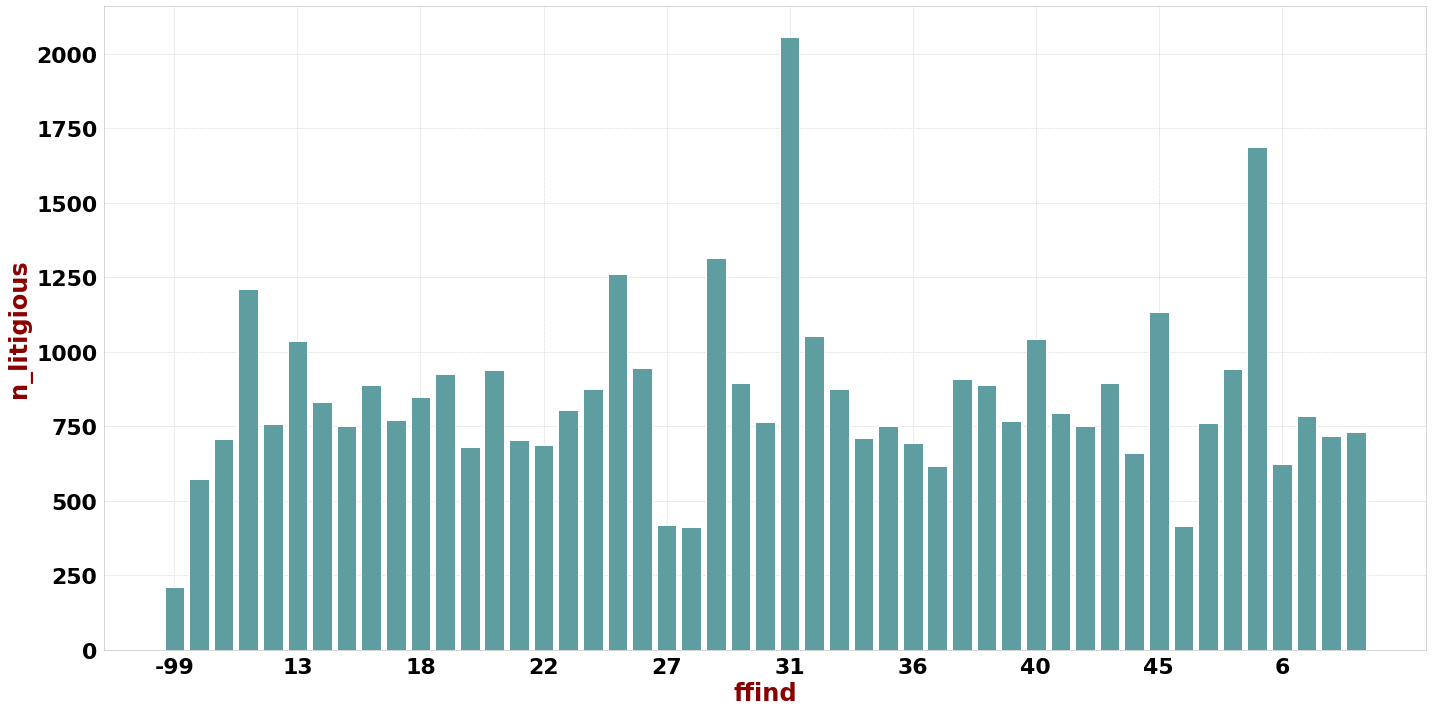

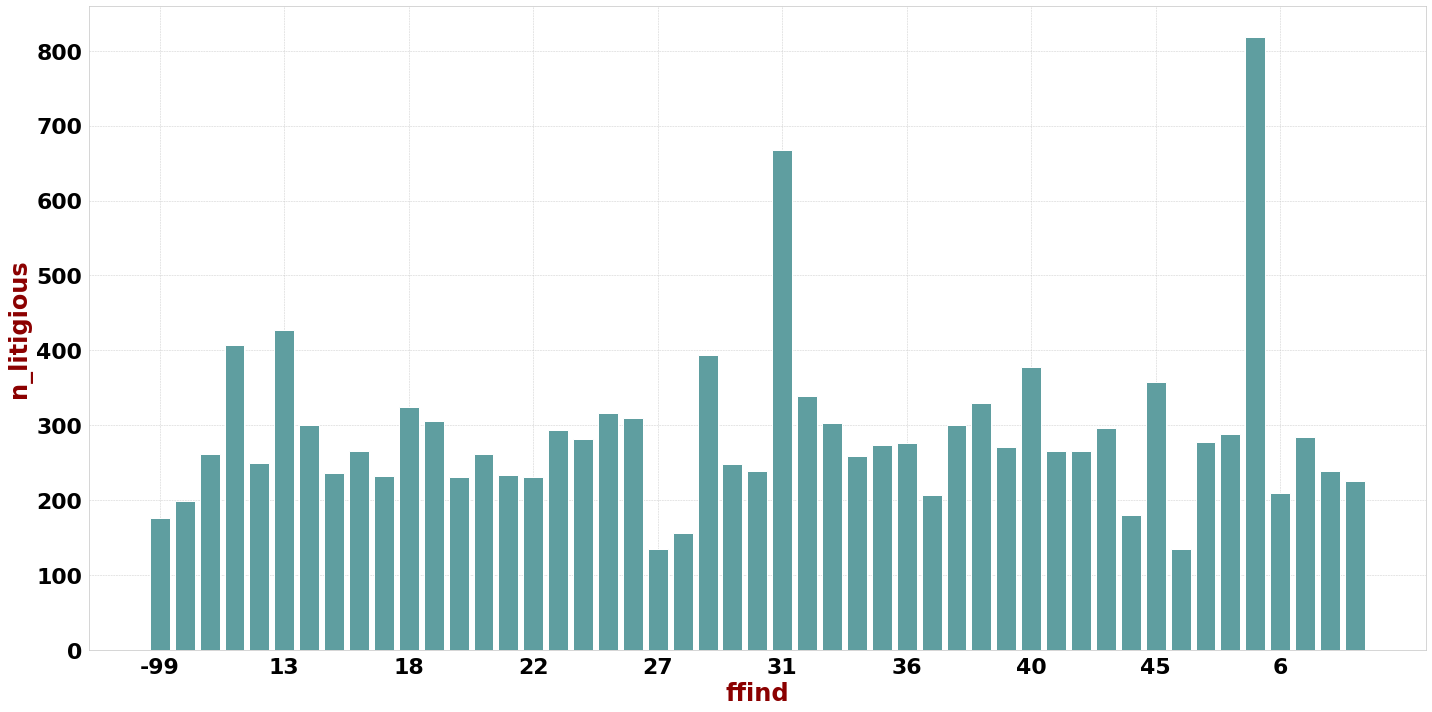

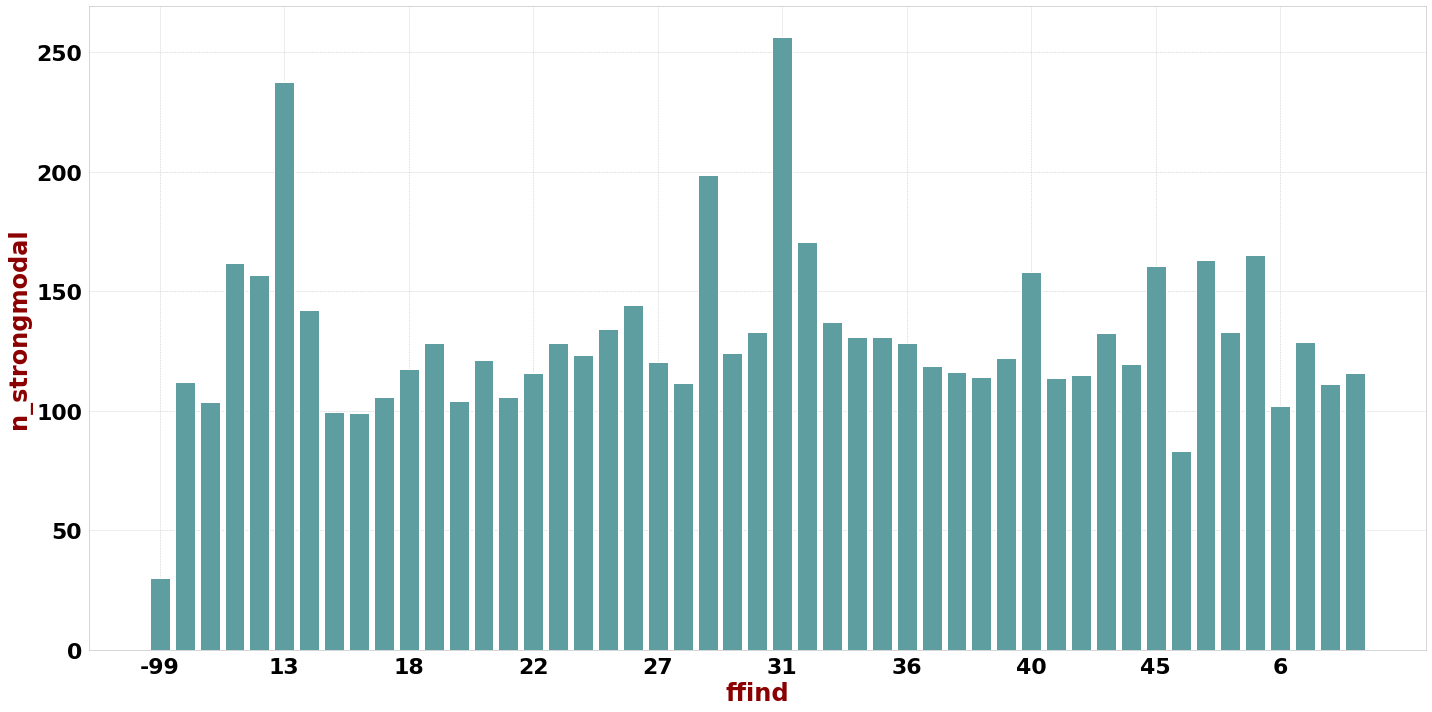

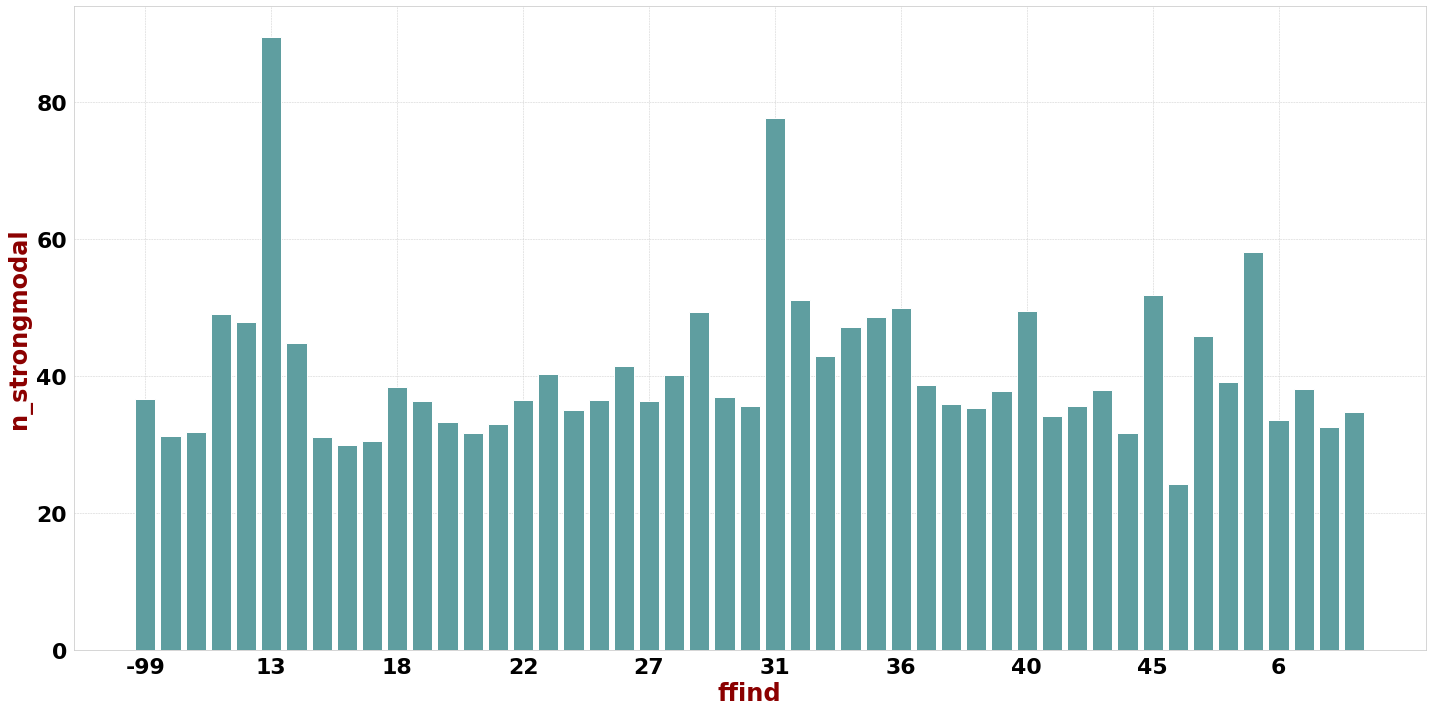

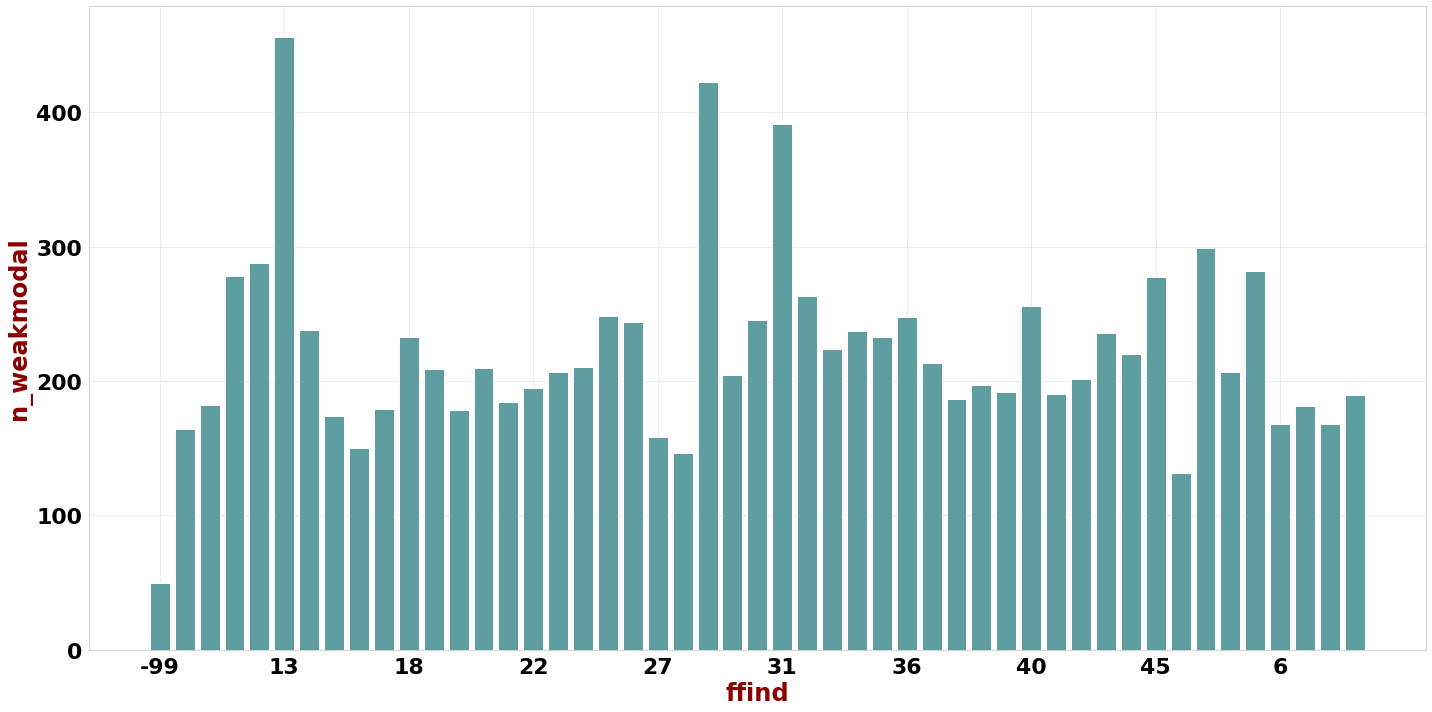

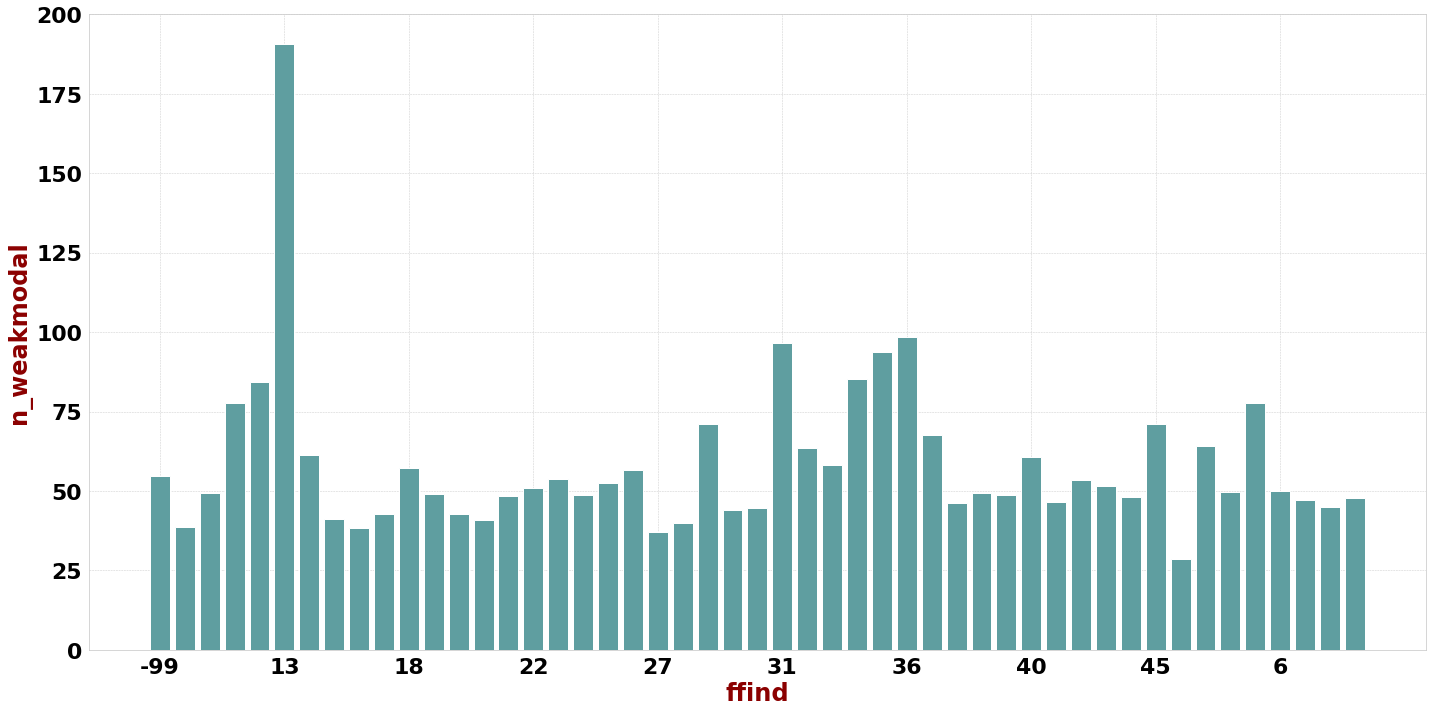

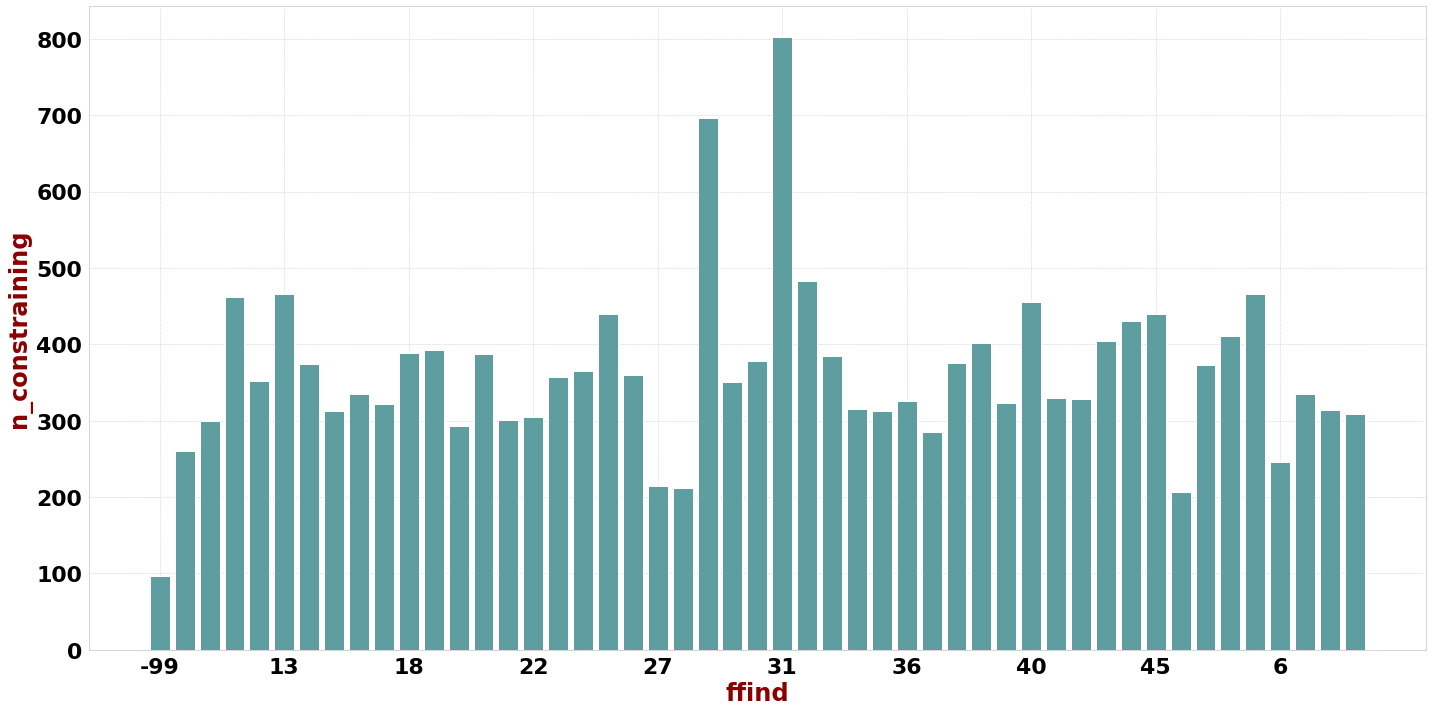

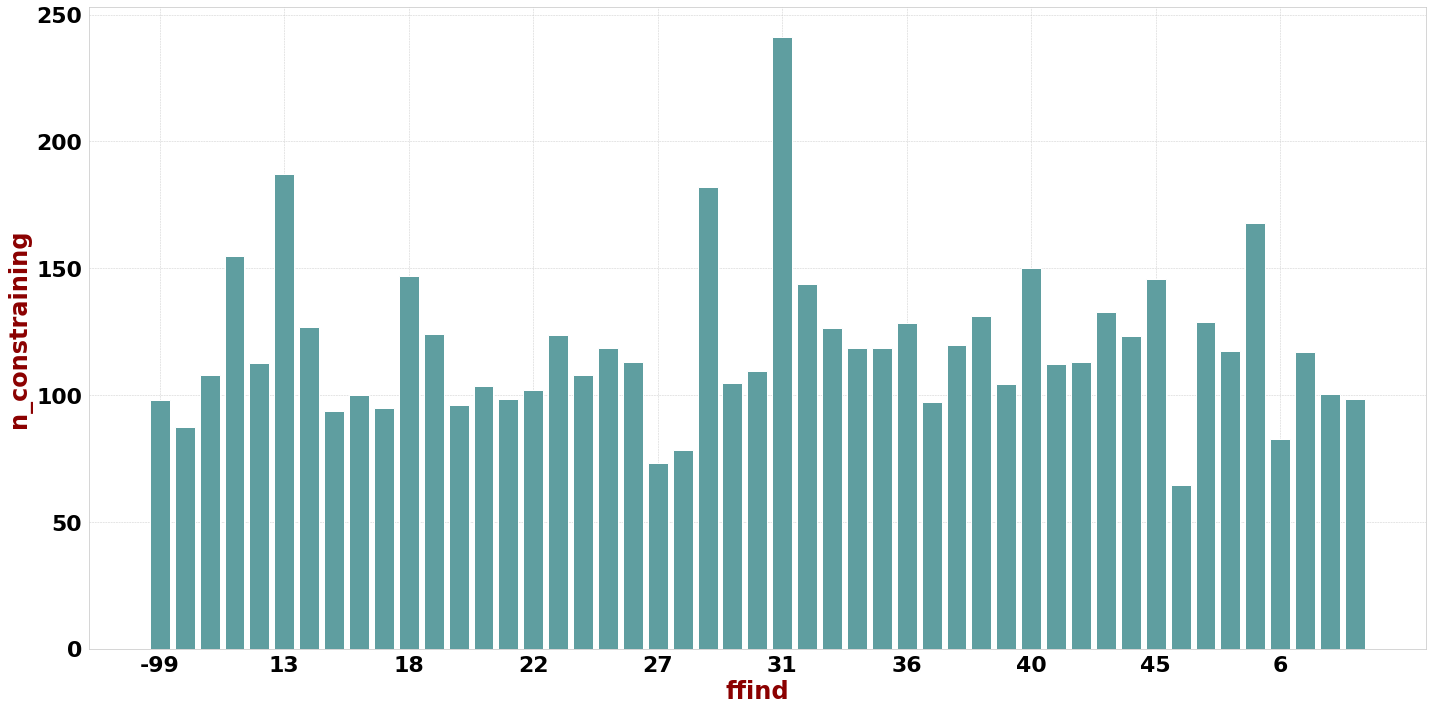

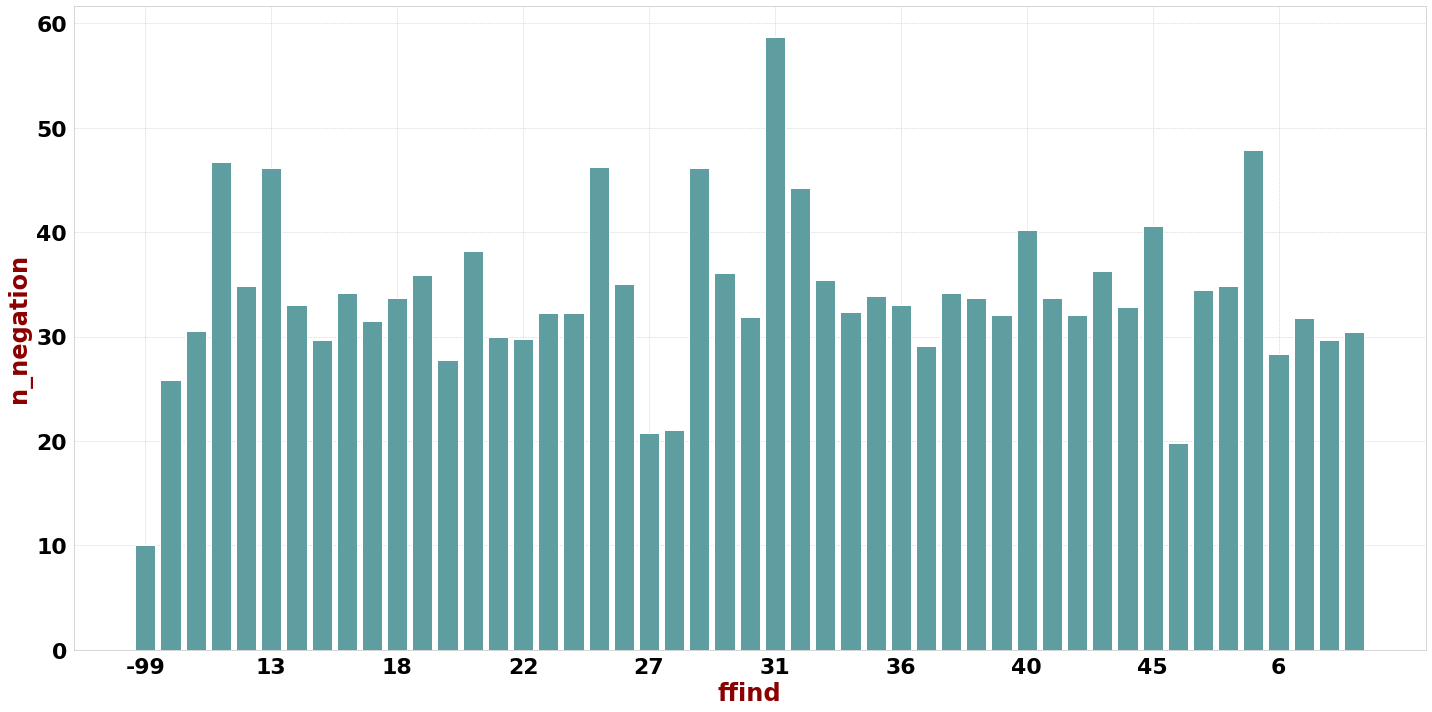

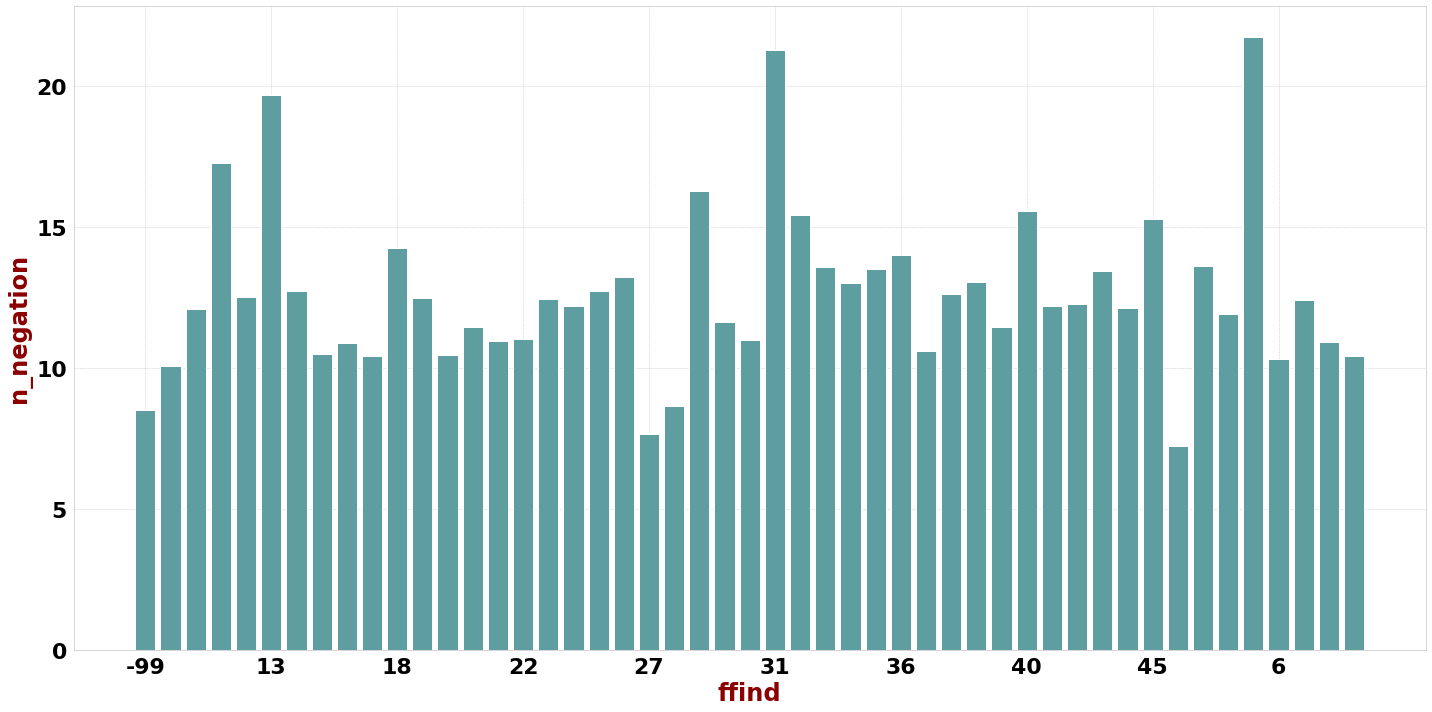

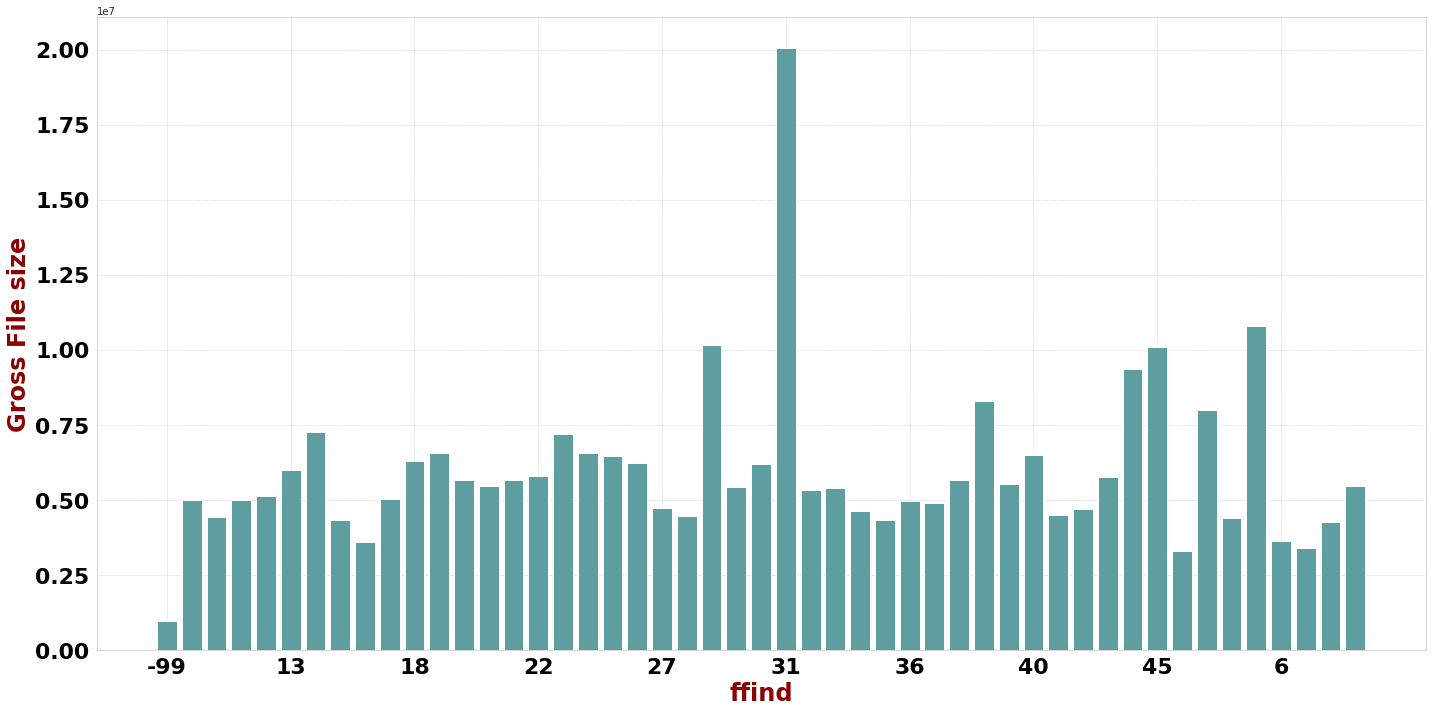

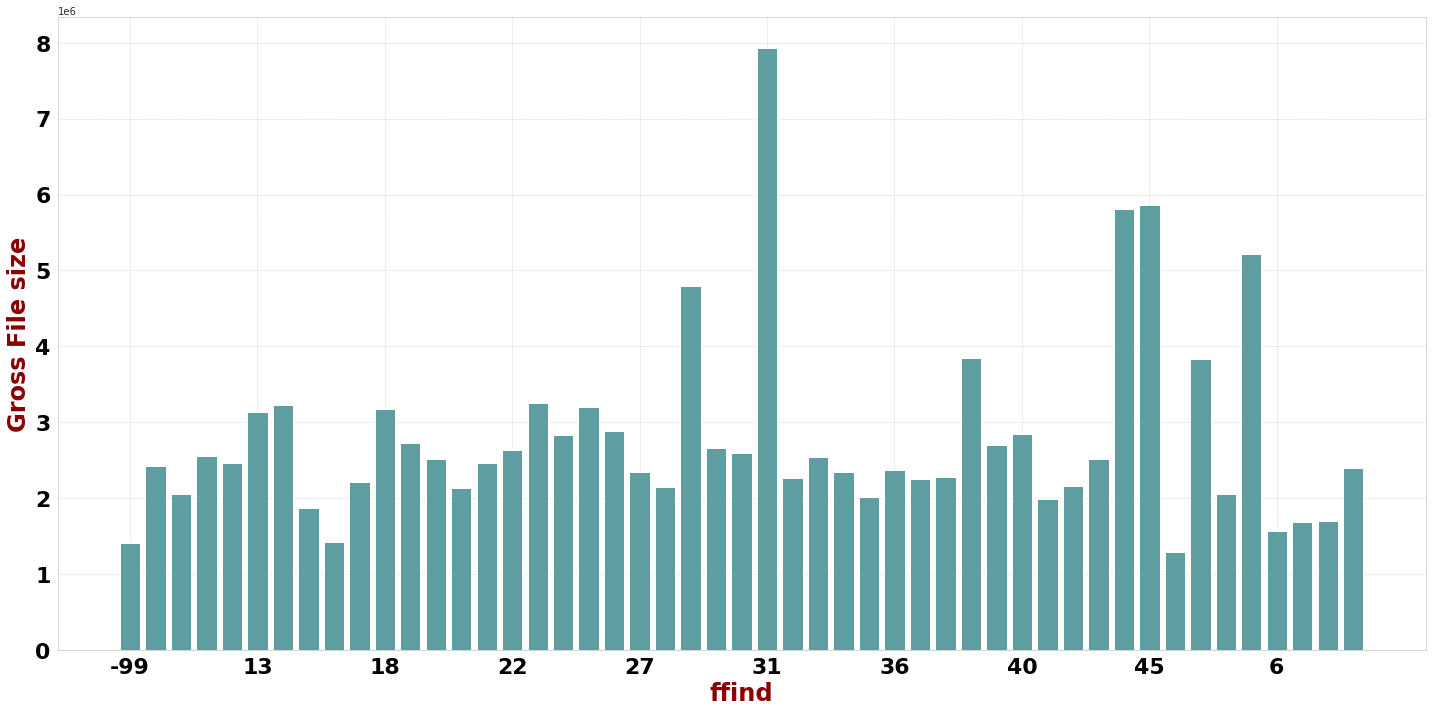

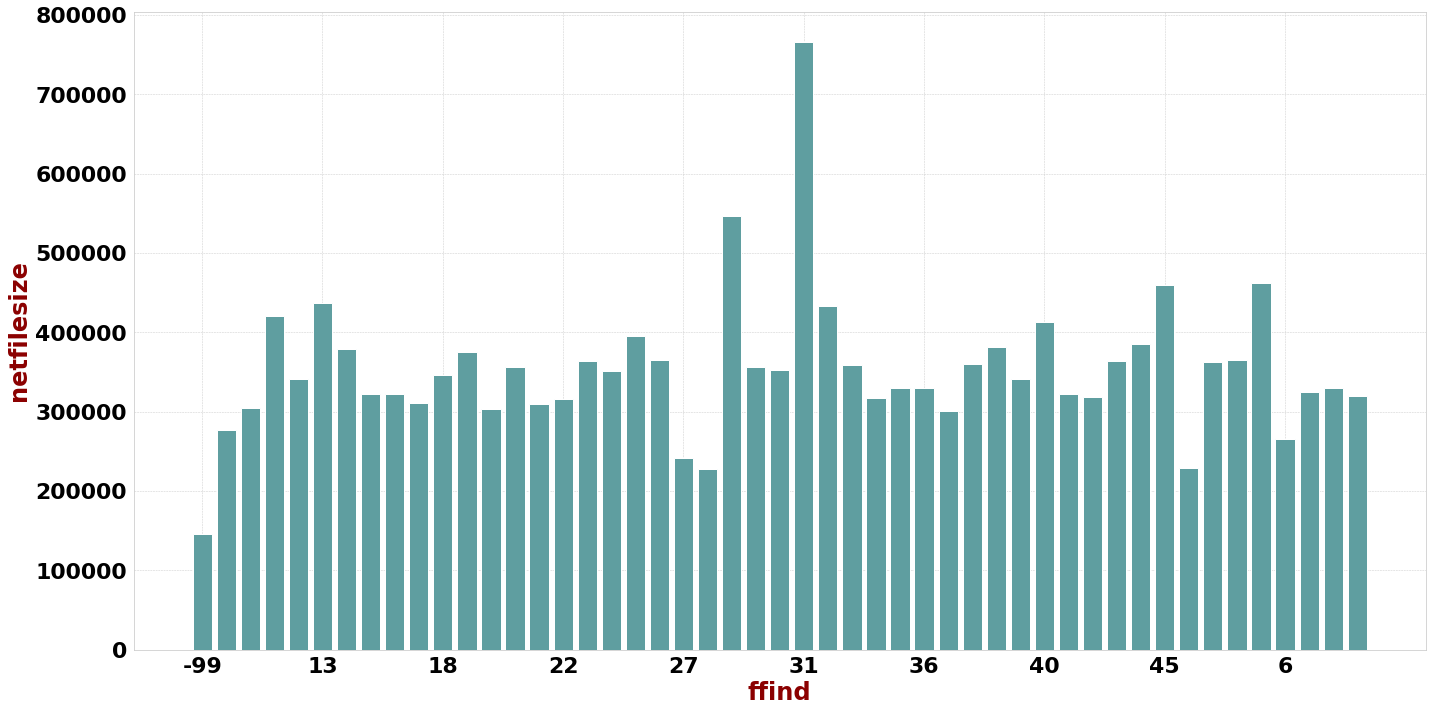

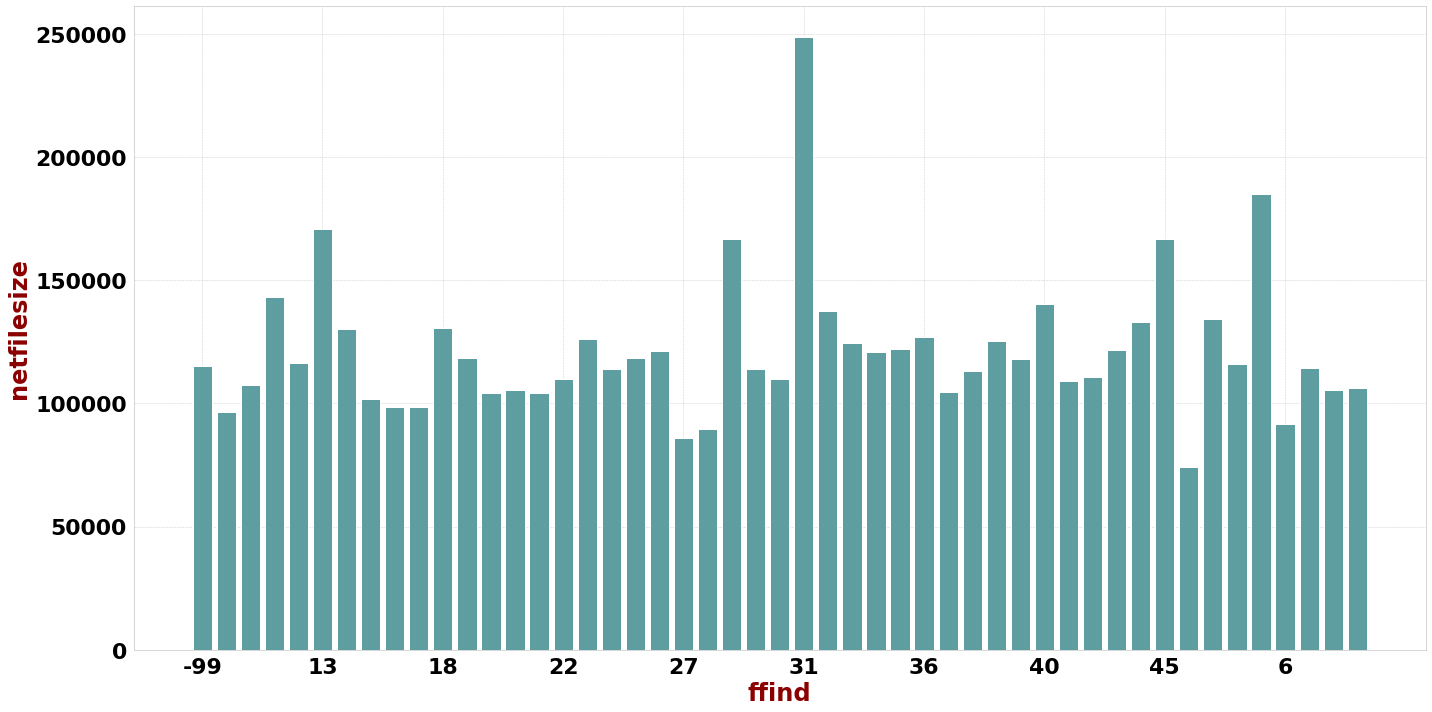

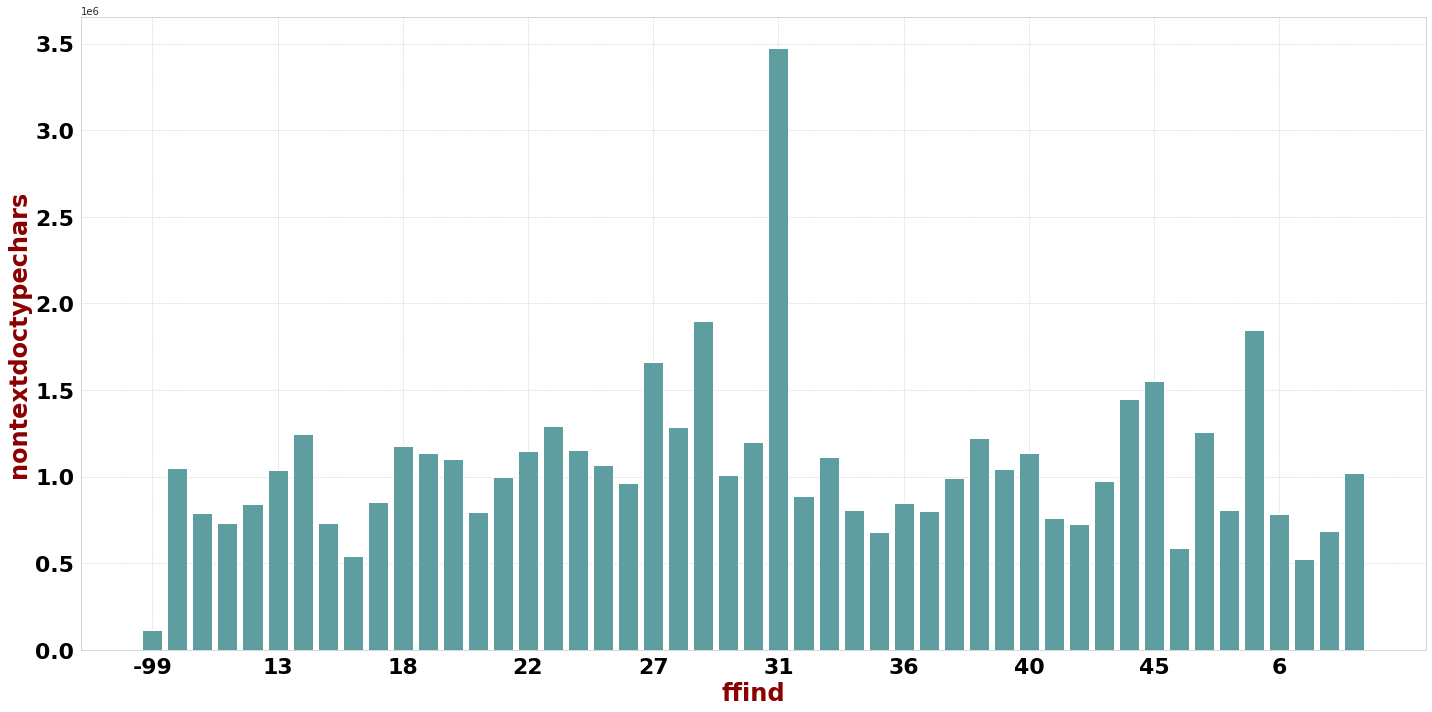

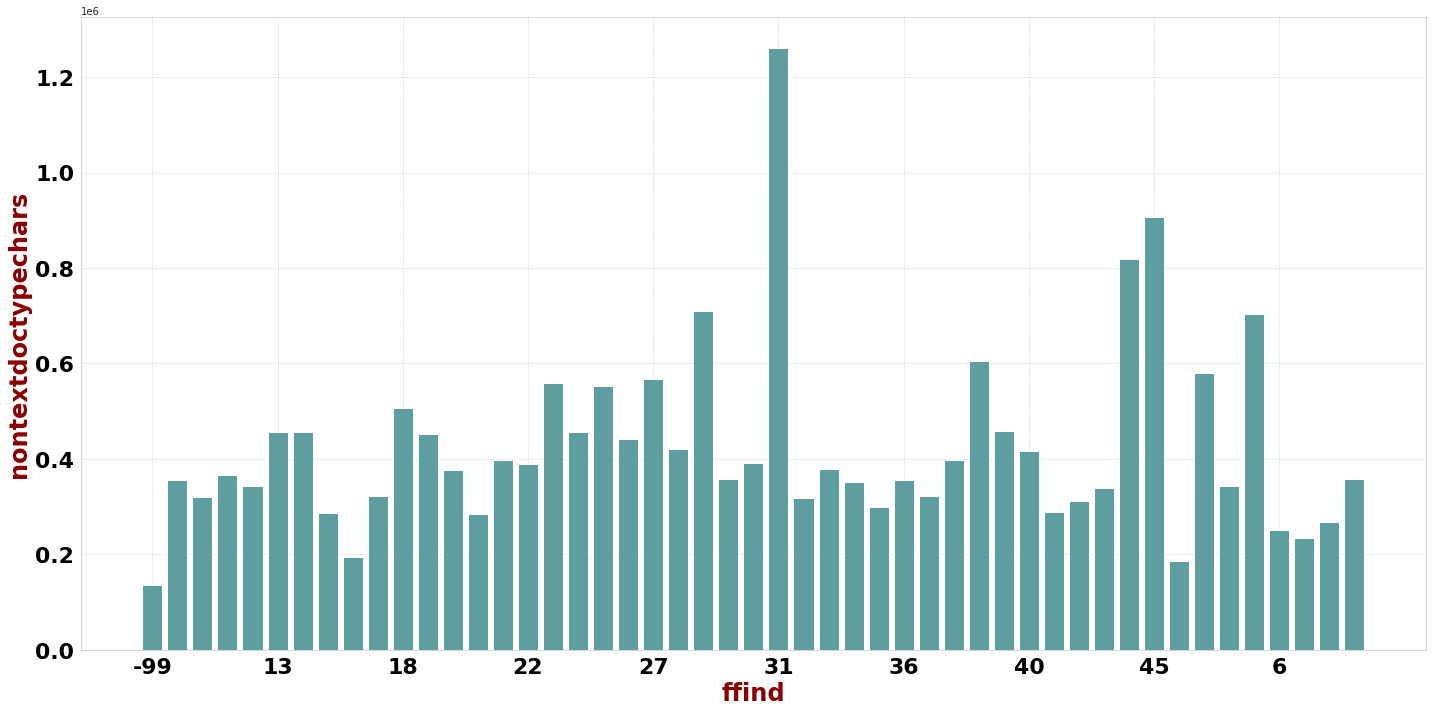

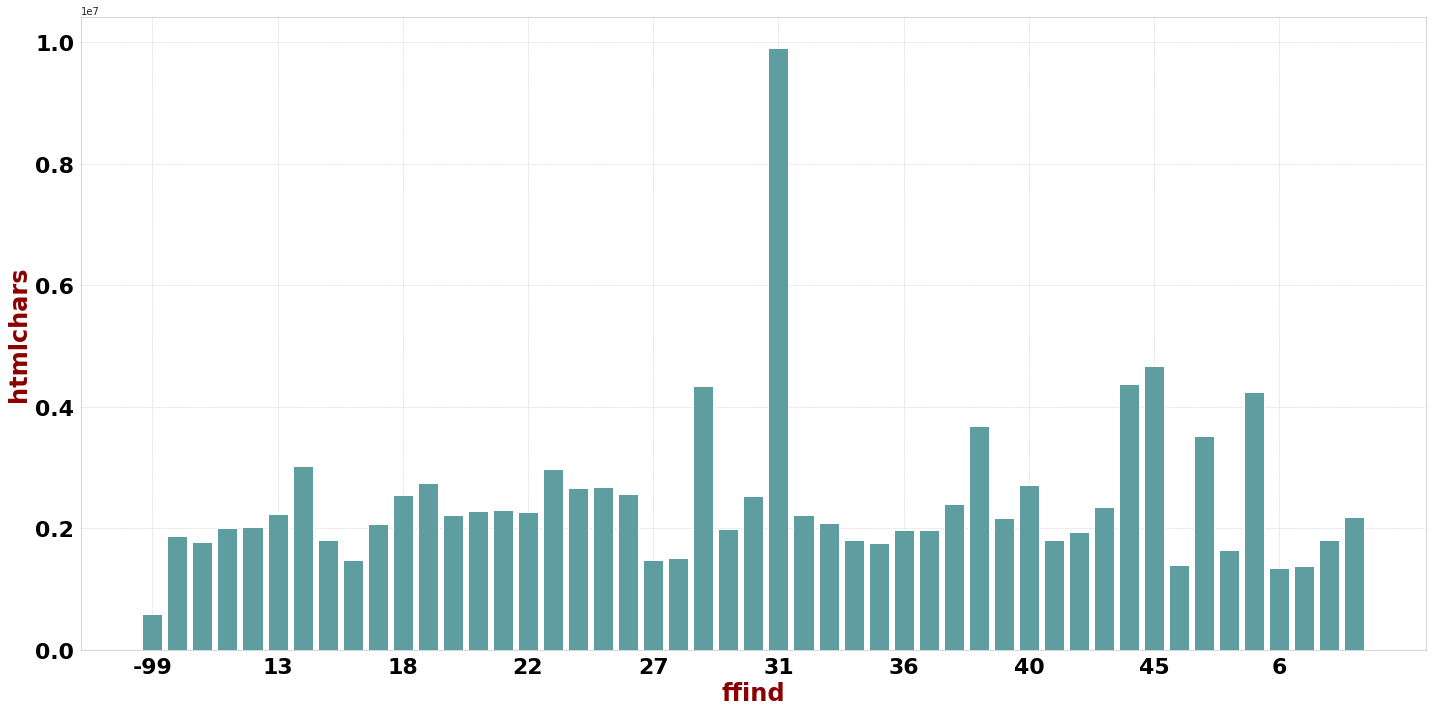

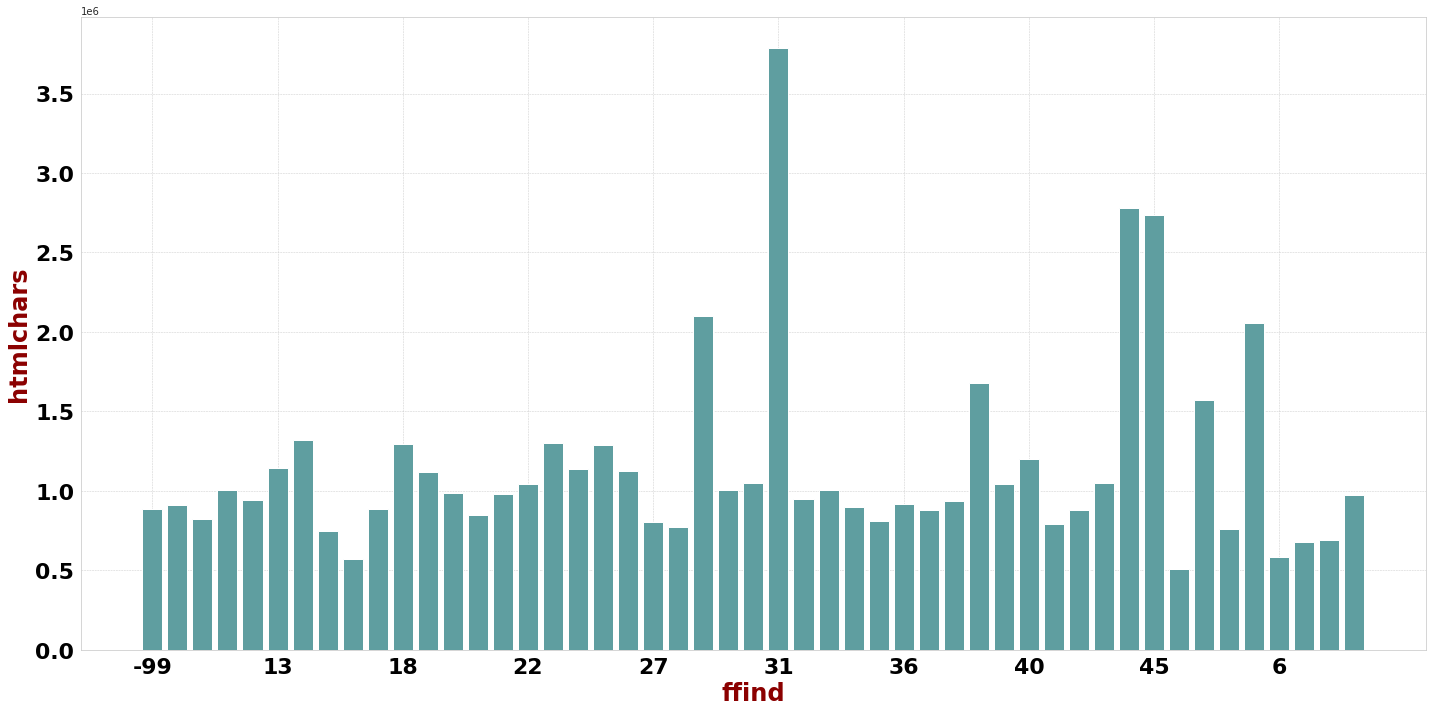

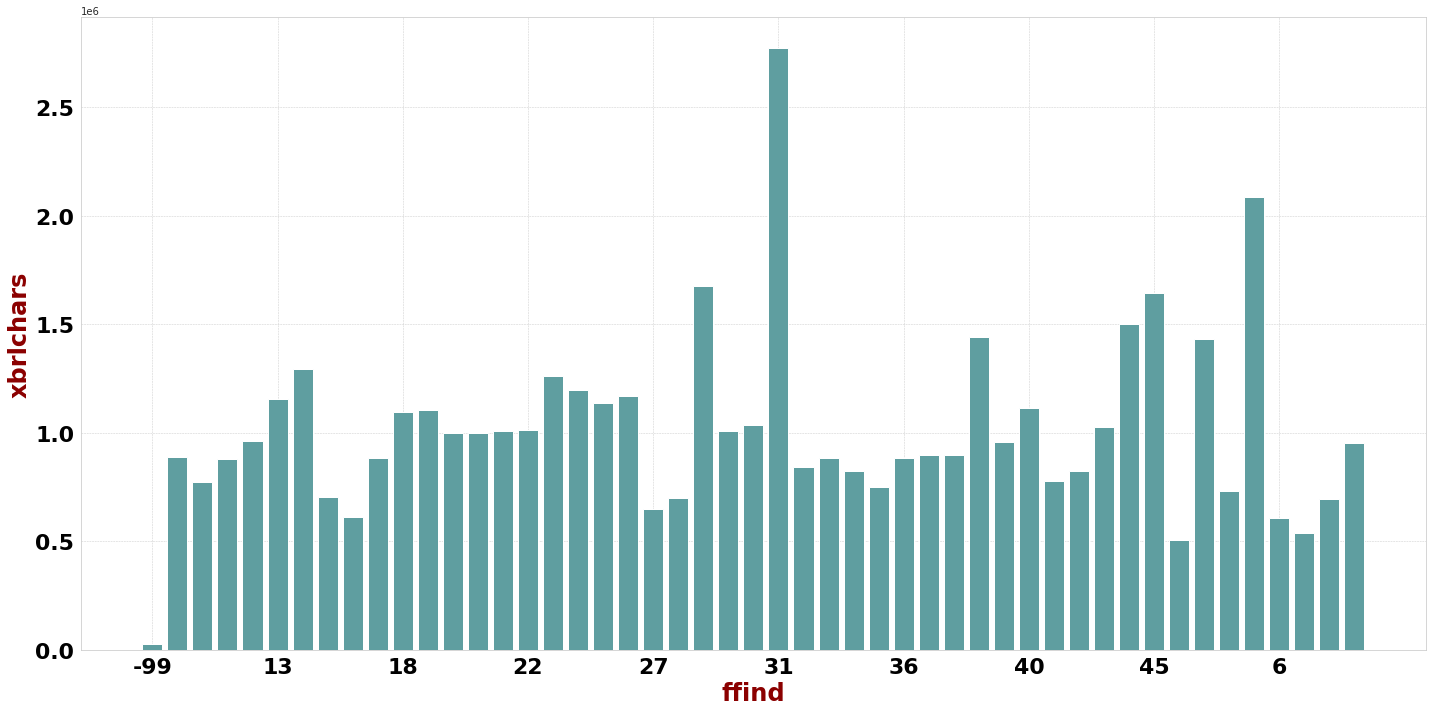

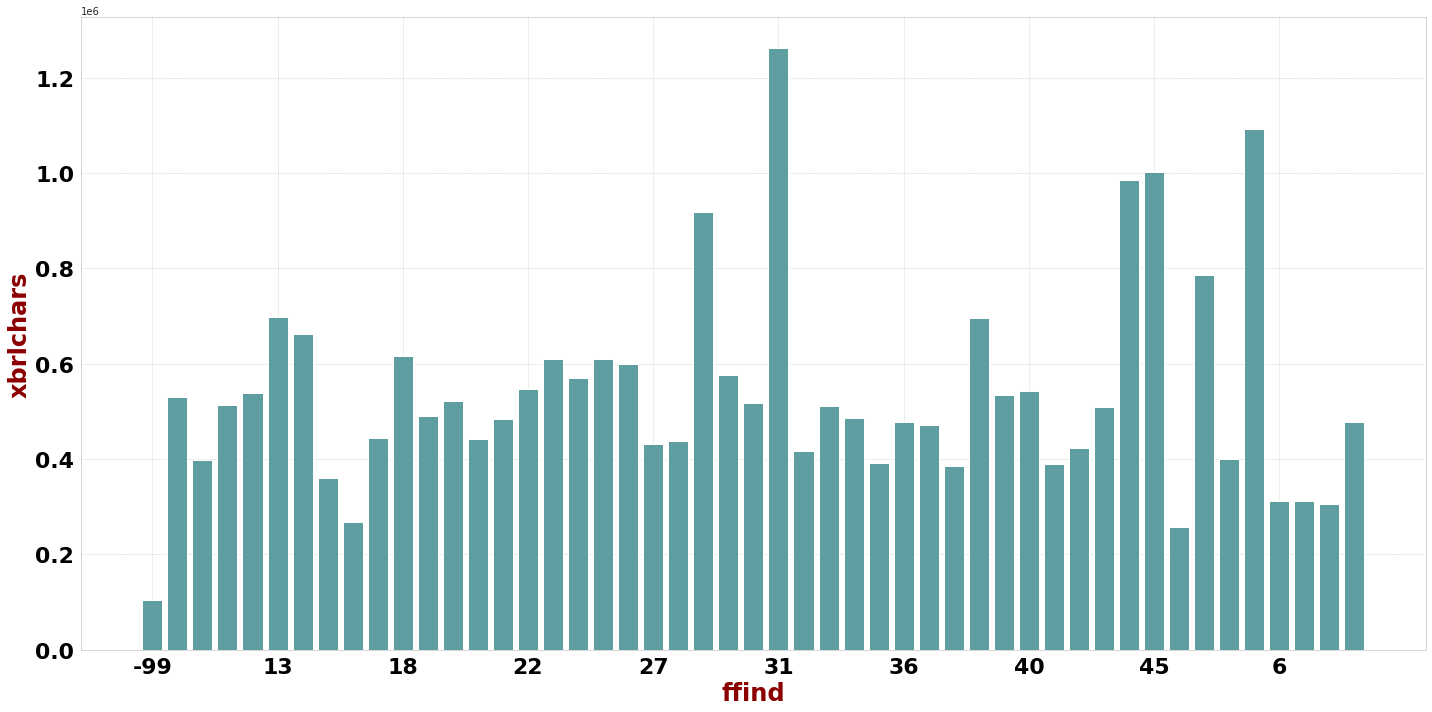

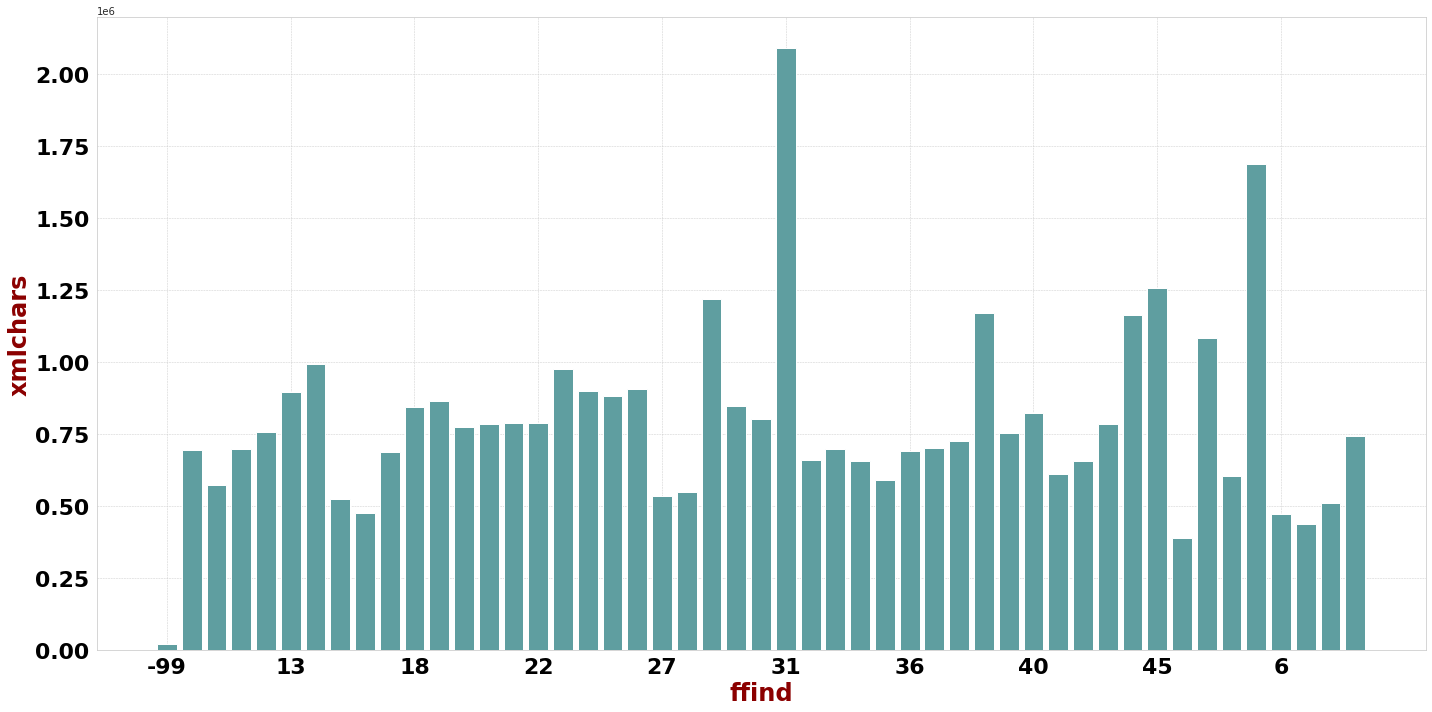

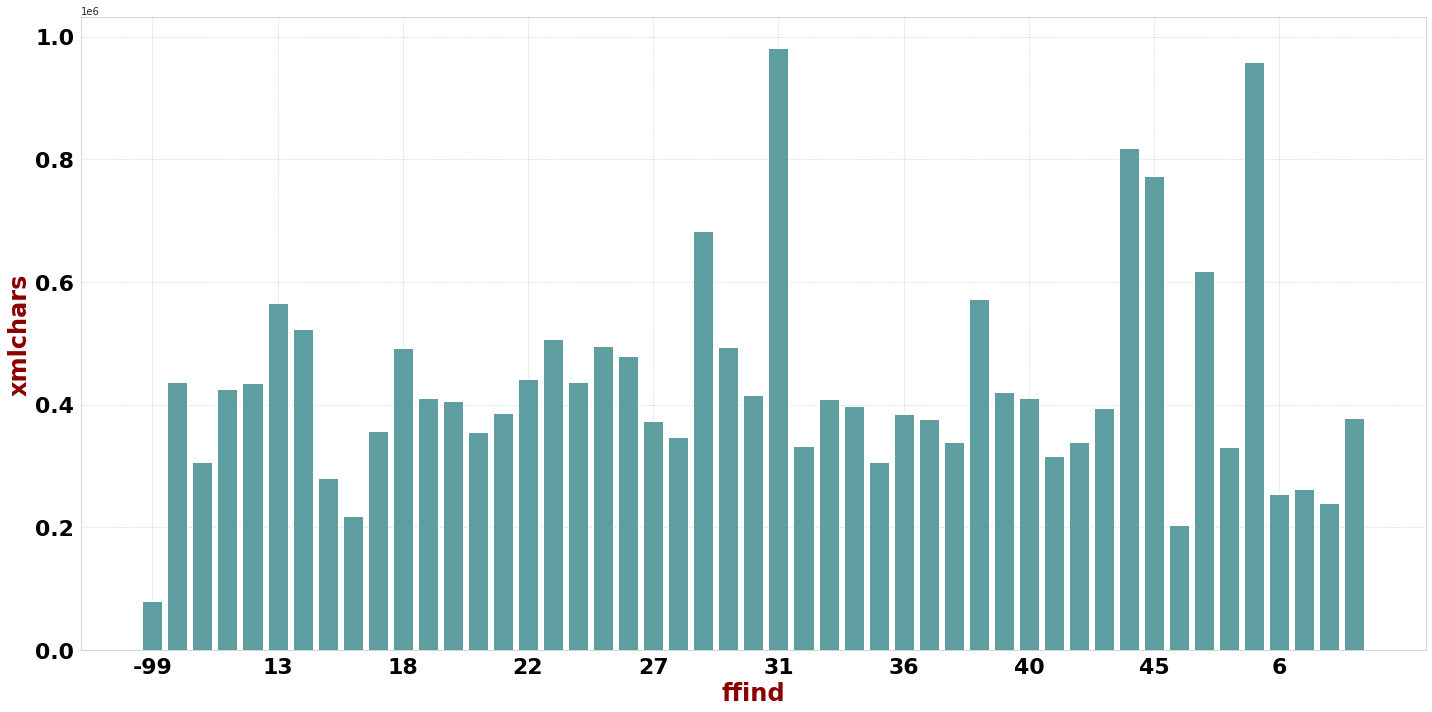

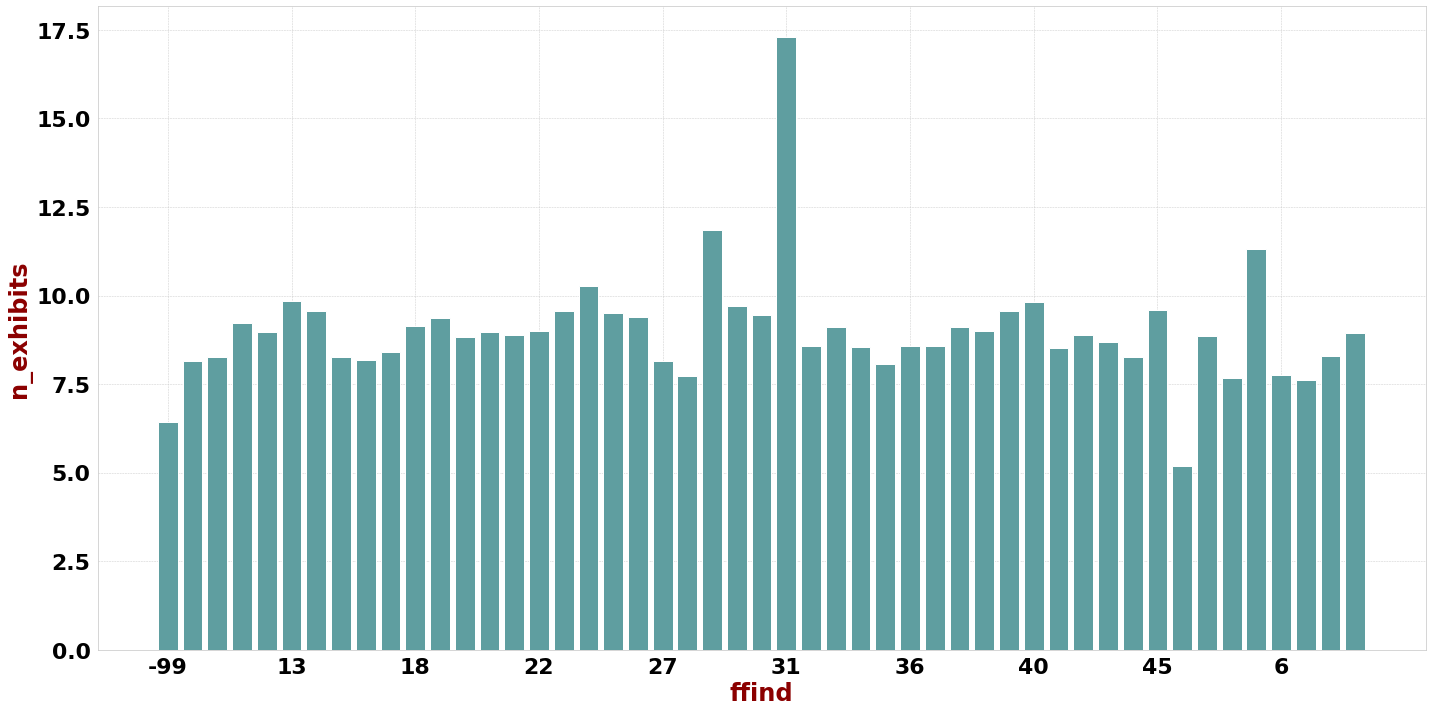

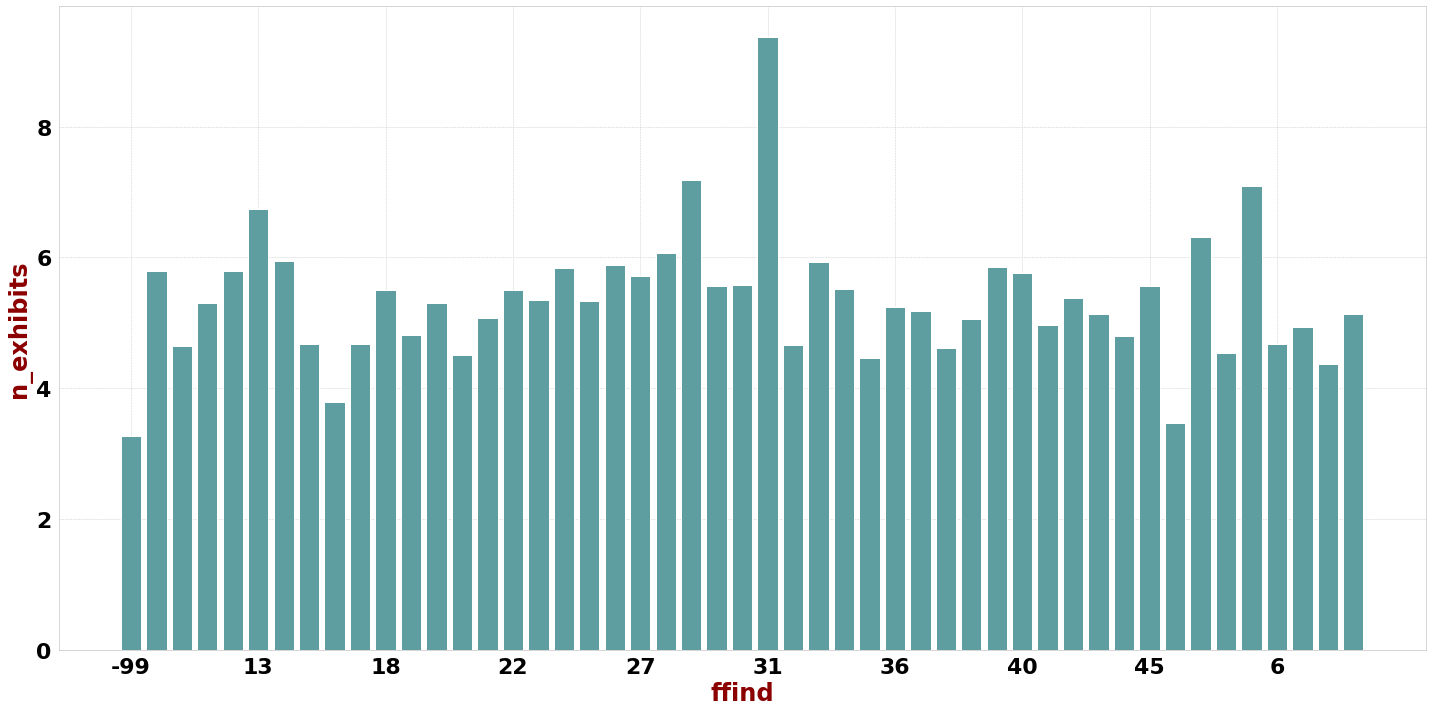

In [37]:
def plot_utils(data, x, y, column_description={}):
    # To not do changes to the original data
    data = data.copy(deep=True)

    sns.set_style("whitegrid")

    plt.figure(figsize=(20, 10))
    bars = plt.bar(data[x], data[y], color='cadetblue')

    # Set the font size and weight for ticks
    plt.xticks(fontsize=22, fontweight='bold', color='black', rotation=0)
    plt.yticks(fontsize=22, fontweight='bold', color='black')

    # Display only every 5th label in the x-axis and ensure it doesn't affect the bar chart
    plt.gca().set_xticks(plt.gca().get_xticks()[::5])

    # Stylize xlabel and ylabel
    plt.xlabel(column_description.get(x, x), fontsize=24, fontweight='bold', color='darkred')
    plt.ylabel(column_description.get(y, y), fontsize=24, fontweight='bold', color='darkred')

    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

cols = {'cik': 'count', 
        'n_words': 'mean',
        'n_unique_words': 'mean',
        'n_negative': 'mean',
       'n_positive': 'mean',
        'n_uncertainty': 'mean',
        'n_litigious': 'mean',
        'n_strongmodal': 'mean',
       'n_weakmodal': 'mean',
        'n_constraining': 'mean',
        'n_negation': 'mean',
        'grossfilesize': 'mean',
       'netfilesize': 'mean', 
        'nontextdoctypechars': 'mean',
        'htmlchars': 'mean',
        'xbrlchars': 'mean',
       'xmlchars': 'mean',
        'n_exhibits': 'mean'}

column_description = { 'n_words': 'Number of words', 'grossfilesize':'Gross File size','n_unique_words':'Number of unique words' }

data['year'] = data['filing_date'].dt.year

k_data = data[data['form_type'].isin(['10-K'])]
q_data = data[data['form_type'].isin(['10-Q'])]

k_data['ffind'] = k_data['ffind'].astype(str)
q_data['ffind'] = q_data['ffind'].astype(str)

gk = k_data.groupby(['ffind']).agg(cols).reset_index()
gq = q_data.groupby(['ffind']).agg(cols).reset_index()

for col in gk.columns:
    if col == 'ffind':
        continue
    else:
        plot_utils(gk, 'ffind', col, column_description)
        plot_utils(gq, 'ffind', col, column_description)

In [33]:
k_data

cik 
 filing_date 
 acc_num 
 cpr 
 form_type 
 coname 
 sic 
 ffind 
 n_words 
 n_unique_words 
 ... 
 n_negation 
 grossfilesize 
 netfilesize 
 nontextdoctypechars 
 htmlchars 
 xbrlchars 
 xmlchars 
 n_exhibits 
 industry 
 year 
 
 
 
 
 7 
 861439 
 1993-11-29 
 0000912057-94-000263 
 19930831 
 10-K 
 AMERICAN MEDICAL HOLDINGS INC 
 8060 
 11 
 21434 
 2047 
 ... 
 14 
 278174 
 211739 
 0 
 1866 
 0 
 0 
 2 
 Services 
 1993 
 
 
 8 
 32377 
 1993-12-13 
 0000032377-94-000001 
 19930930 
 10-K 
 ELIZABETHTOWN GAS CO 
 4922 
 31 
 14137 
 1519 
 ... 
 2 
 166496 
 120114 
 0 
 821 
 0 
 0 
 1 
 Transportation, Communications, Electric, Gas ... 
 1993 
 
 
 11 
 29082 
 1993-12-22 
 0000950131-94-000021 
 19930930 
 10-K 
 DISNEY WALT CO 
 7990 
 7 
 19771 
 1996 
 ... 
 7 
 249191 
 190567 
 0 
 2438 
 0 
 0 
 1 
 Services 
 1993 
 
 
 12 
 353944 
 1993-12-23 
 0000353944-94-000005 
 19930930 
 10-K 
 INTERNATIONAL GAME TECHNOLOGY 
 3990 
 -99 
 29475 
 2563 
 ... 
 22 
 272459 
 241858 
 0 
 482 
 0 
 0 
 8 
 Manufacturing 
 1993 
 
 
 20 
 38777 
 1994-01-06 
 0000038777-94-000002 
 19930930 
 10-K 
 FRANKLIN RESOURCES INC 
 6282 
 47 
 30098 
 2504 
 ... 
 10 
 307627 
 237484 
 0 
 1408 
 0 
 0 
 0 
 Finance, Insurance and Real Estate 
 1994 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1140456 
 886128 
 2021-12-29 
 0001558370-21-017054 
 20211031 
 10-K 
 FUELCELL ENERGY INC 
 3620 
 22 
 81758 
 3967 
 ... 
 42 
 16862315 
 602156 
 2810903 
 5343676 
 3246965 
 4515453 
 12 
 Manufacturing 
 2021 
 
 
 1140469 
 1206942 
 2021-12-30 
 0001206942-21-000049 
 20211031 
 10-K 
 GOLDEN GRAIN ENERGY 
 2860 
 14 
 25696 
 2359 
 ... 
 9 
 7042325 
 185440 
 1425598 
 2270380 
 1636489 
 1408854 
 10 
 Manufacturing 
 2021 
 
 
 1140470 
 1377167 
 2021-12-30 
 0001683168-21-006644 
 20210930 
 10-K 
 Financial Gravity Companies Inc. 
 6199 
 44 
 16437 
 1989 
 ... 
 12 
 5697811 
 126960 
 918590 
 1708953 
 1267812 
 1512925 
 9 
 Finance, Insurance and Real Estate 
 2021 
 
 
 1140471 
 1725516 
 2021-12-30 
 0001493152-21-032816 
 20211130 
 10-K 
 Nestbuilder.com Corp. 
 7310 
 34 
 24281 
 2502 
 ... 
 16 
 3873445 
 174843 
 692349 
 1137603 
 817066 
 963660 
 9 
 Services 
 2021 
 
 
 1140472 
 72633 
 2021-12-30 
 0000072633-21-000024 
 20211031 
 10-K 
 NORTH EUROPEAN OIL ROYALTY TRUST 
 6792 
 47 
 14975 
 1725 
 ... 
 9 
 173474 
 114190 
 0 
 46877 
 0 
 0 
 4 
 Finance, Insurance and Real Estate 
 2021 
 
 
 
 203934 rows × 27 columns

In [53]:
a1=(k_data.groupby(['ffind' ]))

In [54]:
k_data.columns

Index(['cik', 'filing_date', 'acc_num', 'cpr', 'form_type', 'coname', 'sic',
       'ffind', 'n_words', 'n_unique_words', 'n_negative', 'n_positive',
       'n_uncertainty', 'n_litigious', 'n_strongmodal', 'n_weakmodal',
       'n_constraining', 'n_negation', 'grossfilesize', 'netfilesize',
       'nontextdoctypechars', 'htmlchars', 'xbrlchars', 'xmlchars',
       'n_exhibits', 'industry', 'year'],
      dtype='object')

In [55]:
data['cik'].nunique()

40694

In [56]:
data.columns

Index(['cik', 'filing_date', 'acc_num', 'cpr', 'form_type', 'coname', 'sic',
       'ffind', 'n_words', 'n_unique_words', 'n_negative', 'n_positive',
       'n_uncertainty', 'n_litigious', 'n_strongmodal', 'n_weakmodal',
       'n_constraining', 'n_negation', 'grossfilesize', 'netfilesize',
       'nontextdoctypechars', 'htmlchars', 'xbrlchars', 'xmlchars',
       'n_exhibits', 'industry', 'year'],
      dtype='object')

In [27]:
data['year'] = data['filing_date'].dt.year
data['ya'] = (data['filing_date'] - pd.DateOffset(years=1)).dt.year
prev_data = data.copy(deep = True)
prev_data.drop(columns = ['year'], inplace = True)
prev_data = prev_data.rename(columns={'year': 'ya'})
history_data = pd.merge(data,prev_data, how= 'inner', left_on = ['cik', 'ya', 'acc_num', 'conformed_period_report', 'form_type',
       'coname', 'sic', 'ffind'], right_on=['cik', 'ya', 'acc_num', 'conformed_period_report', 'form_type',
       'coname', 'sic', 'ffind'], suffixes=("_curr", "_prev"))
    

KeyError: KeyError: 'conformed_period_report'

In [28]:
def get_req_tick_cik_map(start_date, end_date):
    sql_query = f"""
        SELECT distinct cik, trt1m, tic, navm
        FROM comp.secm
        WHERE datadate >= '{start_date}' and datadate <= '{end_date}' and secstat = 'A'
        """
    cik_tick_map = conn.raw_sql(sql_query)
    cik_tick_map = cik_tick_map.dropna(subset=['cik', 'trt1m', 'navm'])
    cik_tick_map['cik'] = cik_tick_map['cik'].astype(int)
    #grouped_map = cik_tick_map.groupby(['cik'])['tic'].count().reset_index()
    max_nav = cik_tick_map.groupby(['cik'])['navm'].max().reset_index()
    #multiple_maps = set(grouped_map[grouped_map['tic'] > 1]['cik'].values)
    max_nav = pd.merge(max_nav, cik_tick_map, how = 'left', left_on = ['navm', 'cik'], right_on= ['navm', 'cik'])
    max_nav.rename(columns = {'trt1m': 'ret'}, inplace=True)
    cik_tick_map = cik_tick_map.rename(columns = {'trt1m':'ret'})

    #if len(multiple_maps):
        #cik_tick_map = cik_tick_map[~((cik_tick_map['cik'].isin(multiple_maps) & (cik_tick_map['tic'].str.endswith(('.A', '.PR.S')))))]
    #cik_tick_map = cik_tick_map.groupby(['cik'])['tic'].last().reset_index()
    
    return cik_tick_map, max_nav
#cik_map, max_nav = get_req_tick_cik_map('2019-02-01', '2019-03-01')
#print(cik_map['cik'].nunique())
#grouped_cik = max_nav.groupby(['cik']).agg({'ret':'count'}).reset_index()
#grouped_cik#[grouped_cik['ret']>1]
#cik_map[cik_map['cik'] == 1497649]
#max_nav['ret'].isna().sum()